# Looking at 2nd order terms from a joint mochi model *with only* DTS01 and DTS05

1. Allowing for 1st and 2nd order terms
2. Fitting Sigmoid function
3. Using `l2_regularization_factor` parameter = 10^(-5)

Using **all live variants** from the files generated in notebook M0

`mochi_all_variants_DTS01_20240424.tsv` and so on for all the DTS datasets used (DTS01, DTS05 and DTS14)

after bug fix

24.04.2024

In [1]:
import pandas as pd # did pip install pandas
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns # did pip install seaborn
from matplotlib.colors import LinearSegmentedColormap
#from pymochi.models import MochiTask
import scipy # did pip install scipy
from statsmodels.stats.multitest import multipletests # did pip install statsmodels
from sklearn.linear_model import LinearRegression # did pip intall scikit-learn
from arcplot import ArcDiagram # did pip install arcplot


# for plotting
%matplotlib inline

import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

In [2]:
pd.set_option('display.max_rows', 500)

In [3]:
results_dir = '/lustre/scratch126/gengen/projects/amyloid_beta_epistasis/DTS_joint_analysis/mochi_results/'


In [4]:
filedir = '/lustre/scratch126/gengen/projects/amyloid_beta_epistasis/DTS_joint_analysis/files/'

datasets = ['DTS01',
            #'DTS02',
            'DTS05',#'DTS10','DTS11','DTS13',
            #'DTS14',
            #'DTS15'
           ]

filenames = {}

for dataset in datasets:
    filenames[dataset] = 'mochi_all_variants_' + dataset + '_20240424.tsv'

output_dir = '/lustre/scratch126/gengen/projects/amyloid_beta_epistasis/DTS_joint_analysis/mochi_results/'

In [5]:
l2_regularisation_factor_value = '1e-05'

transformations = ['Sigmoid', 
                   #'ELU', 'Linear'
                  ] 


# Looking at weights of trained models


In [6]:
# Sigmoid fit for joint model with ALL DTS datasets

weights_Nucleation_all_DTS = {}

for transformation in transformations: 
    print(transformation)
        
    curr_path = results_dir + '20240308_max_terms_order_2_' + transformation + '_l2_regularization_factor_' + l2_regularisation_factor_value + '_all_DTS_datasets_all_live_variants_and_subsampled_dead'       


    weights_Nucleation_all_DTS[transformation] = pd.read_csv(curr_path + '/weights/weights_Nucleation.txt',
                                sep='\t')

    weights_Nucleation_all_DTS[transformation]['ddEa'] = - weights_Nucleation_all_DTS[transformation]['mean_kcal/mol']

Sigmoid


In [7]:
# only DTS01 and DTS05 model

weights_Nucleation = {}

for transformation in transformations: 
    print(transformation)

    curr_path = results_dir + '20240424_max_terms_order_2_' + transformation + '_l2_regularization_factor_' + l2_regularisation_factor_value + '_DTS01_DT05_all_variants/'


    weights_Nucleation[transformation] = pd.read_csv(curr_path + '/weights/weights_Nucleation.txt',
                                sep='\t')

    weights_Nucleation[transformation]['ddEa'] = - weights_Nucleation[transformation]['mean_kcal/mol']

Sigmoid


In [8]:
# quick check of correlation of overlapping dddEa terms

common_mutations = list(set(weights_Nucleation_all_DTS['Sigmoid']['id']) & set(weights_Nucleation['Sigmoid']['id']))

ddEa_all_DTS = weights_Nucleation_all_DTS['Sigmoid'].set_index('id').loc[common_mutations, 'ddEa']
ddEa_DTS01_05_14 = weights_Nucleation['Sigmoid'].set_index('id').loc[common_mutations, 'ddEa']

Text(0.5, 1.0, 'PearsonRResult(statistic=0.8081961825263505, pvalue=3.325235077828371e-159)')

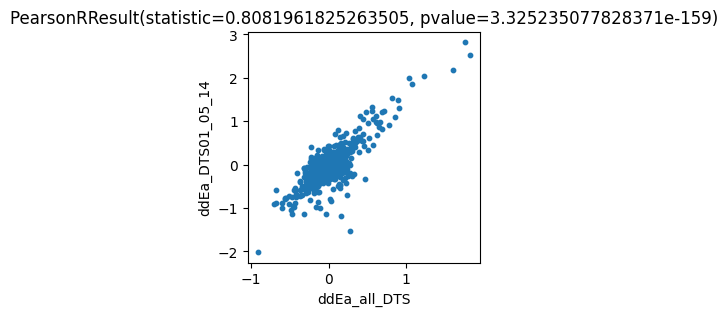

In [9]:
labels = common_mutations

fig, ax = plt.subplots(figsize=(3,3))
ax.scatter(ddEa_all_DTS, ddEa_DTS01_05_14, s=10)

#plt.axline((0, 0), (1, 1), linewidth=1, color='r')

plt.xlabel('ddEa_all_DTS')
plt.ylabel('ddEa_DTS01_05_14')
plt.title(scipy.stats.pearsonr(ddEa_all_DTS, ddEa_DTS01_05_14))


#for i, txt in enumerate(mutations):
#    ax.annotate(txt, (x[i], y[i]), fontsize=10)

In [10]:
scipy.stats.pearsonr(ddEa_all_DTS, ddEa_DTS01_05_14)

PearsonRResult(statistic=0.8081961825263505, pvalue=3.325235077828371e-159)

In [11]:
weights_Nucleation['Sigmoid']

id     id_ref    Pos Pos_ref    fold_1    fold_2    fold_3  \
0           WT         WT    NaN     NaN  1.306281  1.439523  1.410693   
1         F19I       F19I     19      19  1.007435  0.594563  0.398990   
2         F19L       F19L     19      19 -0.623985 -0.740328 -0.657873   
3         F19M       F19M     19      19 -0.104650 -0.143926 -0.130610   
4         F19V       F19V     19      19  0.187914  0.114122  0.060658   
..         ...        ...    ...     ...       ...       ...       ...   
680  F20V_L34F  F20V_L34F  20_34   20_34  0.297921  0.329733  0.396647   
681  L34M_V36I  L34M_V36I  34_36   34_36 -0.093798 -0.093373 -0.094947   
682  I31M_V40M  I31M_V40M  31_40   31_40  0.347809  0.154206  0.092261   
683  I32M_L34F  I32M_L34F  32_34   32_34 -0.894396 -0.766055 -0.524387   
684  F19V_I32M  F19V_I32M  19_32   19_32  0.052495  0.054894  0.164231   

       fold_4    fold_5    fold_6  ...   fold_10   n      mean       std  \
0    1.561449  1.427812  1.478490  ...  1.513099  10  1.438996  0.090080   
1    0.396902  0.629303  0.675431  ...  0.829201  10  0.664066  0.182831   
2   -0.882277 -0.379979 -0.713468  ... -0.604967  10 -0.671461  0.145417   
3   -0.429579  0.086549 -0.214357  ... -0.066418  10 -0.130759  0.154328   
4    0.019037  0.434222  0.062349  ...  0.057858  10  0.104967  0.144712   
..        ...       ...       ...  ...       ...  ..       ...       ...   
680  0.148138  0.351929  0.206056  ...  0.296361  10  0.333239  0.116632   
681 -0.130022 -0.255219 -0.146849  ...  0.064786  10 -0.148600  0.124256   
682  0.251844  0.468843  0.331124  ...  0.343766  10  0.274393  0.121982   
683 -0.299532 -0.329063 -0.572234  ... -0.471397  10 -0.469320  0.230045   
684  0.020078 -0.235106 -0.232521  ...  0.441428  10  0.004851  0.269024   

         ci95  trait_name  mean_kcal/mol  std_kcal/mol ci95_kcal/mol      ddEa  
0    0.353115  Nucleation       0.866363      0.054234      0.212597 -0.866363  
1    0.716696  Nucleation       0.399808      0.110075      0.431495 -0.399808  
2    0.570036  Nucleation      -0.404260      0.087550      0.343197  0.404260  
3    0.604965  Nucleation      -0.078725      0.092915      0.364226  0.078725  
4    0.567271  Nucleation       0.063196      0.087125      0.341532 -0.063196  
..        ...         ...            ...           ...           ...       ...  
680  0.457198  Nucleation       0.200630      0.070220      0.275261 -0.200630  
681  0.487082  Nucleation      -0.089466      0.074809      0.293253  0.089466  
682  0.478168  Nucleation       0.165201      0.073440      0.287886 -0.165201  
683  0.901778  Nucleation      -0.282559      0.138501      0.542925  0.282559  
684  1.054574  Nucleation       0.002921      0.161969      0.634918 -0.002921  

[685 rows x 23 columns]

In [12]:
# first let's look at the first order terms just out of curiosity

In [13]:
l2_regularisation_factor_values = ['1e-05']

In [14]:
# table of all possible 20 aa in all possible Ab (42) positions

AB_WT = "DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA"
all_aa = ["G","A","V","L","M","I","F","Y","W","K","R","D","E","S","T","C","N","Q","H", "P", "*"]

ddE_df_mean_kcalmol = {}

for l2_regularisation_factor_value in l2_regularisation_factor_values:
    for transformation in transformations:
        #print(transformation)
        ddE_df_mean_kcalmol[transformation] = pd.DataFrame(columns=[elem + '-' + str(idx+1) for idx,elem in enumerate(list(AB_WT))], 
                                                           index = list(all_aa))

In [15]:
ddE_df_mean_kcalmol['Sigmoid'].head()

D-1  A-2  E-3  F-4  R-5  H-6  D-7  S-8  G-9 Y-10  ... G-33 L-34 M-35 V-36  \
G  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
A  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
V  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
L  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
M  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   

  G-37 G-38 V-39 V-40 I-41 A-42  
G  NaN  NaN  NaN  NaN  NaN  NaN  
A  NaN  NaN  NaN  NaN  NaN  NaN  
V  NaN  NaN  NaN  NaN  NaN  NaN  
L  NaN  NaN  NaN  NaN  NaN  NaN  
M  NaN  NaN  NaN  NaN  NaN  NaN  

[5 rows x 42 columns]

In [16]:
# populate the ddE_df table according to weights_Nucleation

for l2_regularisation_factor_value in l2_regularisation_factor_values:
    
    for transformation in transformations:

        for idx in list(weights_Nucleation[transformation].index):

            curr_mutation_id = weights_Nucleation[transformation].loc[idx,'id']

            # continue if only 1 mutation
            if '_' not in curr_mutation_id:
                
                # continue if not WT
                if curr_mutation_id != 'WT':
                    # position (1-42) of mutation in Ab sequence
                    curr_mutation_pos = curr_mutation_id[1:-1]
                    # aa introduced by the mutation
                    curr_new_aa = curr_mutation_id[-1]

                    # inferred value of ddEa to be added
                    curr_ddEa_value = weights_Nucleation[transformation].loc[idx,'ddEa']

                    # minus because we have -ddEa predicted
                    ddE_df_mean_kcalmol[transformation].loc[curr_new_aa, list(ddE_df_mean_kcalmol[transformation].columns)[int(curr_mutation_pos) - 1]] = curr_ddEa_value


In [17]:
# make sure values are float
for l2_regularisation_factor_value in l2_regularisation_factor_values:
    for transformation in transformations:
        for col in list(ddE_df_mean_kcalmol[transformation].columns):
            ddE_df_mean_kcalmol[transformation][col] = ddE_df_mean_kcalmol[transformation][col].astype(float)


In [18]:
cmaps_ddE = {}
masks_ddE = {}

for l2_regularisation_factor_value in l2_regularisation_factor_values:
    for transformation in transformations:
        #print(transformation)
        masks_ddE[transformation] = ddE_df_mean_kcalmol[transformation].isnull()

        cmaps_ddE[transformation] = matplotlib.colormaps.get('RdBu_r')
        cmaps_ddE[transformation].set_bad("lightgrey")

Text(0.5, 1.0, 'Sigmoid fit, l2=1e-05')

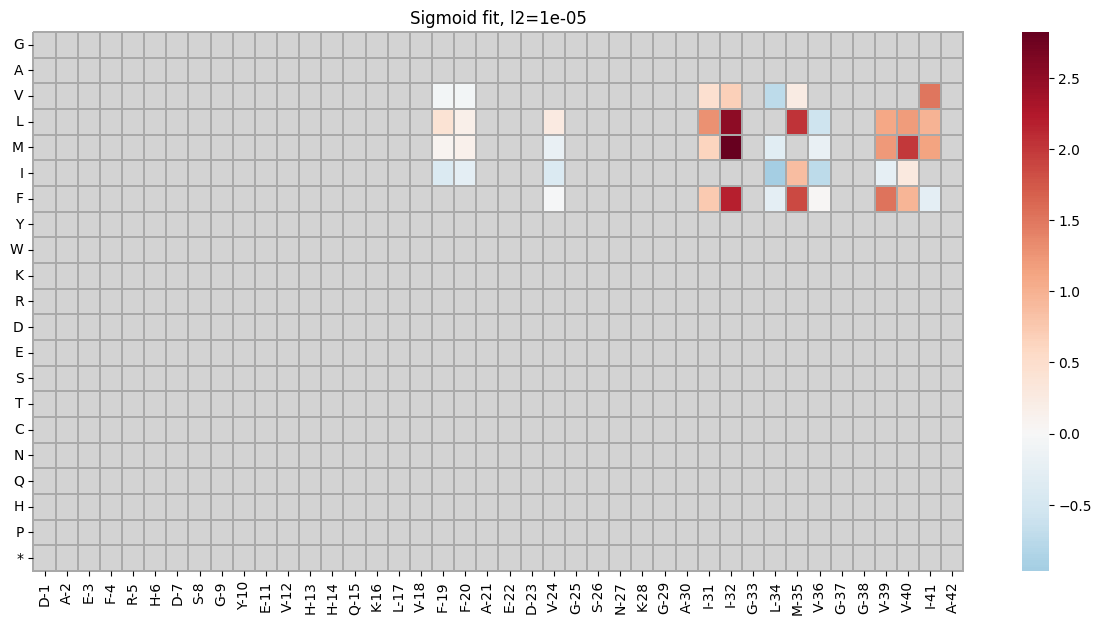

In [19]:
transformation = 'Sigmoid'
fig = plt.figure(figsize=(15, 7))
sns.heatmap(ddE_df_mean_kcalmol[transformation], cmap=cmaps_ddE[transformation], 
            #vmin = ddE_df_mean_kcalmol.fillna(0, inplace=False).to_numpy().min(),
            #vmax = 5,
            mask=masks_ddE[transformation],
            linewidths=0.002814, linecolor='darkgrey', clip_on=False,
            center=0)
plt.yticks(rotation=0) 
#plt.xticks(rotation=0) 
plt.title(transformation + ' fit, l2=1e-05')

#plt.savefig('./figures/20240206_mochi_ddEa_heatmap_all_3_doubles_1st_ord_terms_allowed_Sigmoid.pdf',
#           bbox_inches = 'tight')

In [20]:
results_dir_doubles = '/lustre/scratch126/gengen/projects/amyloid_beta_epistasis/Doubles_analysis/all_vars_analysis/mochi_results/'

In [21]:
# here will look runs for all 3 doubles datasets
# Sigmoid, ELU and Linear fits

weights_Nucleation_doubles = {}

for transformation in transformations: 
    print(transformation)
        
    curr_path = results_dir_doubles + '20240219_max_terms_order_1_' + transformation + '_l2_regularization_factor_' + l2_regularisation_factor_value + '_all_3_doubles_datasets_all_variants'       


    weights_Nucleation_doubles[transformation] = pd.read_csv(curr_path + '/weights/weights_Nucleation.txt',
                                sep='\t')

    # add ddEa, bc weights_Nucleation['mean_kcal/mol'] is -ddEa
    weights_Nucleation_doubles[transformation]['ddEa'] = - weights_Nucleation_doubles[transformation]['mean_kcal/mol']


    # final scaling and shifting using Thacker and Yang data
    weights_Nucleation_doubles[transformation]['ddEa_scaled_and_shifted'] = (weights_Nucleation_doubles[transformation]['ddEa'])/0.233
    

Sigmoid


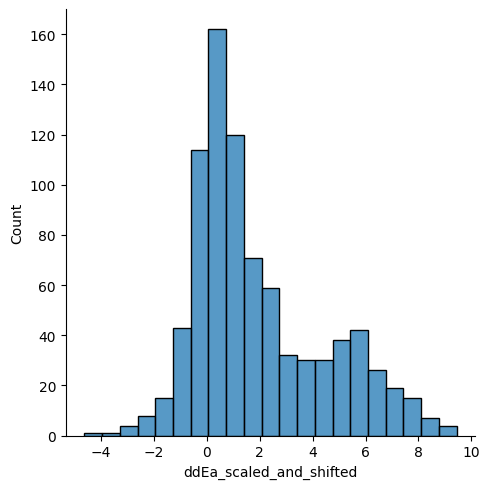

In [22]:
sns.displot(weights_Nucleation_doubles['Sigmoid']['ddEa_scaled_and_shifted'])

In [23]:
# table of all possible 20 aa in all possible Ab (42) positions

ddE_df_mean_kcalmol_doubles = {}

for l2_regularisation_factor_value in l2_regularisation_factor_values:
    for transformation in transformations:
        #print(transformation)
        ddE_df_mean_kcalmol_doubles[transformation] = pd.DataFrame(columns=[elem + '-' + str(idx+1) for idx,elem in enumerate(list(AB_WT))], 
                                                           index = list(all_aa))

In [24]:
# populate the ddE_df table according to weights_Nucleation

for l2_regularisation_factor_value in l2_regularisation_factor_values:
    
    for transformation in transformations:

        for idx in list(weights_Nucleation_doubles[transformation].index):

            curr_mutation_id = weights_Nucleation_doubles[transformation].loc[idx,'id']

            # continue if not WT
            if curr_mutation_id != 'WT':
                # position (1-42) of mutation in Ab sequence
                curr_mutation_pos = curr_mutation_id[1:-1]
                # aa introduced by the mutation
                curr_new_aa = curr_mutation_id[-1]

                # inferred value of ddEa to be added
                curr_ddEa_value = weights_Nucleation_doubles[transformation].loc[idx,'ddEa_scaled_and_shifted']

                # minus because we have -ddEa predicted
                ddE_df_mean_kcalmol_doubles[transformation].loc[curr_new_aa, list(ddE_df_mean_kcalmol_doubles[transformation].columns)[int(curr_mutation_pos) - 1]] = curr_ddEa_value


In [25]:
# make sure values are float
for l2_regularisation_factor_value in l2_regularisation_factor_values:
    for transformation in transformations:
        for col in list(ddE_df_mean_kcalmol_doubles[transformation].columns):
            ddE_df_mean_kcalmol_doubles[transformation][col] = ddE_df_mean_kcalmol_doubles[transformation][col].astype(float)


In [26]:
ddE_df_mean_kcalmol_doubles['Sigmoid']

D-1       A-2       E-3       F-4       R-5       H-6       D-7  \
G -0.513740  0.257202 -0.524391  0.666902  1.172574  0.538170 -0.379760   
A -0.147763       NaN -0.309471  0.506991  1.287016  0.702866 -0.002935   
V  1.982111  1.855294  1.460877  0.918588  1.157460  1.221586  0.994238   
L  2.752797  2.418817  2.271359  1.141775  1.614956  1.857726  1.097659   
M  0.842132  1.169468  0.299724  0.630338  1.108589  0.808810  0.214325   
I  2.590310  2.172209  1.549483  0.781311  1.236310  1.819976  1.013811   
F  0.480155  0.128483 -0.251483       NaN  1.393774  0.853974  0.292976   
Y  0.413142  0.286494 -0.306889  0.345169  1.466453  0.835888  0.280575   
W  0.922289  0.200349 -0.720210  0.783091  1.428499  0.593596  0.121613   
K  0.189033  0.366360 -0.134040  0.965446  0.359003  0.588470 -0.033936   
R -0.440705 -0.172915 -0.773003  0.417307       NaN  0.064144 -0.483730   
D       NaN  1.074152  0.297533  1.350546  1.997769  1.449760       NaN   
E  0.144910  1.291775       NaN  1.265898  1.770406  1.672393  0.428036   
S  0.008776  0.460140 -0.263970  0.676532  1.293459  0.751449 -0.063327   
T -0.063242  0.395846 -0.065886  0.778848  1.273441  0.722395 -0.056672   
C -0.143465  0.615007 -0.045177  1.090435  1.327591  0.983511  0.722821   
N -0.331246  0.529451 -0.194549  0.493632  0.988414  0.698784 -0.212127   
Q -0.071518  0.192011 -0.166979  0.721896  1.092912  0.436310 -0.398622   
H  0.190893  0.242469 -0.432074  0.534382  1.068784       NaN -0.579730   
P -0.333803  0.333527  0.029901  0.302209  1.139158  0.632606 -0.583180   
*  6.000520  5.029386  5.024343  5.778716  4.334849  6.458582  6.000570   

        S-8       G-9      Y-10  ...      G-33      L-34      M-35      V-36  \
G  0.049165       NaN -0.152985  ...       NaN  5.986507  5.676245  4.148929   
A  0.284632  0.207127 -0.004661  ...  4.130022  3.021727  5.139845  2.753544   
V  0.771720  0.443632  0.402577  ...  4.915985 -0.736443  2.057580       NaN   
L  0.690486  1.289209  1.344692  ...  4.021306       NaN  4.457238 -0.312345   
M  0.265724  0.507249  0.897652  ...  1.389000  0.231609       NaN  0.241387   
I  1.108447  0.498474  0.629187  ...  5.880424 -1.333675  3.044939 -0.821111   
F  0.276359 -0.183608  0.121737  ...  3.660147  1.174189  6.458651  0.252573   
Y  0.187702 -0.715327       NaN  ...  3.385179  2.567611  4.677266  0.760311   
W  0.091317  0.421011  0.730887  ...  6.268929  4.903888  5.398989  5.417723   
K  0.370751 -0.074992  0.295757  ...  2.146400  2.764652  6.952580  3.058778   
R -0.347089 -0.423780 -0.178879  ...  4.583993  3.649564  6.500716  3.924295   
D  0.779571  1.065562  0.421272  ...  5.357149  5.835927  7.934138  5.345524   
E  1.017098  1.528834  0.395723  ...  4.839874  5.432493  7.613073  4.433771   
S       NaN  0.540757  0.115146  ...  3.343899  2.345430  4.512125  2.342459   
T  0.384965  0.274531  0.169885  ...  1.820635  0.227592  6.103585  0.754629   
C  2.274027  0.568300  0.371979  ...  3.285757 -0.080199  3.420193 -0.374659   
N  0.167226  0.270543  0.155231  ... -2.571484  0.870658  0.520202  1.319455   
Q  0.107383  0.185034 -0.065110  ...  0.264474  1.044905  2.485212  2.391906   
H  0.000609 -0.066131  0.050077  ... -0.274968  4.122547  3.176222  3.177448   
P -0.027180 -0.253683 -0.373626  ...  5.816920  5.582088  7.161721  6.486133   
*  4.184489  5.496639  5.894465  ...  6.351085  7.457709  7.634366  7.918528   

       G-37      G-38      V-39      V-40      I-41      A-42  
G       NaN       NaN  7.653882  5.714533  6.609346  2.607290  
A  4.544543  4.662272  4.888832  5.341470  6.636207       NaN  
V  5.517632  4.814599       NaN       NaN  3.502116 -0.692907  
L  9.256260  7.166352  2.478533  3.498711  2.456996 -2.662287  
M  8.272791  5.801625  2.405861  3.846833  2.855504 -2.056350  
I  7.874150  5.849606 -0.153560  1.797520       NaN -0.699159  
F  8.604114  6.365029  3.472572  2.487587 -0.379039 -0.178046  
Y  7.686005  7.095736  3.656119  1.228842  0.600879  2.465099  
W  8.997745  8.40395

Text(0.5, 1.0, 'Sigmoid fit, l2=1e-05')

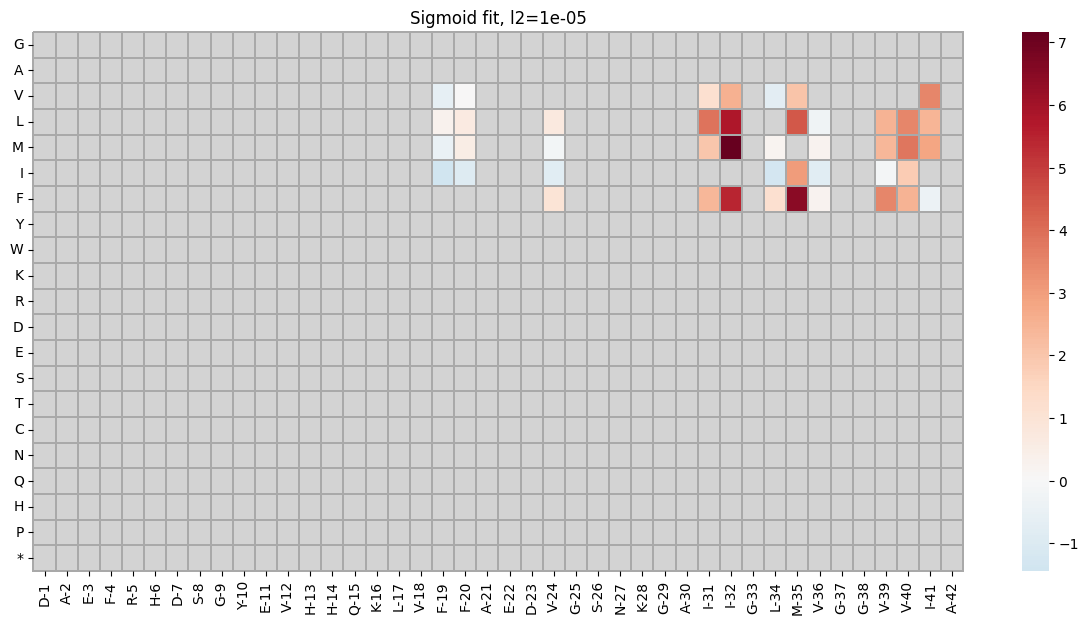

In [27]:
transformation = 'Sigmoid'
fig = plt.figure(figsize=(15, 7))
sns.heatmap(ddE_df_mean_kcalmol_doubles[transformation], 
            cmap=cmaps_ddE[transformation], 
            #vmin = ddE_df_mean_kcalmol_doubles[transformation].fillna(0, inplace=False).to_numpy().min(),
            #vmax = ddE_df_mean_kcalmol_doubles[transformation].fillna(0, inplace=False).to_numpy().max(),
            mask=masks_ddE[transformation],
            linewidths=0.002814, linecolor='darkgrey', clip_on=False,
            center=0)
plt.yticks(rotation=0) 
#plt.xticks(rotation=0) 
plt.title(transformation + ' fit, l2=1e-05')

#plt.savefig('./figures/20240206_mochi_ddEa_heatmap_all_3_doubles_1st_ord_terms_allowed_Sigmoid.pdf',
#           bbox_inches = 'tight')

In [28]:
# overlap in variants b/w DTS and doubles
common_vars_sigmoid = list(set(weights_Nucleation_doubles['Sigmoid']['id']) & set(weights_Nucleation['Sigmoid']['id']))
len(common_vars_sigmoid)

45

In [29]:
# doubles
x = list(weights_Nucleation_doubles['Sigmoid'].set_index('id', inplace=False).loc[common_vars_sigmoid,'ddEa_scaled_and_shifted'])


# DTS01 and DTS05
y = list(weights_Nucleation['Sigmoid'].set_index('id', inplace=False).loc[common_vars_sigmoid,'ddEa'])



In [30]:
scipy.stats.pearsonr(x,y)

PearsonRResult(statistic=0.9567705543610966, pvalue=1.0923367659873001e-24)

Text(0.5, 1.0, 'corr=0.9567705543610961')

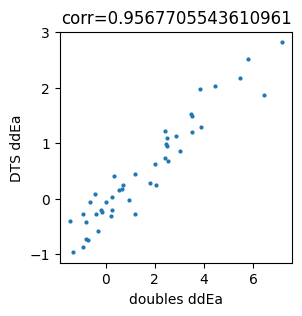

In [31]:
labels = common_vars_sigmoid

fig, ax = plt.subplots(figsize=(3,3))
ax.scatter(x, y, s=4)

#plt.axline((0, 0), (1, 1), linewidth=1, color='r')

plt.xlabel('doubles ddEa')
plt.ylabel('DTS ddEa')
plt.title('corr=' + str(np.corrcoef(x, y)[0][1]))


#for i, txt in enumerate(mutations):
#    ax.annotate(txt, (x[i], y[i]), fontsize=10)

# Because WT was added into DTS datasets artificially before running mochi, I need to rescale DTS values

### using the slope of correlation b/w doubles and DTS first order ddEa terms

In [32]:
# using Sigmoid results

In [33]:
len(common_vars_sigmoid)

45

In [34]:
# our x
ddEa_doubles = list(weights_Nucleation_doubles['Sigmoid'].set_index('id', inplace=False).loc[common_vars_sigmoid,'ddEa_scaled_and_shifted'])

# our y
ddEa_DTS = list(weights_Nucleation['Sigmoid'].set_index('id', inplace=False).loc[common_vars_sigmoid,'ddEa'])


In [35]:
# fit linear model, calculate slope and intercept values
linear_fit = LinearRegression().fit([[elem] for elem in ddEa_doubles], ddEa_DTS) # (X,y)
intercept_value = linear_fit.intercept_
slope_value = linear_fit.coef_


# coordinates of WT in DTS (variant I41F)

#x_I41F = common_variants[common_variants.aa_seq=='GAIIGLMVGGVVFA']['nscore_c_nnk']
#y_I41F = common_variants[common_variants.aa_seq=='GAIIGLMVGGVVFA']['fitness']


In [36]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', c='red')

In [37]:
slope_value

array([0.41604357])

In [38]:
intercept_value

-0.15589508632224602

Text(0, 0.5, 'ddEa, DTS')

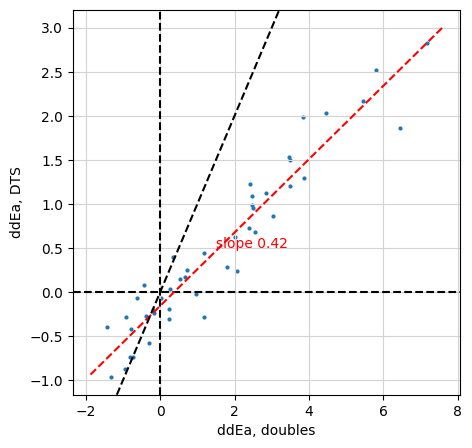

In [39]:
# INITIAL DATA

f, ax = plt.subplots(figsize=(5,5))

ax.scatter(x, y, s=4)

plt.grid(color='lightgrey')
#plt.xlim(-2,2)
#plt.ylim(-2,2)


plt.axhline(linestyle='--', color='black')
plt.axvline(linestyle='--', color='black')
abline(slope_value, intercept_value) # in red
plt.axline((0,0), slope=1, linestyle='--', color='black')

plt.text(x = 1.5, y = 0.5, s = 'slope ' + str(np.round(slope_value[0],2)), c='red')



plt.xlabel('ddEa, doubles')
plt.ylabel('ddEa, DTS')


In [40]:
np.mean(x)

1.5848529793419166

In [41]:
np.mean(y)

0.5034728040888888

In [42]:
intercept_value

-0.15589508632224602

In [43]:
# adding values for recentered data

weights_Nucleation['Sigmoid']['ddEa_recentered'] = (weights_Nucleation['Sigmoid']['ddEa'])/slope_value


In [44]:
np.mean(weights_Nucleation['Sigmoid']['ddEa_recentered'])

-0.036484773053624735

In [45]:
np.min(weights_Nucleation['Sigmoid'][45:]['ddEa_recentered'])

-4.844400559242291

In [46]:
np.max(weights_Nucleation['Sigmoid'][45:]['ddEa_recentered'])

3.182591434082915

Text(0, 0.5, 'ddEa, DTS (recentered)')

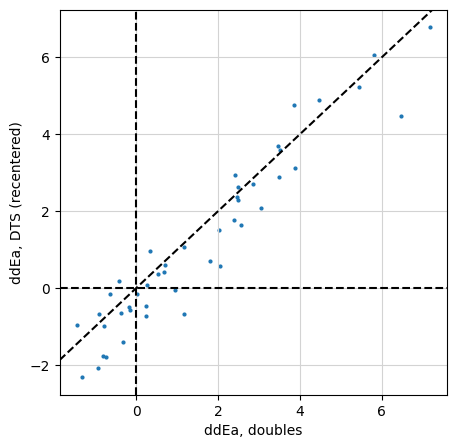

In [47]:
# RECENTERED DATA (lifting it up by the intercept value calculated above)

f, ax = plt.subplots(figsize=(5,5))

ax.scatter(x, (y)/slope_value, s=4)

plt.grid(color='lightgrey')
#plt.xlim(-2,2)
#plt.ylim(-2,2)


plt.axhline(linestyle='--', color='black')
plt.axvline(linestyle='--', color='black')
#abline(slope_value, intercept_value)
plt.axline((0,0), slope=1, linestyle='--', color='black')

#plt.text(x = 1.5, y = 0.5, s = 'slope ' + str(np.round(slope[0],2)), c='red')



plt.xlabel('ddEa, doubles')
plt.ylabel('ddEa, DTS (recentered)')


In [48]:
weights_Nucleation['Sigmoid']

id     id_ref    Pos Pos_ref    fold_1    fold_2    fold_3  \
0           WT         WT    NaN     NaN  1.306281  1.439523  1.410693   
1         F19I       F19I     19      19  1.007435  0.594563  0.398990   
2         F19L       F19L     19      19 -0.623985 -0.740328 -0.657873   
3         F19M       F19M     19      19 -0.104650 -0.143926 -0.130610   
4         F19V       F19V     19      19  0.187914  0.114122  0.060658   
..         ...        ...    ...     ...       ...       ...       ...   
680  F20V_L34F  F20V_L34F  20_34   20_34  0.297921  0.329733  0.396647   
681  L34M_V36I  L34M_V36I  34_36   34_36 -0.093798 -0.093373 -0.094947   
682  I31M_V40M  I31M_V40M  31_40   31_40  0.347809  0.154206  0.092261   
683  I32M_L34F  I32M_L34F  32_34   32_34 -0.894396 -0.766055 -0.524387   
684  F19V_I32M  F19V_I32M  19_32   19_32  0.052495  0.054894  0.164231   

       fold_4    fold_5    fold_6  ...   n      mean       std      ci95  \
0    1.561449  1.427812  1.478490  ...  10  1.438996  0.090080  0.353115   
1    0.396902  0.629303  0.675431  ...  10  0.664066  0.182831  0.716696   
2   -0.882277 -0.379979 -0.713468  ...  10 -0.671461  0.145417  0.570036   
3   -0.429579  0.086549 -0.214357  ...  10 -0.130759  0.154328  0.604965   
4    0.019037  0.434222  0.062349  ...  10  0.104967  0.144712  0.567271   
..        ...       ...       ...  ...  ..       ...       ...       ...   
680  0.148138  0.351929  0.206056  ...  10  0.333239  0.116632  0.457198   
681 -0.130022 -0.255219 -0.146849  ...  10 -0.148600  0.124256  0.487082   
682  0.251844  0.468843  0.331124  ...  10  0.274393  0.121982  0.478168   
683 -0.299532 -0.329063 -0.572234  ...  10 -0.469320  0.230045  0.901778   
684  0.020078 -0.235106 -0.232521  ...  10  0.004851  0.269024  1.054574   

     trait_name  mean_kcal/mol  std_kcal/mol  ci95_kcal/mol      ddEa  \
0    Nucleation       0.866363      0.054234       0.212597 -0.866363   
1    Nucleation       0.399808      0.110075       0.431495 -0.399808   
2    Nucleation      -0.404260      0.087550       0.343197  0.404260   
3    Nucleation      -0.078725      0.092915       0.364226  0.078725   
4    Nucleation       0.063196      0.087125       0.341532 -0.063196   
..          ...            ...           ...            ...       ...   
680  Nucleation       0.200630      0.070220       0.275261 -0.200630   
681  Nucleation      -0.089466      0.074809       0.293253  0.089466   
682  Nucleation       0.165201      0.073440       0.287886 -0.165201   
683  Nucleation      -0.282559      0.138501       0.542925  0.282559   
684  Nucleation       0.002921      0.161969       0.634918 -0.002921   

     ddEa_recentered  
0          -2.082385  
1          -0.960976  
2           0.971678  
3           0.189222  
4          -0.151899  
..               ...  
680        -0.482234  
681         0.215041  
682        -0.397077  
683         0.679157  
684        -0.007020  

[685 rows x 24 columns]

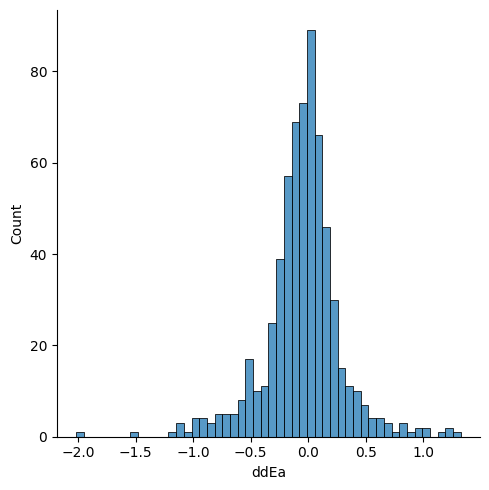

In [49]:
sns.displot(weights_Nucleation['Sigmoid'][45:]['ddEa'])

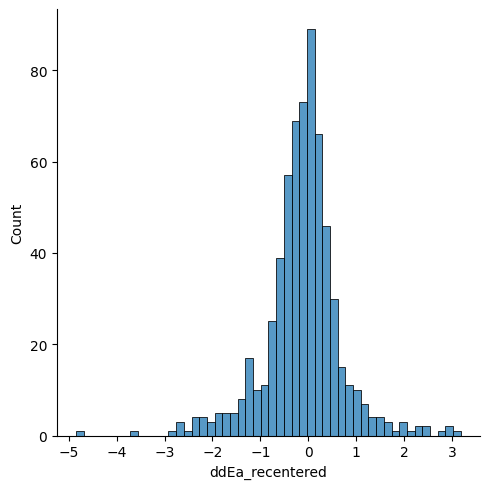

In [50]:
sns.displot(weights_Nucleation['Sigmoid'][45:]['ddEa_recentered'])

In [51]:
np.median(weights_Nucleation['Sigmoid'][45:]['ddEa'])

-0.030830494

In [52]:
np.median(weights_Nucleation['Sigmoid'][45:]['ddEa_recentered'])

-0.07410400321437605

In [53]:
weights_Nucleation['Sigmoid']['std_scaled'] = weights_Nucleation['Sigmoid']['std_kcal/mol']/(slope_value)

In [54]:
weights_Nucleation['Sigmoid'][45:]

id     id_ref    Pos Pos_ref    fold_1    fold_2    fold_3  \
45   V36L_V40M  V36L_V40M  36_40   36_40 -0.007173  0.308364 -0.107993   
46   I31V_I41V  I31V_I41V  31_41   31_41 -0.285702 -0.127356 -0.068321   
47   F19I_F20V  F19I_F20V  19_20   19_20 -0.204647  0.066053  0.290241   
48   M35I_V40L  M35I_V40L  35_40   35_40 -1.838146 -1.267114 -1.587382   
49   I31F_V40L  I31F_V40L  31_40   31_40 -0.936283 -1.122599 -1.695565   
..         ...        ...    ...     ...       ...       ...       ...   
680  F20V_L34F  F20V_L34F  20_34   20_34  0.297921  0.329733  0.396647   
681  L34M_V36I  L34M_V36I  34_36   34_36 -0.093798 -0.093373 -0.094947   
682  I31M_V40M  I31M_V40M  31_40   31_40  0.347809  0.154206  0.092261   
683  I32M_L34F  I32M_L34F  32_34   32_34 -0.894396 -0.766055 -0.524387   
684  F19V_I32M  F19V_I32M  19_32   19_32  0.052495  0.054894  0.164231   

       fold_4    fold_5    fold_6  ...      mean       std      ci95  \
45  -0.272195 -0.201784 -0.379566  ... -0.169164  0.213807  0.838125   
46  -0.074500 -0.288390 -0.105110  ... -0.155999  0.099805  0.391237   
47   0.033616  0.044246 -0.093565  ... -0.005613  0.137510  0.539038   
48  -0.874730 -1.422868 -1.258638  ... -1.499219  0.328204  1.286558   
49  -1.047511 -1.479724 -1.050488  ... -1.063711  0.327143  1.282401   
..        ...       ...       ...  ...       ...       ...       ...   
680  0.148138  0.351929  0.206056  ...  0.333239  0.116632  0.457198   
681 -0.130022 -0.255219 -0.146849  ... -0.148600  0.124256  0.487082   
682  0.251844  0.468843  0.331124  ...  0.274393  0.121982  0.478168   
683 -0.299532 -0.329063 -0.572234  ... -0.469320  0.230045  0.901778   
684  0.020078 -0.235106 -0.232521  ...  0.004851  0.269024  1.054574   

     trait_name  mean_kcal/mol  std_kcal/mol  ci95_kcal/mol      ddEa  \
45   Nucleation      -0.101847      0.128725       0.504602  0.101847   
46   Nucleation      -0.093921      0.060089       0.235548  0.093921   
47   Nucleation      -0.003379      0.082789       0.324534  0.003379   
48   Nucleation      -0.902621      0.197599       0.774586  0.902621   
49   Nucleation      -0.640419      0.196960       0.772084  0.640419   
..          ...            ...           ...            ...       ...   
680  Nucleation       0.200630      0.070220       0.275261 -0.200630   
681  Nucleation      -0.089466      0.074809       0.293253  0.089466   
682  Nucleation       0.165201      0.073440       0.287886 -0.165201   
683  Nucleation      -0.282559      0.138501       0.542925  0.282559   
684  Nucleation       0.002921      0.161969       0.634918 -0.002921   

    ddEa_recentered  std_scaled  
45         0.244798    0.309403  
46         0.225747    0.144429  
47         0.008122    0.198992  
48         2.169536    0.474947  
49         1.539307    0.473412  
..              ...         ...  
680       -0.482234    0.168780  
681        0.215041    0.179812  
682       -0.397077    0.176521  
683        0.679157    0.332901  
684       -0.007020    0.389307  

[640 rows x 25 columns]

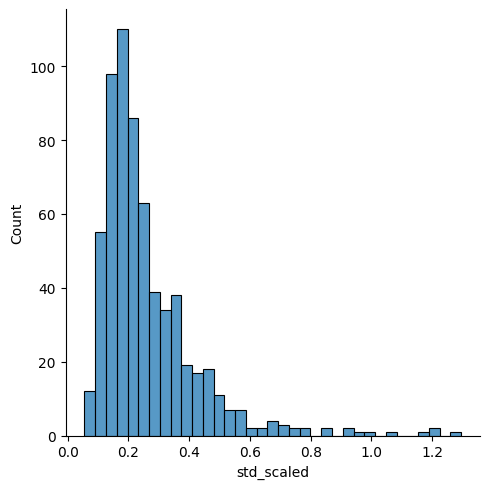

In [55]:
sns.displot(weights_Nucleation['Sigmoid'][45:]['std_scaled'])

In [56]:
np.median(weights_Nucleation['Sigmoid'][45:]['ddEa_recentered'])

-0.07410400321437605

# Adding how many times a pair of mutations is measured

In [57]:
# add 3 columns to weights_Nucleation with the number of times this particular mutation occurs in a given doubles dataset (eLife, NNK, Nicking)

def add_occurence_count(mut_id, # from weights_Nucleation_2nd_order
                        dataset_id # DTS01 / DTS05
                       ):
    
    if mut_id == 'WT':
        return(0)
    
    else:
        
        curr_mut_1 = mut_id.split('_')[0]
        curr_mut_2 = mut_id.split('_')[1]
        
        # this is position - 1 to match python indices starting with 0
        curr_pos_1 = int(curr_mut_1[1:-1]) - 1
        curr_pos_2 = int(curr_mut_2[1:-1]) - 1

        curr_new_aa_1 = curr_mut_1[-1]
        curr_new_aa_2 = curr_mut_2[-1]

        count = 0

        for aa_variant in list(all_variants[dataset_id]['aa_seq']):
            if (aa_variant[curr_pos_1] == curr_new_aa_1) & (aa_variant[curr_pos_2] == curr_new_aa_2):
                count = count + 1
        
        return(count)

    
    


In [58]:
# read in all_variants for DTS01 and DTS05

all_variants = {}

datasets = ['DTS01','DTS05']

filedir = '/lustre/scratch126/gengen/projects/amyloid_beta_epistasis/DTS_joint_analysis/files/'

for dataset in datasets:
    all_variants[dataset] = pd.read_csv(filedir + 'mochi_all_variants_' + dataset + '_20240424.tsv', sep='\t')


In [59]:
all_variants['DTS01']

aa_seq  Nham_aa   WT   fitness  \
0      DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGIIIGGMLLA        6  NaN -6.453303   
1      DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGIIIGGVMMA        5  NaN -6.689845   
2      DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGIIIGGVIMA        5  NaN -6.437139   
3      DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGIIMGGFMFA        6  NaN -6.033716   
4      DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGIIVGGIILA        5  NaN -2.676460   
...                                           ...      ...  ...       ...   
37666  DAEFRHDSGYEVHHQKLVFFAEDVGSNKGALLGLLLGGVMFA        6  NaN -5.796884   
37667  DAEFRHDSGYEVHHQKLVFFAEDVGSNKGALLGLLLGGVLVA        6  NaN -6.329283   
37668  DAEFRHDSGYEVHHQKLVFFAEDVGSNKGALLGLLLGGVFIA        5  NaN -5.610908   
37669  DAEFRHDSGYEVHHQKLVFFAEDVGSNKGALLGLLLGGFIFA        7  NaN -5.629564   
37670  DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA        0  1.0  0.000000   

            sigma  
0        1.343676  
1        0.603279  
2        1.977776  
3        0.851058  
4        1.389283  
...           ...  
37666    0.775319  
37667    0.986981  
37668    0.856870  
37669    0.767410  
37670  100.000000  

[37671 rows x 5 columns]

In [60]:
all_variants['DTS05']

aa_seq  Nham_aa   WT   fitness  \
0     DAEFRHDSGYEVHHQKLVIIAEDIGSNKGAIIGMMVGGVVIA        4  NaN  7.011132   
1     DAEFRHDSGYEVHHQKLVIIAEDIGSNKGAIMGFMVGGVVIA        5  NaN  2.404653   
2     DAEFRHDSGYEVHHQKLVIIAEDIGSNKGAIFGMMVGGVVIA        5  NaN  3.767693   
3     DAEFRHDSGYEVHHQKLVIIAEDIGSNKGAIFGLMVGGVVIA        4  NaN  2.315233   
4     DAEFRHDSGYEVHHQKLVIIAEDIGSNKGAMIGVMVGGVVIA        5  NaN  6.596234   
...                                          ...      ...  ...       ...   
5278  DAEFRHDSGYEVHHQKLVLLAEDLGSNKGALFGMMVGGVVIA        6  NaN -0.447388   
5279  DAEFRHDSGYEVHHQKLVLLAEDLGSNKGALFGLMVGGVVIA        5  NaN  1.447367   
5280  DAEFRHDSGYEVHHQKLVLLAEDLGSNKGALLGVMVGGVVIA        6  NaN  0.034470   
5281  DAEFRHDSGYEVHHQKLVLLAEDLGSNKGALLGFMVGGVVIA        6  NaN -0.625840   
5282  DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA        0  1.0  0.000000   

           sigma  
0       0.327040  
1       0.535784  
2       0.254974  
3       0.321464  
4       0.239595  
...          ...  
5278    1.620909  
5279    0.953764  
5280    0.736629  
5281    1.737394  
5282  100.000000  

[5283 rows x 5 columns]

In [61]:
weights_Nucleation['Sigmoid']

id     id_ref    Pos Pos_ref    fold_1    fold_2    fold_3  \
0           WT         WT    NaN     NaN  1.306281  1.439523  1.410693   
1         F19I       F19I     19      19  1.007435  0.594563  0.398990   
2         F19L       F19L     19      19 -0.623985 -0.740328 -0.657873   
3         F19M       F19M     19      19 -0.104650 -0.143926 -0.130610   
4         F19V       F19V     19      19  0.187914  0.114122  0.060658   
..         ...        ...    ...     ...       ...       ...       ...   
680  F20V_L34F  F20V_L34F  20_34   20_34  0.297921  0.329733  0.396647   
681  L34M_V36I  L34M_V36I  34_36   34_36 -0.093798 -0.093373 -0.094947   
682  I31M_V40M  I31M_V40M  31_40   31_40  0.347809  0.154206  0.092261   
683  I32M_L34F  I32M_L34F  32_34   32_34 -0.894396 -0.766055 -0.524387   
684  F19V_I32M  F19V_I32M  19_32   19_32  0.052495  0.054894  0.164231   

       fold_4    fold_5    fold_6  ...      mean       std      ci95  \
0    1.561449  1.427812  1.478490  ...  1.438996  0.090080  0.353115   
1    0.396902  0.629303  0.675431  ...  0.664066  0.182831  0.716696   
2   -0.882277 -0.379979 -0.713468  ... -0.671461  0.145417  0.570036   
3   -0.429579  0.086549 -0.214357  ... -0.130759  0.154328  0.604965   
4    0.019037  0.434222  0.062349  ...  0.104967  0.144712  0.567271   
..        ...       ...       ...  ...       ...       ...       ...   
680  0.148138  0.351929  0.206056  ...  0.333239  0.116632  0.457198   
681 -0.130022 -0.255219 -0.146849  ... -0.148600  0.124256  0.487082   
682  0.251844  0.468843  0.331124  ...  0.274393  0.121982  0.478168   
683 -0.299532 -0.329063 -0.572234  ... -0.469320  0.230045  0.901778   
684  0.020078 -0.235106 -0.232521  ...  0.004851  0.269024  1.054574   

     trait_name  mean_kcal/mol  std_kcal/mol  ci95_kcal/mol      ddEa  \
0    Nucleation       0.866363      0.054234       0.212597 -0.866363   
1    Nucleation       0.399808      0.110075       0.431495 -0.399808   
2    Nucleation      -0.404260      0.087550       0.343197  0.404260   
3    Nucleation      -0.078725      0.092915       0.364226  0.078725   
4    Nucleation       0.063196      0.087125       0.341532 -0.063196   
..          ...            ...           ...            ...       ...   
680  Nucleation       0.200630      0.070220       0.275261 -0.200630   
681  Nucleation      -0.089466      0.074809       0.293253  0.089466   
682  Nucleation       0.165201      0.073440       0.287886 -0.165201   
683  Nucleation      -0.282559      0.138501       0.542925  0.282559   
684  Nucleation       0.002921      0.161969       0.634918 -0.002921   

    ddEa_recentered  std_scaled  
0         -2.082385    0.130356  
1         -0.960976    0.264576  
2          0.971678    0.210435  
3          0.189222    0.223329  
4         -0.151899    0.209414  
..              ...         ...  
680       -0.482234    0.168780  
681        0.215041    0.179812  
682       -0.397077    0.176521  
683        0.679157    0.332901  
684       -0.007020    0.389307  

[685 rows x 25 columns]

In [62]:
# copy of weights_Nucleation with ONLY 2nd order terms
ids_2nd_order = [idx for idx in list(weights_Nucleation['Sigmoid']['id']) if '_' in idx]
weights_Nucleation_2nd_order = weights_Nucleation['Sigmoid'].set_index('id', inplace=False).loc[ids_2nd_order,:].reset_index()

In [63]:
weights_Nucleation_2nd_order['variant_occurence_DTS01'] = weights_Nucleation_2nd_order['id'].apply(lambda x: add_occurence_count(x, 'DTS01'))


In [64]:
weights_Nucleation_2nd_order['variant_occurence_DTS05'] = weights_Nucleation_2nd_order['id'].apply(lambda x: add_occurence_count(x, 'DTS05'))


In [65]:
weights_Nucleation_2nd_order

id     id_ref    Pos Pos_ref    fold_1    fold_2    fold_3  \
0    V36L_V40M  V36L_V40M  36_40   36_40 -0.007173  0.308364 -0.107993   
1    I31V_I41V  I31V_I41V  31_41   31_41 -0.285702 -0.127356 -0.068321   
2    F19I_F20V  F19I_F20V  19_20   19_20 -0.204647  0.066053  0.290241   
3    M35I_V40L  M35I_V40L  35_40   35_40 -1.838146 -1.267114 -1.587382   
4    I31F_V40L  I31F_V40L  31_40   31_40 -0.936283 -1.122599 -1.695565   
..         ...        ...    ...     ...       ...       ...       ...   
635  F20V_L34F  F20V_L34F  20_34   20_34  0.297921  0.329733  0.396647   
636  L34M_V36I  L34M_V36I  34_36   34_36 -0.093798 -0.093373 -0.094947   
637  I31M_V40M  I31M_V40M  31_40   31_40  0.347809  0.154206  0.092261   
638  I32M_L34F  I32M_L34F  32_34   32_34 -0.894396 -0.766055 -0.524387   
639  F19V_I32M  F19V_I32M  19_32   19_32  0.052495  0.054894  0.164231   

       fold_4    fold_5    fold_6  ...      ci95  trait_name  mean_kcal/mol  \
0   -0.272195 -0.201784 -0.379566  ...  0.838125  Nucleation      -0.101847   
1   -0.074500 -0.288390 -0.105110  ...  0.391237  Nucleation      -0.093921   
2    0.033616  0.044246 -0.093565  ...  0.539038  Nucleation      -0.003379   
3   -0.874730 -1.422868 -1.258638  ...  1.286558  Nucleation      -0.902621   
4   -1.047511 -1.479724 -1.050488  ...  1.282401  Nucleation      -0.640419   
..        ...       ...       ...  ...       ...         ...            ...   
635  0.148138  0.351929  0.206056  ...  0.457198  Nucleation       0.200630   
636 -0.130022 -0.255219 -0.146849  ...  0.487082  Nucleation      -0.089466   
637  0.251844  0.468843  0.331124  ...  0.478168  Nucleation       0.165201   
638 -0.299532 -0.329063 -0.572234  ...  0.901778  Nucleation      -0.282559   
639  0.020078 -0.235106 -0.232521  ...  1.054574  Nucleation       0.002921   

     std_kcal/mol  ci95_kcal/mol      ddEa  ddEa_recentered  std_scaled  \
0        0.128725       0.504602  0.101847         0.244798    0.309403   
1        0.060089       0.235548  0.093921         0.225747    0.144429   
2        0.082789       0.324534  0.003379         0.008122    0.198992   
3        0.197599       0.774586  0.902621         2.169536    0.474947   
4        0.196960       0.772084  0.640419         1.539307    0.473412   
..            ...            ...       ...              ...         ...   
635      0.070220       0.275261 -0.200630        -0.482234    0.168780   
636      0.074809       0.293253  0.089466         0.215041    0.179812   
637      0.073440       0.287886 -0.165201        -0.397077    0.176521   
638      0.138501       0.542925  0.282559         0.679157    0.332901   
639      0.161969       0.634918 -0.002921        -0.007020    0.389307   

    variant_occurence_DTS01  variant_occurence_DTS05  
0                      1181                        0  
1                      3959                        0  
2                         0                      179  
3                       943                        0  
4                      1103                        0  
..                      ...                      ...  
635                       0                      242  
636                     924                        0  
637                    1105                        0  
638                    1022                      150  
639                       0                      215  

[640 rows x 27 columns]

In [66]:
np.unique(weights_Nucleation_2nd_order['variant_occurence_DTS01'], return_counts=True)

(array([   0,  730,  753,  762,  776,  782,  785,  791,  793,  800,  806,
         814,  820,  821,  825,  843,  845,  846,  848,  850,  862,  867,
         871,  873,  875,  876,  879,  883,  884,  886,  887,  888,  890,
         893,  895,  896,  898,  899,  900,  903,  904,  905,  907,  911,
         912,  916,  917,  922,  923,  924,  925,  926,  927,  928,  929,
         930,  934,  937,  940,  942,  943,  944,  947,  948,  949,  950,
         956,  957,  958,  959,  960,  961,  962,  964,  965,  966,  967,
         971,  972,  975,  976,  977,  978,  982,  983,  986,  987,  988,
         989,  990,  991,  993,  996,  997,  998, 1002, 1003, 1004, 1013,
        1015, 1018, 1020, 1022, 1023, 1024, 1025, 1026, 1029, 1030, 1031,
        1032, 1033, 1034, 1035, 1038, 1039, 1040, 1043, 1044, 1050, 1052,
        1056, 1057, 1058, 1059, 1063, 1067, 1068, 1069, 1070, 1072, 1074,
        1076, 1077, 1078, 1081, 1082, 1083, 1086, 1087, 1092, 1093, 1095,
        1096, 1101, 1102, 1103, 1104, 

In [67]:
np.mean(weights_Nucleation_2nd_order['variant_occurence_DTS01'])

975.58125

In [68]:
np.median(weights_Nucleation_2nd_order['variant_occurence_DTS01'])

1002.5

In [69]:
np.unique(weights_Nucleation_2nd_order['variant_occurence_DTS05'], return_counts=True)

(array([  0, 100, 101, 102, 104, 105, 109, 110, 112, 113, 114, 116, 119,
        121, 123, 124, 125, 127, 128, 129, 130, 131, 132, 133, 134, 135,
        136, 139, 141, 142, 143, 144, 146, 147, 149, 150, 152, 153, 154,
        155, 156, 157, 158, 159, 162, 163, 164, 165, 166, 167, 168, 170,
        171, 172, 173, 174, 177, 178, 179, 180, 181, 182, 183, 186, 188,
        189, 192, 193, 195, 197, 198, 201, 202, 203, 204, 205, 208, 209,
        211, 213, 214, 215, 216, 218, 219, 220, 221, 222, 224, 225, 226,
        227, 228, 229, 231, 232, 233, 234, 235, 236, 238, 239, 240, 242,
        243, 245, 246, 248, 249, 250, 252, 254, 255, 259, 263, 266, 269,
        270, 271, 273, 274, 277, 280, 286, 287, 289, 292, 294, 298, 299,
        306, 307, 311, 313, 317, 321, 322, 325, 327, 329, 332, 333, 335,
        336, 339, 345, 351, 352, 362, 363, 378, 380, 394, 404, 409, 411,
        426]),
 array([400,   2,   1,   3,   1,   3,   1,   2,   1,   1,   1,   1,   3,
          1,   1,   1,   2,   1,   1

In [70]:
np.mean(weights_Nucleation_2nd_order['variant_occurence_DTS05'])

78.45625

In [71]:
np.median(weights_Nucleation_2nd_order['variant_occurence_DTS05'])

0.0

In [72]:
weights_Nucleation_2nd_order['variant_occurence_total'] = weights_Nucleation_2nd_order['variant_occurence_DTS01'] + weights_Nucleation_2nd_order['variant_occurence_DTS05']


In [73]:
np.median(weights_Nucleation_2nd_order['variant_occurence_total'])

1024.0

In [74]:
np.mean(weights_Nucleation_2nd_order['variant_occurence_total'])

1054.0375

In [75]:
# counting how many times a mutation is measured in different genetic backgrounds 
# (all variants across the 2 doubles datasets without duplicates)

In [76]:
all_variants['DTS01']['aa_seq'].value_counts()

aa_seq
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGIIIGGMLLA    1
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAFIGMLLGGLIVA    1
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAFIGMLVGGVFLA    1
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAFIGMLVGGVLIA    1
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAFIGMLVGGVVFA    1
                                             ..
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAVIGVIIGGVMLA    1
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAVIGVIIGGVVVA    1
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAVIGVIIGGVLLA    1
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAVIGVIMGGIFMA    1
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA    1
Name: count, Length: 37671, dtype: int64

In [77]:
all_variants['DTS05']['aa_seq'].value_counts()

aa_seq
DAEFRHDSGYEVHHQKLVIIAEDIGSNKGAIIGMMVGGVVIA    1
DAEFRHDSGYEVHHQKLVFVAEDMGSNKGAMMGFMVGGVVIA    1
DAEFRHDSGYEVHHQKLVFVAEDMGSNKGAILGLMVGGVVIA    1
DAEFRHDSGYEVHHQKLVFVAEDMGSNKGAIFGMMVGGVVIA    1
DAEFRHDSGYEVHHQKLVFVAEDIGSNKGALFGLMVGGVVIA    1
                                             ..
DAEFRHDSGYEVHHQKLVVMAEDVGSNKGAFVGIMVGGVVIA    1
DAEFRHDSGYEVHHQKLVVMAEDVGSNKGAFVGFMVGGVVIA    1
DAEFRHDSGYEVHHQKLVVMAEDVGSNKGAFMGFMVGGVVIA    1
DAEFRHDSGYEVHHQKLVVMAEDVGSNKGAFIGVMVGGVVIA    1
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA    1
Name: count, Length: 5283, dtype: int64

In [78]:
# without duplicates
all_variants_list = list(all_variants['DTS01']['aa_seq']) + list(all_variants['DTS05']['aa_seq'])
all_variants_list = np.unique(all_variants_list)

In [79]:
len(all_variants_list)

42928

In [80]:
# add 3 columns to weights_Nucleation with the number of times this particular mutation occurs in a given doubles dataset (eLife, NNK, Nicking)

def add_occurence_no_duplicates(mut_id, # from weights_Nucleation['Sigmoid_l2_1e-05']['id'])
                               ):
    
    if mut_id == 'WT':
        return(0)
    
    else:
        # this is position - 1 to match python indices starting with 0
        
        mut_id_1 = mut_id.split('_')[0]
        mut_id_2 = mut_id.split('_')[1]
        
        curr_pos_1 = int(mut_id_1[1:-1]) - 1
        curr_pos_2 = int(mut_id_2[1:-1]) - 1

        curr_new_aa_1 = mut_id_1[-1]
        curr_new_aa_2 = mut_id_2[-1]

        count = 0

        for aa_variant in all_variants_list:
            #print(aa_variant)
            if (aa_variant[curr_pos_1] == curr_new_aa_1) & (aa_variant[curr_pos_2] == curr_new_aa_2):
                count = count + 1
        
        return(count)

    
    


In [81]:
weights_Nucleation_2nd_order['variant_occurence_total_no_duplicates'] = weights_Nucleation_2nd_order['id'].apply(lambda x: add_occurence_no_duplicates(x))


/tmp/ipykernel_1758950/325856299.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(weights_Nucleation_2nd_order['variant_occurence_total'])


<Axes: xlabel='variant_occurence_total', ylabel='Density'>

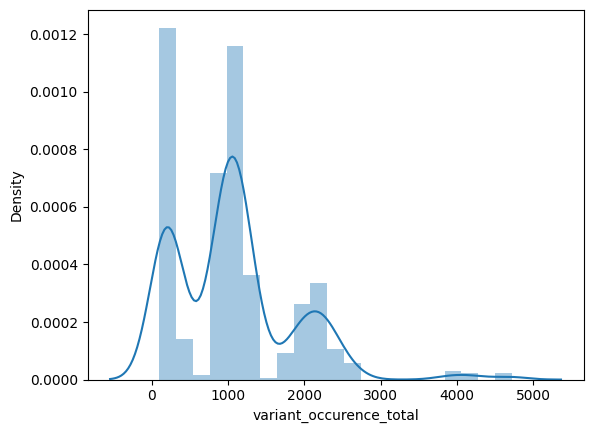

In [82]:
sns.distplot(weights_Nucleation_2nd_order['variant_occurence_total'])

/tmp/ipykernel_1758950/1683194487.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(weights_Nucleation_2nd_order['variant_occurence_total_no_duplicates'])


<Axes: xlabel='variant_occurence_total_no_duplicates', ylabel='Density'>

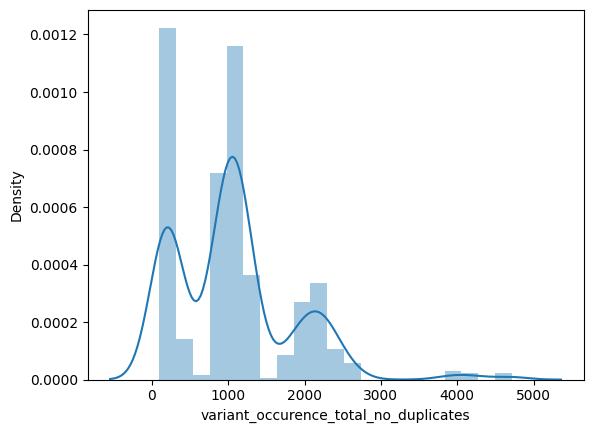

In [83]:
sns.distplot(weights_Nucleation_2nd_order['variant_occurence_total_no_duplicates'])

In [84]:
np.median(weights_Nucleation_2nd_order['variant_occurence_total'])

1024.0

In [85]:
np.median(weights_Nucleation_2nd_order['variant_occurence_total_no_duplicates'])

1024.0

/tmp/ipykernel_1758950/1666821320.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(weights_Nucleation_2nd_order['ddEa_recentered'], bins=70)


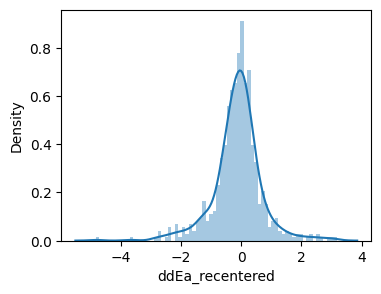

In [86]:
fig = plt.figure(figsize=(4, 3))

sns.distplot(weights_Nucleation_2nd_order['ddEa_recentered'], bins=70)

plt.savefig('./figures/20240718_dddEa_heatmap_all_640_values.pdf',
           bbox_inches = 'tight')

In [87]:
np.median(weights_Nucleation_2nd_order['ddEa_recentered'])

-0.07410400321437605

In [88]:
np.mean(weights_Nucleation_2nd_order['ddEa_recentered'])

-0.12413838821896732

In [89]:
scipy.stats.mode(weights_Nucleation_2nd_order['ddEa_recentered'])

ModeResult(mode=-4.844400559242291, count=1)

In [90]:
vals,counts = np.unique(weights_Nucleation_2nd_order['ddEa_recentered'], return_counts=True)

In [91]:
index = np.argmax(counts)
vals[index]

-4.844400559242291

In [92]:
weights_Nucleation_2nd_order[weights_Nucleation_2nd_order['ddEa_recentered'] == -1.8595866136777544]

Empty DataFrame
Columns: [id, id_ref, Pos, Pos_ref, fold_1, fold_2, fold_3, fold_4, fold_5, fold_6, fold_7, fold_8, fold_9, fold_10, n, mean, std, ci95, trait_name, mean_kcal/mol, std_kcal/mol, ci95_kcal/mol, ddEa, ddEa_recentered, std_scaled, variant_occurence_DTS01, variant_occurence_DTS05, variant_occurence_total, variant_occurence_total_no_duplicates]
Index: []

[0 rows x 29 columns]

In [93]:
counts,vals = np.histogram(weights_Nucleation_2nd_order['ddEa_recentered'], bins=70)

In [94]:
np.histogram(weights_Nucleation_2nd_order['ddEa_recentered'], bins=70)

(array([ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,
         1,  3,  0,  1,  4,  0,  5,  1,  4,  2,  5,  3,  6,  7, 12,  6,  8,
         9, 17, 25, 29, 41, 46, 48, 57, 67, 48, 52, 29, 24, 11, 15, 11,  4,
         6,  7,  3,  2,  3,  2,  1,  2,  2,  0,  1,  2,  0,  2,  1,  0,  1,
         1,  1]),
 array([-4.84440056, -4.72972925, -4.61505793, -4.50038662, -4.3857153 ,
        -4.27104399, -4.15637267, -4.04170136, -3.92703005, -3.81235873,
        -3.69768742, -3.5830161 , -3.46834479, -3.35367347, -3.23900216,
        -3.12433085, -3.00965953, -2.89498822, -2.7803169 , -2.66564559,
        -2.55097428, -2.43630296, -2.32163165, -2.20696033, -2.09228902,
        -1.9776177 , -1.86294639, -1.74827508, -1.63360376, -1.51893245,
        -1.40426113, -1.28958982, -1.17491851, -1.06024719, -0.94557588,
        -0.83090456, -0.71623325, -0.60156193, -0.48689062, -0.37221931,
        -0.25754799, -0.14287668, -0.02820536,  0.08646595,  0.20113727,
         0.31580858, 

In [95]:
index = np.argmax(counts)

In [96]:
vals[index]

-0.02820536324716727

In [97]:
len(weights_Nucleation_2nd_order[abs(weights_Nucleation_2nd_order['ddEa_recentered']) < 1])

536

In [98]:
len(weights_Nucleation_2nd_order)

640

In [99]:
536/640

0.8375

In [100]:
len(weights_Nucleation_2nd_order[abs(weights_Nucleation_2nd_order['ddEa_recentered']) > 5])

0

In [101]:
53/640

0.0828125

In [102]:
len(weights_Nucleation_2nd_order[weights_Nucleation_2nd_order['ddEa_recentered'] > 2])

10

In [103]:
len(weights_Nucleation_2nd_order[weights_Nucleation_2nd_order['ddEa_recentered'] < -2])

16

In [104]:
26/640

0.040625

In [105]:
weights_Nucleation['Sigmoid'].columns

Index(['id', 'id_ref', 'Pos', 'Pos_ref', 'fold_1', 'fold_2', 'fold_3',
       'fold_4', 'fold_5', 'fold_6', 'fold_7', 'fold_8', 'fold_9', 'fold_10',
       'n', 'mean', 'std', 'ci95', 'trait_name', 'mean_kcal/mol',
       'std_kcal/mol', 'ci95_kcal/mol', 'ddEa', 'ddEa_recentered',
       'std_scaled'],
      dtype='object')

In [106]:
weights_Nucleation2save = weights_Nucleation['Sigmoid'].loc[:,['id', 'id_ref', 'Pos', 'Pos_ref', 'fold_1', 'fold_2', 'fold_3',
       'fold_4', 'fold_5', 'fold_6', 'fold_7', 'fold_8', 'fold_9', 'fold_10',
       'n', 'mean', 'std', 'ci95', 'trait_name', 'mean_kcal/mol',
       'std_kcal/mol', 'ci95_kcal/mol','ddEa_recentered', 'std_scaled']]

weights_Nucleation2save.columns = ['id', 'id_ref', 'Pos', 'Pos_ref', 'fold_1', 'fold_2', 'fold_3',
       'fold_4', 'fold_5', 'fold_6', 'fold_7', 'fold_8', 'fold_9', 'fold_10',
       'n', 'mean', 'std', 'ci95', 'trait_name', 'mean_kcal/mol',
       'std_kcal/mol', 'ci95_kcal/mol','ddEa_scaled', 'std_scaled']

In [108]:
# table of all possible 20 aa in all possible Ab (42) positions

AB_WT = "DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA"
all_aa = ["G","A","V","L","M","I","F","Y","W","K","R","D","E","S","T","C","N","Q","H", "P", "*"]

ddE_df_mean_kcalmol = {}

for l2_regularisation_factor_value in l2_regularisation_factor_values:
    for transformation in transformations:
        #print(transformation)
        ddE_df_mean_kcalmol[transformation] = pd.DataFrame(columns=[elem + '-' + str(idx+1) for idx,elem in enumerate(list(AB_WT))], 
                                                           index = list(all_aa))

In [109]:
ddE_df_mean_kcalmol['Sigmoid'].head()

D-1  A-2  E-3  F-4  R-5  H-6  D-7  S-8  G-9 Y-10  ... G-33 L-34 M-35 V-36  \
G  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
A  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
V  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
L  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
M  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   

  G-37 G-38 V-39 V-40 I-41 A-42  
G  NaN  NaN  NaN  NaN  NaN  NaN  
A  NaN  NaN  NaN  NaN  NaN  NaN  
V  NaN  NaN  NaN  NaN  NaN  NaN  
L  NaN  NaN  NaN  NaN  NaN  NaN  
M  NaN  NaN  NaN  NaN  NaN  NaN  

[5 rows x 42 columns]

In [110]:
# populate the ddE_df table according to weights_Nucleation

for l2_regularisation_factor_value in l2_regularisation_factor_values:
    
    for transformation in transformations:

        for idx in list(weights_Nucleation[transformation].index):

            curr_mutation_id = weights_Nucleation[transformation].loc[idx,'id']

            # continue if only 1 mutation
            if '_' not in curr_mutation_id:
                
                # continue if not WT
                if curr_mutation_id != 'WT':
                    # position (1-42) of mutation in Ab sequence
                    curr_mutation_pos = curr_mutation_id[1:-1]
                    # aa introduced by the mutation
                    curr_new_aa = curr_mutation_id[-1]

                    # inferred value of ddEa to be added
                    curr_ddEa_value = weights_Nucleation[transformation].loc[idx,'ddEa_recentered']
                    
                    ddE_df_mean_kcalmol[transformation].loc[curr_new_aa, list(ddE_df_mean_kcalmol[transformation].columns)[int(curr_mutation_pos) - 1]] = curr_ddEa_value


In [111]:
ddE_df_mean_kcalmol['Sigmoid'] = ddE_df_mean_kcalmol['Sigmoid'].dropna(axis=1, how='all')
ddE_df_mean_kcalmol['Sigmoid'] = ddE_df_mean_kcalmol['Sigmoid'].dropna(axis=0, how='all')

In [112]:
# add mean and put it at the top
previous_rows = list(ddE_df_mean_kcalmol['Sigmoid'].index)
ddE_df_mean_kcalmol['Sigmoid'].loc['mean'] = ddE_df_mean_kcalmol['Sigmoid'].mean()
ddE_df_mean_kcalmol['Sigmoid'] = ddE_df_mean_kcalmol['Sigmoid'].loc[['mean'] + previous_rows]

In [113]:
# make sure values are float
for l2_regularisation_factor_value in l2_regularisation_factor_values:
    for transformation in transformations:
        for col in list(ddE_df_mean_kcalmol[transformation].columns):
            ddE_df_mean_kcalmol[transformation][col] = ddE_df_mean_kcalmol[transformation][col].astype(float)


In [114]:
cmaps_ddE = {}
masks_ddE = {}

for l2_regularisation_factor_value in l2_regularisation_factor_values:
    for transformation in transformations:
        #print(transformation)
        masks_ddE[transformation] = ddE_df_mean_kcalmol[transformation].isnull()

        cmaps_ddE[transformation] = matplotlib.colormaps.get('RdBu_r')
        cmaps_ddE[transformation].set_bad("lightgrey")

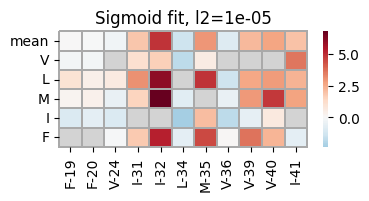

In [115]:
transformation = 'Sigmoid'
fig = plt.figure(figsize=(4, 1.5))
sns.heatmap(ddE_df_mean_kcalmol[transformation], cmap=cmaps_ddE[transformation], 
            #vmin = ddE_df_mean_kcalmol.fillna(0, inplace=False).to_numpy().min(),
            #vmax = 5,
            mask=masks_ddE[transformation],
            linewidths=0.01, linecolor='darkgrey', clip_on=False,
            center=0)
plt.yticks(rotation=0) 
#plt.xticks(rotation=0) 
plt.title(transformation + ' fit, l2=1e-05')

plt.savefig('./figures/20240719_mochi_ddEa_heatmap_DTS01_DTS05_Sigmoid.pdf',
           bbox_inches = 'tight')

In [116]:
ddE_df_mean_kcalmol['Sigmoid']

F-19      F-20      V-24      I-31      I-32      L-34      M-35  \
mean  0.012006 -0.014857 -0.231428  1.861830  4.929577 -1.377028  3.006781   
V    -0.151899 -0.161801       NaN  1.068504  1.641465 -1.781859  0.580361   
L     0.971678  0.414494  0.608168  3.110163  6.068809       NaN  4.888377   
M     0.189222  0.360982 -0.490378  1.508072  6.782951 -0.737133       NaN   
I    -0.960976 -0.673101 -0.997403       NaN       NaN -2.319606  2.078417   
F          NaN       NaN -0.046100  1.760581  5.225084 -0.669514  4.479968   

          V-36      V-39      V-40      I-41  
mean -0.887115  2.169545  2.661323  2.004087  
V          NaN       NaN       NaN  3.596621  
L    -1.391077  2.623521  2.888157  2.368455  
M    -0.471353  2.947818  4.769257  2.696623  
I    -1.762618 -0.581975  0.696878       NaN  
F     0.076586  3.688817  2.290999 -0.645349

In [117]:
mean_for_PDB = list(ddE_df_mean_kcalmol['Sigmoid'].loc['mean'])

In [118]:
mean_for_PDB

[0.012006356708924193,
 -0.014856608671403232,
 -0.23142817145757166,
 1.8618298468621095,
 4.929577095093721,
 -1.3770280439693183,
 3.0067806046659284,
 -0.8871153280455868,
 2.1695452207634838,
 2.6613227954596343,
 2.004087309447815]

In [119]:
# making a frankenstein vector to fill in the gaps
mean_for_PDB_full = [0]*18 + mean_for_PDB[:2] + [0]*3 + [mean_for_PDB[2]] + [0]*6 + mean_for_PDB[3:5] + [0] + mean_for_PDB[5:8] + [0]*2 + mean_for_PDB[8:11] + [0]


In [120]:
len(mean_for_PDB_full)

42

In [121]:
# adding this mean to monomer PDB files

In [122]:
# another option - plotting mean interaction score for each position

In [123]:
AB_WT = "DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA"
all_aa = ["G","A","V","L","M","I","F","Y","W","K","R","D","E","S","T","C","N","Q","H", "P", "*"]

Ab_positions = [elem + '-' + str(idx+1) for idx,elem in enumerate(list(AB_WT))]

In [124]:
dfs_to_plot_interactions = {}

dfs_to_plot_interactions_triangular = {}


for inter_group in ['all']:
    
    curr_lower_triangle  = pd.read_csv('./files/20240722_dfs_to_plot_interactions_' + inter_group + '_DTS01_DTS05.csv',
                                                       index_col=0)
    curr_lower_triangle.index = Ab_positions[::-1]
    curr_lower_triangle.columns = Ab_positions
    
    curr_upper_triangle = pd.DataFrame(np.rot90(curr_lower_triangle,2).T, 
             index = Ab_positions[::-1], columns = Ab_positions
            )
    
    dfs_to_plot_interactions[inter_group] = pd.DataFrame(index = curr_lower_triangle.index, columns=curr_lower_triangle.columns)
    
    dfs_to_plot_interactions_triangular[inter_group] = curr_lower_triangle
    
    for col in curr_lower_triangle.columns:
        
        dfs_to_plot_interactions[inter_group][col] = [i + j for i,j in zip(list(curr_lower_triangle[col].fillna(0)), list(curr_upper_triangle[col].fillna(0)))]
    
    dfs_to_plot_interactions[inter_group].replace(0, np.nan, inplace=True)
        
    

In [125]:
dfs_to_plot_interactions['all'].index

Index(['A-42', 'I-41', 'V-40', 'V-39', 'G-38', 'G-37', 'V-36', 'M-35', 'L-34',
       'G-33', 'I-32', 'I-31', 'A-30', 'G-29', 'K-28', 'N-27', 'S-26', 'G-25',
       'V-24', 'D-23', 'E-22', 'A-21', 'F-20', 'F-19', 'V-18', 'L-17', 'K-16',
       'Q-15', 'H-14', 'H-13', 'V-12', 'E-11', 'Y-10', 'G-9', 'S-8', 'D-7',
       'H-6', 'R-5', 'F-4', 'E-3', 'A-2', 'D-1'],
      dtype='object')

In [126]:
Ab_positions[18]

'F-19'

In [127]:
# only keeping 19-41 part

cols2keep = ['F-19',
             'F-20', 
             'V-24',
             'I-31',
             'I-32',
             'L-34',
             'M-35',
             'V-36',
             'V-39',
             'V-40',
             'I-41'
            ]
             #Ab_positions[18:41]
    
rows2keep = cols2keep[::-1] #Ab_positions[18:41][::-1]


dfs_to_plot_interactions_triangular['all'] = dfs_to_plot_interactions_triangular['all'].loc[rows2keep, cols2keep]


In [128]:
dfs_to_plot_interactions_triangular['all']

F-19      F-20      V-24      I-31      I-32      L-34      M-35  \
I-41   NaN       NaN       NaN       NaN       NaN       NaN       NaN   
V-40   NaN       NaN       NaN       NaN       NaN       NaN       NaN   
V-39   NaN       NaN       NaN       NaN       NaN       NaN       NaN   
V-36   NaN       NaN       NaN       NaN       NaN       NaN       NaN   
M-35   NaN       NaN       NaN       NaN       NaN       NaN       NaN   
L-34   NaN       NaN       NaN       NaN       NaN       NaN  0.828675   
I-32   NaN       NaN       NaN       NaN       NaN  0.574383  1.612242   
I-31   NaN       NaN       NaN       NaN  0.390172  0.214501  1.041625   
V-24   NaN       NaN       NaN  0.304184  0.497399  0.272499       NaN   
F-20   NaN       NaN  0.273044  0.552898  0.431920  0.239559       NaN   
F-19   NaN  0.297262  0.264072  0.253666  0.345961  0.359997       NaN   

          V-36      V-39      V-40      I-41  
I-41       NaN       NaN       NaN       NaN  
V-40       NaN       NaN       NaN  0.698014  
V-39       NaN       NaN  0.613450  0.641610  
V-36       NaN  0.395405  0.475197  0.334196  
M-35  1.566717  0.669134  1.060181  0.343371  
L-34  0.565380  0.340565  0.547161  0.234820  
I-32  0.498715  1.039323  1.556017  0.285359  
I-31  0.321602  0.346859  0.537460  0.240737  
V-24       NaN       NaN       NaN       NaN  
F-20       NaN       NaN       NaN       NaN  
F-19       NaN       NaN       NaN       NaN

In [129]:
dfs_to_plot_interactions_triangular['all'].mean()

F-19         NaN
F-20    0.297262
V-24    0.268558
I-31    0.370249
I-32    0.416363
L-34    0.332188
M-35    1.160847
V-36    0.738103
V-39    0.558258
V-40    0.798244
I-41    0.396872
dtype: float64

In [130]:
dfs_to_plot_interactions_triangular['all'].loc['F-19'].mean()

0.30419154101035983

In [131]:
dfs_to_plot_interactions_triangular['all']

F-19      F-20      V-24      I-31      I-32      L-34      M-35  \
I-41   NaN       NaN       NaN       NaN       NaN       NaN       NaN   
V-40   NaN       NaN       NaN       NaN       NaN       NaN       NaN   
V-39   NaN       NaN       NaN       NaN       NaN       NaN       NaN   
V-36   NaN       NaN       NaN       NaN       NaN       NaN       NaN   
M-35   NaN       NaN       NaN       NaN       NaN       NaN       NaN   
L-34   NaN       NaN       NaN       NaN       NaN       NaN  0.828675   
I-32   NaN       NaN       NaN       NaN       NaN  0.574383  1.612242   
I-31   NaN       NaN       NaN       NaN  0.390172  0.214501  1.041625   
V-24   NaN       NaN       NaN  0.304184  0.497399  0.272499       NaN   
F-20   NaN       NaN  0.273044  0.552898  0.431920  0.239559       NaN   
F-19   NaN  0.297262  0.264072  0.253666  0.345961  0.359997       NaN   

          V-36      V-39      V-40      I-41  
I-41       NaN       NaN       NaN       NaN  
V-40       NaN       NaN       NaN  0.698014  
V-39       NaN       NaN  0.613450  0.641610  
V-36       NaN  0.395405  0.475197  0.334196  
M-35  1.566717  0.669134  1.060181  0.343371  
L-34  0.565380  0.340565  0.547161  0.234820  
I-32  0.498715  1.039323  1.556017  0.285359  
I-31  0.321602  0.346859  0.537460  0.240737  
V-24       NaN       NaN       NaN       NaN  
F-20       NaN       NaN       NaN       NaN  
F-19       NaN       NaN       NaN       NaN

In [132]:
mean_for_PDB_inter_scores = [dfs_to_plot_interactions_triangular['all'].loc['F-19'].mean()] + list(dfs_to_plot_interactions_triangular['all'].mean())[1:]


In [133]:
mean_for_PDB_inter_scores

[0.30419154101035983,
 0.297262015478227,
 0.2685581706049,
 0.3702493316663324,
 0.41636308026045393,
 0.33218791874157,
 1.160847317853429,
 0.7381034302331702,
 0.5582575018762544,
 0.7982443505010112,
 0.39687236052824887]

In [134]:
# making a frankenstein vector to fill in the gaps
mean_for_PDB_inter_scores_full = [0]*18 + mean_for_PDB_inter_scores[:2] + [0]*3 + [mean_for_PDB_inter_scores[2]] + [0]*6 + mean_for_PDB_inter_scores[3:5] + [0] + mean_for_PDB_inter_scores[5:8] + [0]*2 + mean_for_PDB_inter_scores[8:11] + [0]
len(mean_for_PDB_inter_scores_full)

42

## Working with PDB

##### Hack from Magda: rewrite the last column in PDB file (called B-factor) for monomer files and colour by it in pymol

- What/where B-factor is: https://proteinstructures.com/structure/protein-databank/
- How to colour by B-factor in PyMOL: https://pymolwiki.org/index.php/Advanced_Coloring#Assign_color_by_B-factor


In [135]:
structures = ['2beg', '2mxu', '2nao', '5kk3',
              '5oqv', '7q4b', '7q4m', '8ezd', '8eze']

In [136]:
# read in monomer pdb files, created in PyMOL and then manually resaved into .csv

pdb_files_monomer = {}

pdb_lines = {}

for run in structures:
    print(run) 
    
    if run == '7q4m':
        pdb_files_monomer[run] = pd.read_csv('/lustre/scratch126/gengen/projects/amyloid_beta_epistasis/Phi_analysis/Single_4_stack_filament_analysis/7q4m/7q4m_monomer_G.csv', sep='\t', header=None)
    
    else:
        if run == '7q4b':
            curr_path = '/lustre/scratch126/gengen/projects/amyloid_beta_epistasis/Phi_analysis/Single_4_stack_filament_analysis/' + run + '/'

        else:
            curr_path = '/lustre/scratch126/gengen/projects/amyloid_beta_epistasis/Phi_analysis/Single_4_stack_filament_analysis/other_structures/' + run + '/'

        pdb_files_monomer[run] = pd.read_csv(curr_path + run + '_monomer.csv', sep='\t', header=None)

    # make a list of pdb lines 
    pdb_lines[run] = [pdb_files_monomer[run].loc[idx,0] for idx in list(pdb_files_monomer[run].index)]
    
    #for row in list(pdb_files_monomer[run].index):
        
    

2beg
2mxu
2nao
5kk3
5oqv
7q4b
7q4m
8ezd
8eze


In [137]:
# using all mutations and average phi value

# the B-factor values are the only ones with 2 decimals
# find the values and replace with colormap values

pdb_lines_w_phi_min_abs_ddG = {}

for run in structures:
    print(run)
    
    pdb_lines_w_phi_min_abs_ddG[run] = []
    
    for i in range(len(pdb_lines[run])):
        curr_pdb_line = pdb_lines[run][i]
        
        #print(curr_pdb_line)
        
        # only proceed if the line starts with 'ATOM'
        curr_beginning = curr_pdb_line.split()[0]
        if curr_beginning == 'ATOM':
            
            #curr_position_id_in_Ab = curr_pdb_line.split()[5]
            
            curr_position_id_in_Ab = curr_pdb_line[23:26]
            
            #print(curr_position_id_in_Ab)

            # this operation makes 99.0 out of 99.00 so adding an extra round 
            curr_B_factor = curr_pdb_line[60:66] #curr_pdb_line.split()[-2]
            
            # with this value, trying average for now
            # here the index is 8 (pos-1) for pos 9 (pos) bc enumeration starts with 0
            curr_phi_value = np.round(mean_for_PDB_full[int(curr_position_id_in_Ab)-1],2) #per_position_phi_values_average[run][int(curr_position_id_in_Ab)-1]

            curr_phi_value = str(curr_phi_value)
            
            # if it's a value like 0.4 (without 2nd decimal point), need to add 0 at the end
            # otherwise pymol representation will break in a weird way (introduce gaps)
            
            if str(curr_phi_value) != 'nan':
            
                if len(str(curr_phi_value)) == 3:
                    old_curr_phi_value = curr_phi_value
                    curr_phi_value = str(curr_phi_value) + '0'
                    #print('making', old_curr_phi_value, 'into', curr_phi_value)

                #curr_new_pdb_line = curr_pdb_line.replace(curr_B_factor, curr_phi_value)
                #pdb_lines_w_phi_min_abs_ddG[run].append(curr_new_pdb_line)
                curr_new_pdb_line = curr_pdb_line[:60] + ' '*(6-len(curr_phi_value)) + curr_phi_value + curr_pdb_line[66:] #curr_pdb_line.replace(curr_B_factor, curr_phi_value)
                pdb_lines_w_phi_min_abs_ddG[run].append(curr_new_pdb_line)
            
            
            # if nan, put 0 there to be sure we don't skew the [-1,1] range
            else:
                curr_new_pdb_line = curr_pdb_line.replace(' ' + curr_B_factor + ' ', ' 00.00 ') # was 100.00 with PyMOL
                pdb_lines_w_phi_min_abs_ddG[run].append(curr_new_pdb_line)
        
            
        else:    
            pdb_lines_w_phi_min_abs_ddG[run].append(curr_pdb_line)
            
    
    

    


2beg
2mxu
2nao
5kk3
5oqv
7q4b
7q4m
8ezd
8eze


In [138]:
print(pd.DataFrame(index = [i+1 for i in range(len(mean_for_PDB_full))],
             data = {'mean_ddEa': mean_for_PDB_full}) )


    mean_ddEa
1    0.000000
2    0.000000
3    0.000000
4    0.000000
5    0.000000
6    0.000000
7    0.000000
8    0.000000
9    0.000000
10   0.000000
11   0.000000
12   0.000000
13   0.000000
14   0.000000
15   0.000000
16   0.000000
17   0.000000
18   0.000000
19   0.012006
20  -0.014857
21   0.000000
22   0.000000
23   0.000000
24  -0.231428
25   0.000000
26   0.000000
27   0.000000
28   0.000000
29   0.000000
30   0.000000
31   1.861830
32   4.929577
33   0.000000
34  -1.377028
35   3.006781
36  -0.887115
37   0.000000
38   0.000000
39   2.169545
40   2.661323
41   2.004087
42   0.000000


In [139]:
curr_min = np.min([elem for elem in mean_for_PDB_full if str(elem) != 'nan'])
curr_max = np.max([elem for elem in mean_for_PDB_full if str(elem) != 'nan'])
print(curr_min, curr_max)

-1.3770280439693183 4.929577095093721


In [140]:
# write file and try to open in pymol

for run in structures:
    print(run)
    
    with open('./files/' + run + '_monomer_with_mean_ddEa_from_DTS01_DTS05_model_scaled.pdb', 'a') as file:
        for line in pdb_lines_w_phi_min_abs_ddG[run]:
            file.write(line + '\n')

2beg
2mxu
2nao
5kk3
5oqv
7q4b
7q4m
8ezd
8eze


### Just need to download the above files and visualise in ChimeraX

In [110]:
# average dddEa - another version, not using in the paper currently

In [111]:
# using all mutations and average phi value

# the B-factor values are the only ones with 2 decimals
# find the values and replace with colormap values

pdb_lines_w_phi_min_abs_ddG = {}

for run in structures:
    print(run)
    
    pdb_lines_w_phi_min_abs_ddG[run] = []
    
    for i in range(len(pdb_lines[run])):
        curr_pdb_line = pdb_lines[run][i]
        
        #print(curr_pdb_line)
        
        # only proceed if the line starts with 'ATOM'
        curr_beginning = curr_pdb_line.split()[0]
        if curr_beginning == 'ATOM':
            
            #curr_position_id_in_Ab = curr_pdb_line.split()[5]
            
            curr_position_id_in_Ab = curr_pdb_line[23:26]
            
            #print(curr_position_id_in_Ab)

            # this operation makes 99.0 out of 99.00 so adding an extra round 
            curr_B_factor = curr_pdb_line[60:66] #curr_pdb_line.split()[-2]
            
            # with this value, trying average for now
            # here the index is 8 (pos-1) for pos 9 (pos) bc enumeration starts with 0
            curr_phi_value = np.round(mean_for_PDB_inter_scores_full[int(curr_position_id_in_Ab)-1],2) #per_position_phi_values_average[run][int(curr_position_id_in_Ab)-1]

            curr_phi_value = str(curr_phi_value)
            
            # if it's a value like 0.4 (without 2nd decimal point), need to add 0 at the end
            # otherwise pymol representation will break in a weird way (introduce gaps)
            
            if str(curr_phi_value) != 'nan':
            
                if len(str(curr_phi_value)) == 3:
                    old_curr_phi_value = curr_phi_value
                    curr_phi_value = str(curr_phi_value) + '0'
                    #print('making', old_curr_phi_value, 'into', curr_phi_value)

                #curr_new_pdb_line = curr_pdb_line.replace(curr_B_factor, curr_phi_value)
                #pdb_lines_w_phi_min_abs_ddG[run].append(curr_new_pdb_line)
                curr_new_pdb_line = curr_pdb_line[:60] + ' '*(6-len(curr_phi_value)) + curr_phi_value + curr_pdb_line[66:] #curr_pdb_line.replace(curr_B_factor, curr_phi_value)
                pdb_lines_w_phi_min_abs_ddG[run].append(curr_new_pdb_line)
            
            
            # if nan, put 0 there to be sure we don't skew the [-1,1] range
            else:
                curr_new_pdb_line = curr_pdb_line.replace(' ' + curr_B_factor + ' ', ' 00.00 ') # was 100.00 with PyMOL
                pdb_lines_w_phi_min_abs_ddG[run].append(curr_new_pdb_line)
        
            
        else:    
            pdb_lines_w_phi_min_abs_ddG[run].append(curr_pdb_line)
            
    
    

    


2beg
2mxu
2nao
5kk3
5oqv
7q4b
7q4m
8ezd
8eze


In [112]:
print(pd.DataFrame(index = [i+1 for i in range(len(mean_for_PDB_inter_scores_full))],
             data = {'mean_dddEa': mean_for_PDB_inter_scores_full}) )


    mean_dddEa
1     0.000000
2     0.000000
3     0.000000
4     0.000000
5     0.000000
6     0.000000
7     0.000000
8     0.000000
9     0.000000
10    0.000000
11    0.000000
12    0.000000
13    0.000000
14    0.000000
15    0.000000
16    0.000000
17    0.000000
18    0.000000
19    0.190451
20    0.206952
21    0.000000
22    0.000000
23    0.000000
24    0.195596
25    0.000000
26    0.000000
27    0.000000
28    0.000000
29    0.000000
30    0.000000
31    0.118514
32    0.168109
33    0.000000
34    0.247246
35    0.445668
36    0.347771
37    0.000000
38    0.000000
39    0.248159
40    0.336164
41    0.186789
42    0.000000


In [113]:
curr_min = np.min([elem for elem in mean_for_PDB_inter_scores_full if str(elem) != 'nan'])
curr_max = np.max([elem for elem in mean_for_PDB_inter_scores_full if str(elem) != 'nan'])
print(curr_min, curr_max)

0.0 0.445668002986573


In [114]:
# write file and try to open in pymol

for run in structures:
    print(run)
    
    with open('./files/' + run + '_monomer_with_mean_abs_dddEa_from_DTS01_DTS05_model.pdb', 'a') as file:
        for line in pdb_lines_w_phi_min_abs_ddG[run]:
            file.write(line + '\n')

2beg
2mxu
2nao
5kk3
5oqv
7q4b
7q4m
8ezd
8eze


## Adding group labels to all the mutations, as done in phi analysis

In [141]:
# continuing to work with Sigmoid results
weights_Nucleation = weights_Nucleation['Sigmoid'].copy()


In [142]:
# label conservative mutations and their combinations

# classes a la Benni

aa_lists = {}

aa_lists['aliphatic'] = ['A', 'I', 'L', 'M', 'V']
aa_lists['aromatic'] = ['F', 'W', 'Y']
aa_lists['negative'] = ['E', 'D']
aa_lists['positive'] = ['R', 'K']
aa_lists['polar'] = ['S', 'H', 'Q', 'T', 'C', 'N']
aa_lists['glycine'] = ['G']
aa_lists['proline'] = ['P']


In [143]:
# this works incorrectly - need to fix

def is_conservative(mut_id):
    
    result = 'not_assigned'
    
    if mut_id == 'WT':
        result = 0
    elif '*' in mut_id:
        result = 0
    
    else:
        wt_aa = mut_id[0]
        mut_aa = mut_id[-1]
        
        for aa_class, aa_list in aa_lists.items():
            if wt_aa in aa_list:
                wt_aa_class = aa_class
            if mut_aa in aa_list:
                mut_aa_class = aa_class
        
        if wt_aa_class == mut_aa_class:
            result = 1
        else:
            result = 0
    
    return(result)
    

In [144]:
# this is now called score bc there can be 0, 1 or 2 conservative mutations (in 2nd order terms, will be useful)
weights_Nucleation['conservative_score'] = ['NA' for i in range(len(weights_Nucleation))]

# also add indicator of all mutations (Will need this later on)
weights_Nucleation['all'] = [1 for i in range(len(weights_Nucleation))]

for idx in list(weights_Nucleation.index):
    curr_mutation = weights_Nucleation.loc[idx, 'id']
    
    # if 1st order term, apply function directly
    if '_' not in curr_mutation:
        weights_Nucleation.loc[idx,'conservative_score'] = is_conservative(curr_mutation)
    
    # only consider 2nd order terms
    elif '_' in curr_mutation:
    
        curr_mut_id_1 = curr_mutation.split('_')[0]
        curr_mut_id_2 = curr_mutation.split('_')[1]
        
        #print(curr_mut_id_1, curr_mut_id_2)
        
        curr_mut_id_1_is_cons = is_conservative(curr_mut_id_1)
        curr_mut_id_2_is_cons = is_conservative(curr_mut_id_2)
        
        #print(curr_mut_id_1_is_cons, curr_mut_id_2_is_cons)
        
        weights_Nucleation.loc[idx,'conservative_score'] = curr_mut_id_1_is_cons + curr_mut_id_2_is_cons
        #if curr_mut_id_1_is_cons * curr_mut_id_2_is_cons == 1:
        #    weights_Nucleation.loc[idx,'conservative'] = 1



In [145]:
# for now let's consider paris of mut where both are conservative, later can add more versions

weights_Nucleation['conservative_both'] = [1 if conservative_score == 2 else 0 for conservative_score in weights_Nucleation['conservative_score']]

In [146]:
weights_Nucleation

id     id_ref    Pos Pos_ref    fold_1    fold_2    fold_3  \
0           WT         WT    NaN     NaN  1.306281  1.439523  1.410693   
1         F19I       F19I     19      19  1.007435  0.594563  0.398990   
2         F19L       F19L     19      19 -0.623985 -0.740328 -0.657873   
3         F19M       F19M     19      19 -0.104650 -0.143926 -0.130610   
4         F19V       F19V     19      19  0.187914  0.114122  0.060658   
..         ...        ...    ...     ...       ...       ...       ...   
680  F20V_L34F  F20V_L34F  20_34   20_34  0.297921  0.329733  0.396647   
681  L34M_V36I  L34M_V36I  34_36   34_36 -0.093798 -0.093373 -0.094947   
682  I31M_V40M  I31M_V40M  31_40   31_40  0.347809  0.154206  0.092261   
683  I32M_L34F  I32M_L34F  32_34   32_34 -0.894396 -0.766055 -0.524387   
684  F19V_I32M  F19V_I32M  19_32   19_32  0.052495  0.054894  0.164231   

       fold_4    fold_5    fold_6  ...  trait_name  mean_kcal/mol  \
0    1.561449  1.427812  1.478490  ...  Nucleation       0.866363   
1    0.396902  0.629303  0.675431  ...  Nucleation       0.399808   
2   -0.882277 -0.379979 -0.713468  ...  Nucleation      -0.404260   
3   -0.429579  0.086549 -0.214357  ...  Nucleation      -0.078725   
4    0.019037  0.434222  0.062349  ...  Nucleation       0.063196   
..        ...       ...       ...  ...         ...            ...   
680  0.148138  0.351929  0.206056  ...  Nucleation       0.200630   
681 -0.130022 -0.255219 -0.146849  ...  Nucleation      -0.089466   
682  0.251844  0.468843  0.331124  ...  Nucleation       0.165201   
683 -0.299532 -0.329063 -0.572234  ...  Nucleation      -0.282559   
684  0.020078 -0.235106 -0.232521  ...  Nucleation       0.002921   

     std_kcal/mol  ci95_kcal/mol      ddEa  ddEa_recentered  std_scaled  \
0        0.054234       0.212597 -0.866363        -2.082385    0.130356   
1        0.110075       0.431495 -0.399808        -0.960976    0.264576   
2        0.087550       0.343197  0.404260         0.971678    0.210435   
3        0.092915       0.364226  0.078725         0.189222    0.223329   
4        0.087125       0.341532 -0.063196        -0.151899    0.209414   
..            ...            ...       ...              ...         ...   
680      0.070220       0.275261 -0.200630        -0.482234    0.168780   
681      0.074809       0.293253  0.089466         0.215041    0.179812   
682      0.073440       0.287886 -0.165201        -0.397077    0.176521   
683      0.138501       0.542925  0.282559         0.679157    0.332901   
684      0.161969       0.634918 -0.002921        -0.007020    0.389307   

     conservative_score all  conservative_both  
0                     0   1                  0  
1                     0   1                  0  
2                     0   1                  0  
3                     0   1                  0  
4                     0   1                  0  
..                  ...  ..                ...  
680                   0   1                  0  
681                   2   1                  1  
682                   2   1                  1  
683                   1   1                  0  
684                   1   1                  0  

[685 rows x 28 columns]

## Similarly to 1st order terms analysis, let's look at the distribution of 2nd order terms to label what we consider mild mutations here

In [147]:
# copy of weights_Nucleation with ONLY 2nd order terms
ids_2nd_order = [idx for idx in list(weights_Nucleation['id']) if '_' in idx]
weights_Nucleation_2nd_order = weights_Nucleation.set_index('id', inplace=False).loc[ids_2nd_order,:].reset_index()

In [148]:
weights_Nucleation_2nd_order

id     id_ref    Pos Pos_ref    fold_1    fold_2    fold_3  \
0    V36L_V40M  V36L_V40M  36_40   36_40 -0.007173  0.308364 -0.107993   
1    I31V_I41V  I31V_I41V  31_41   31_41 -0.285702 -0.127356 -0.068321   
2    F19I_F20V  F19I_F20V  19_20   19_20 -0.204647  0.066053  0.290241   
3    M35I_V40L  M35I_V40L  35_40   35_40 -1.838146 -1.267114 -1.587382   
4    I31F_V40L  I31F_V40L  31_40   31_40 -0.936283 -1.122599 -1.695565   
..         ...        ...    ...     ...       ...       ...       ...   
635  F20V_L34F  F20V_L34F  20_34   20_34  0.297921  0.329733  0.396647   
636  L34M_V36I  L34M_V36I  34_36   34_36 -0.093798 -0.093373 -0.094947   
637  I31M_V40M  I31M_V40M  31_40   31_40  0.347809  0.154206  0.092261   
638  I32M_L34F  I32M_L34F  32_34   32_34 -0.894396 -0.766055 -0.524387   
639  F19V_I32M  F19V_I32M  19_32   19_32  0.052495  0.054894  0.164231   

       fold_4    fold_5    fold_6  ...  trait_name  mean_kcal/mol  \
0   -0.272195 -0.201784 -0.379566  ...  Nucleation      -0.101847   
1   -0.074500 -0.288390 -0.105110  ...  Nucleation      -0.093921   
2    0.033616  0.044246 -0.093565  ...  Nucleation      -0.003379   
3   -0.874730 -1.422868 -1.258638  ...  Nucleation      -0.902621   
4   -1.047511 -1.479724 -1.050488  ...  Nucleation      -0.640419   
..        ...       ...       ...  ...         ...            ...   
635  0.148138  0.351929  0.206056  ...  Nucleation       0.200630   
636 -0.130022 -0.255219 -0.146849  ...  Nucleation      -0.089466   
637  0.251844  0.468843  0.331124  ...  Nucleation       0.165201   
638 -0.299532 -0.329063 -0.572234  ...  Nucleation      -0.282559   
639  0.020078 -0.235106 -0.232521  ...  Nucleation       0.002921   

     std_kcal/mol  ci95_kcal/mol      ddEa  ddEa_recentered  std_scaled  \
0        0.128725       0.504602  0.101847         0.244798    0.309403   
1        0.060089       0.235548  0.093921         0.225747    0.144429   
2        0.082789       0.324534  0.003379         0.008122    0.198992   
3        0.197599       0.774586  0.902621         2.169536    0.474947   
4        0.196960       0.772084  0.640419         1.539307    0.473412   
..            ...            ...       ...              ...         ...   
635      0.070220       0.275261 -0.200630        -0.482234    0.168780   
636      0.074809       0.293253  0.089466         0.215041    0.179812   
637      0.073440       0.287886 -0.165201        -0.397077    0.176521   
638      0.138501       0.542925  0.282559         0.679157    0.332901   
639      0.161969       0.634918 -0.002921        -0.007020    0.389307   

     conservative_score all  conservative_both  
0                     2   1                  1  
1                     2   1                  1  
2                     0   1                  0  
3                     2   1                  1  
4                     1   1                  0  
..                  ...  ..                ...  
635                   0   1                  0  
636                   2   1                  1  
637                   2   1                  1  
638                   1   1                  0  
639                   1   1                  0  

[640 rows x 28 columns]

In [149]:
weights_Nucleation_2nd_order['conservative_score'].value_counts()

conservative_score
1    282
2    279
0     79
Name: count, dtype: int64

In [150]:
np.unique(weights_Nucleation_2nd_order['conservative_both'], return_counts=True)

(array([0, 1]), array([361, 279]))

In [151]:
# let's find mode of the mild effects peak and take mutations around it more stringently

mode_mild_ddEa_effects_mutations = scipy.stats.mode((np.round(weights_Nucleation_2nd_order['ddEa_recentered'], 1)))[0]
mode_mild_ddEa_effects_mutations

0.0

### Mode of the left peak (mild ddEa effect mutations)

In [152]:
weights_Nucleation

id     id_ref    Pos Pos_ref    fold_1    fold_2    fold_3  \
0           WT         WT    NaN     NaN  1.306281  1.439523  1.410693   
1         F19I       F19I     19      19  1.007435  0.594563  0.398990   
2         F19L       F19L     19      19 -0.623985 -0.740328 -0.657873   
3         F19M       F19M     19      19 -0.104650 -0.143926 -0.130610   
4         F19V       F19V     19      19  0.187914  0.114122  0.060658   
..         ...        ...    ...     ...       ...       ...       ...   
680  F20V_L34F  F20V_L34F  20_34   20_34  0.297921  0.329733  0.396647   
681  L34M_V36I  L34M_V36I  34_36   34_36 -0.093798 -0.093373 -0.094947   
682  I31M_V40M  I31M_V40M  31_40   31_40  0.347809  0.154206  0.092261   
683  I32M_L34F  I32M_L34F  32_34   32_34 -0.894396 -0.766055 -0.524387   
684  F19V_I32M  F19V_I32M  19_32   19_32  0.052495  0.054894  0.164231   

       fold_4    fold_5    fold_6  ...  trait_name  mean_kcal/mol  \
0    1.561449  1.427812  1.478490  ...  Nucleation       0.866363   
1    0.396902  0.629303  0.675431  ...  Nucleation       0.399808   
2   -0.882277 -0.379979 -0.713468  ...  Nucleation      -0.404260   
3   -0.429579  0.086549 -0.214357  ...  Nucleation      -0.078725   
4    0.019037  0.434222  0.062349  ...  Nucleation       0.063196   
..        ...       ...       ...  ...         ...            ...   
680  0.148138  0.351929  0.206056  ...  Nucleation       0.200630   
681 -0.130022 -0.255219 -0.146849  ...  Nucleation      -0.089466   
682  0.251844  0.468843  0.331124  ...  Nucleation       0.165201   
683 -0.299532 -0.329063 -0.572234  ...  Nucleation      -0.282559   
684  0.020078 -0.235106 -0.232521  ...  Nucleation       0.002921   

     std_kcal/mol  ci95_kcal/mol      ddEa  ddEa_recentered  std_scaled  \
0        0.054234       0.212597 -0.866363        -2.082385    0.130356   
1        0.110075       0.431495 -0.399808        -0.960976    0.264576   
2        0.087550       0.343197  0.404260         0.971678    0.210435   
3        0.092915       0.364226  0.078725         0.189222    0.223329   
4        0.087125       0.341532 -0.063196        -0.151899    0.209414   
..            ...            ...       ...              ...         ...   
680      0.070220       0.275261 -0.200630        -0.482234    0.168780   
681      0.074809       0.293253  0.089466         0.215041    0.179812   
682      0.073440       0.287886 -0.165201        -0.397077    0.176521   
683      0.138501       0.542925  0.282559         0.679157    0.332901   
684      0.161969       0.634918 -0.002921        -0.007020    0.389307   

     conservative_score all  conservative_both  
0                     0   1                  0  
1                     0   1                  0  
2                     0   1                  0  
3                     0   1                  0  
4                     0   1                  0  
..                  ...  ..                ...  
680                   0   1                  0  
681                   2   1                  1  
682                   2   1                  1  
683                   1   1                  0  
684                   1   1                  0  

[685 rows x 28 columns]

### Adding other group labels

- ddEa > 0 and ddEa < 0

In [153]:
# check if any values are exactly 0 (none)
weights_Nucleation[weights_Nucleation['ddEa_recentered'] == 0]

Empty DataFrame
Columns: [id, id_ref, Pos, Pos_ref, fold_1, fold_2, fold_3, fold_4, fold_5, fold_6, fold_7, fold_8, fold_9, fold_10, n, mean, std, ci95, trait_name, mean_kcal/mol, std_kcal/mol, ci95_kcal/mol, ddEa, ddEa_recentered, std_scaled, conservative_score, all, conservative_both]
Index: []

[0 rows x 28 columns]

In [154]:
# add labels for pos ddEa and neg ddEa
weights_Nucleation['ddEa_sign_pos'] = [1 if ddEa > 0 else 0 for ddEa in weights_Nucleation['ddEa_recentered']]
weights_Nucleation['ddEa_sign_neg'] = [1 if ddEa < 0 else 0 for ddEa in weights_Nucleation['ddEa_recentered']]

In [155]:
np.unique(weights_Nucleation['ddEa_sign_pos'], return_counts=True)

(array([0, 1]), array([376, 309]))

In [156]:
np.unique(weights_Nucleation['ddEa_sign_neg'], return_counts=True)

(array([0, 1]), array([309, 376]))

- compensatory mutations [both individual ddEa > 0, but combined < 0 OR both individual ddEa < 0, but combined > 0]

In [158]:
weights_Nucleation['compensatory_w_neg_dddEa'].value_counts()

compensatory_w_neg_dddEa
0    685
Name: count, dtype: int64

In [159]:
weights_Nucleation['compensatory_w_pos_dddEa'].value_counts()

compensatory_w_pos_dddEa
0    685
Name: count, dtype: int64

- magnitude epistasis mutations [combined effect is higher order magnitude (2 orders for now, aka 100) than individual ones]; separately for > 0 and < 0

In [162]:
# below is with magn_order_diff = 10

In [163]:
weights_Nucleation['magnitude_epistasis_pos_ddEa'].value_counts()

magnitude_epistasis_pos_ddEa
0    685
Name: count, dtype: int64

In [164]:
weights_Nucleation[weights_Nucleation['magnitude_epistasis_pos_ddEa'] == 1]

Empty DataFrame
Columns: [id, id_ref, Pos, Pos_ref, fold_1, fold_2, fold_3, fold_4, fold_5, fold_6, fold_7, fold_8, fold_9, fold_10, n, mean, std, ci95, trait_name, mean_kcal/mol, std_kcal/mol, ci95_kcal/mol, ddEa, ddEa_recentered, std_scaled, conservative_score, all, conservative_both, ddEa_sign_pos, ddEa_sign_neg, compensatory_w_neg_dddEa, compensatory_w_pos_dddEa, magnitude_epistasis_pos_ddEa, magnitude_epistasis_neg_ddEa]
Index: []

[0 rows x 34 columns]

In [165]:
weights_Nucleation['magnitude_epistasis_neg_ddEa'].value_counts()

magnitude_epistasis_neg_ddEa
0    685
Name: count, dtype: int64

# Working separately with interaction groups 

- all
- `conservative_both` (both mutations are conservative)
- 6 groups for `mild_2nd_order_ddEa_effect` (different stringency)
- 6 groups for `conservative_both` AND `mild_2nd_order_ddEa_effect` (different stringency)
- with ddEa > 0 
- with ddEa < 0
- `compensatory_w_neg_dddEa`
- `compensatory_w_pos_dddEa`
- `used_in_phi_analysis_[structure]` for all the structures for which I calculated phi values (2beg, 2mxu, 2nao, 5kk3, 5oqv, 7q4b, 7q4m, 8ezd, 8eze) - this is essentially abs(ddG) > min_ddG filter
- `synergistic_pos_ddEa`
- `synergistic_neg_ddEa`

In [166]:
structures = ['2beg','2mxu','2nao','5kk3','5oqv','7q4b','7q4m','8ezd','8eze']

In [167]:
# reading in previously saved tables of phi values for mutations with abs(ddG) > min_ddG (no other filter applied) to label them here

phi_values_min_abs_ddG = {}

for structure in structures:
    print(structure)
        
    path = '/lustre/scratch126/gengen/projects/amyloid_beta_epistasis/Phi_analysis/Single_4_stack_filament_analysis/other_structures/files/'
    
    phi_values_min_abs_ddG[structure] = pd.read_csv(path + '20240408_phi_values_min_max_abs_ddG_structure_' + structure + '.csv', index_col=0)


2beg
2mxu
2nao
5kk3
5oqv
7q4b
7q4m
8ezd
8eze


In [170]:
weights_Nucleation.set_index('id', inplace=True)

In [171]:
# mark these mutations in weights_Nucleation

for structure in structures:
    weights_Nucleation['used_in_phi_analysis_' + structure] = [0 for i in range(len(weights_Nucleation))]
    
    curr_mut_list = list(phi_values_min_abs_ddG[structure].index)
    
    for mut_id in list(weights_Nucleation.index):
        
        if '_' not in mut_id:
            
            if mut_id in curr_mut_list:
                # this should be 1 but I don't want to take single mutations into account
                weights_Nucleation.loc[mut_id, 'used_in_phi_analysis_' + structure] = 0
                
        if '_' in mut_id:
            
            mut_id_1 = mut_id.split('_')[0]
            mut_id_2 = mut_id.split('_')[1]
            
            if (mut_id_1 in curr_mut_list) | (mut_id_2 in curr_mut_list):
                weights_Nucleation.loc[mut_id, 'used_in_phi_analysis_' + structure] = 1
                
            if (mut_id_1 in curr_mut_list) & (mut_id_2 in curr_mut_list):
                weights_Nucleation.loc[mut_id, 'used_in_phi_analysis_' + structure] = 2

In [172]:
weights_Nucleation

id_ref    Pos Pos_ref    fold_1    fold_2    fold_3    fold_4  \
id                                                                            
WT                WT    NaN     NaN  1.306281  1.439523  1.410693  1.561449   
F19I            F19I     19      19  1.007435  0.594563  0.398990  0.396902   
F19L            F19L     19      19 -0.623985 -0.740328 -0.657873 -0.882277   
F19M            F19M     19      19 -0.104650 -0.143926 -0.130610 -0.429579   
F19V            F19V     19      19  0.187914  0.114122  0.060658  0.019037   
...              ...    ...     ...       ...       ...       ...       ...   
F20V_L34F  F20V_L34F  20_34   20_34  0.297921  0.329733  0.396647  0.148138   
L34M_V36I  L34M_V36I  34_36   34_36 -0.093798 -0.093373 -0.094947 -0.130022   
I31M_V40M  I31M_V40M  31_40   31_40  0.347809  0.154206  0.092261  0.251844   
I32M_L34F  I32M_L34F  32_34   32_34 -0.894396 -0.766055 -0.524387 -0.299532   
F19V_I32M  F19V_I32M  19_32   19_32  0.052495  0.054894  0.164231  0.020078   

             fold_5    fold_6    fold_7  ...  magnitude_epistasis_neg_ddEa  \
id                                       ...                                 
WT         1.427812  1.478490  1.303463  ...                             0   
F19I       0.629303  0.675431  0.672649  ...                             0   
F19L      -0.379979 -0.713468 -0.553169  ...                             0   
F19M       0.086549 -0.214357  0.088251  ...                             0   
F19V       0.434222  0.062349  0.212983  ...                             0   
...             ...       ...       ...  ...                           ...   
F20V_L34F  0.351929  0.206056  0.555022  ...                             0   
L34M_V36I -0.255219 -0.146849 -0.391081  ...                             0   
I31M_V40M  0.468843  0.331124  0.106162  ...                             0   
I32M_L34F -0.329063 -0.572234 -0.122939  ...                             0   
F19V_I32M -0.235106 -0.232521 -0.478297  ...                             0   

           used_in_phi_analysis_2beg  used_in_phi_analysis_2mxu  \
id                                                                
WT                                 0                          0   
F19I                               0                          0   
F19L                               0                          0   
F19M                               0                          0   
F19V                               0                          0   
...                              ...                        ...   
F20V_L34F                          1                          1   
L34M_V36I                          1                          1   
I31M_V40M                          1                          2   
I32M_L34F                          0                          0   
F19V_I32M                          1                          1   

           used_in_phi_analysis_2nao  used_in_phi_analysis_5kk3  \
id                                                                
WT                                 0                          0   
F19I                               0                          0   
F19L                               0                          0   
F19M                               0                          0   
F19V                               0                          0   
...                              ...                        ...   
F20V_L34F                          1                          1   
L34M_V36I                          0                          2   
I31M_V40M                          1                          0   
I32M_L34F                          1                          0   
F19V_I32M                          0                          1   

           used_in_phi_analysis_5oqv  used_in_phi_analysis_7q4b  \
id                                                                
WT                                 0                          0   
F19I                      

In [173]:
for structure in structures:
    print(structure, np.unique(weights_Nucleation['used_in_phi_analysis_' + structure], return_counts=True))

2beg (array([0, 1, 2]), array([354, 298,  33]))
2mxu (array([0, 1, 2]), array([150, 326, 209]))
2nao (array([0, 1, 2]), array([199, 332, 154]))
5kk3 (array([0, 1, 2]), array([263, 324,  98]))
5oqv (array([0, 1, 2]), array([116, 310, 259]))
7q4b (array([0, 1, 2]), array([110, 294, 281]))
7q4m (array([0, 1, 2]), array([180, 318, 187]))
8ezd (array([0, 1, 2]), array([176, 338, 171]))
8eze (array([0, 1, 2]), array([170, 310, 205]))


In [174]:
weights_Nucleation.columns

Index(['id_ref', 'Pos', 'Pos_ref', 'fold_1', 'fold_2', 'fold_3', 'fold_4',
       'fold_5', 'fold_6', 'fold_7', 'fold_8', 'fold_9', 'fold_10', 'n',
       'mean', 'std', 'ci95', 'trait_name', 'mean_kcal/mol', 'std_kcal/mol',
       'ci95_kcal/mol', 'ddEa', 'ddEa_recentered', 'std_scaled',
       'conservative_score', 'all', 'conservative_both', 'ddEa_sign_pos',
       'ddEa_sign_neg', 'compensatory_w_neg_dddEa', 'compensatory_w_pos_dddEa',
       'magnitude_epistasis_pos_ddEa', 'magnitude_epistasis_neg_ddEa',
       'used_in_phi_analysis_2beg', 'used_in_phi_analysis_2mxu',
       'used_in_phi_analysis_2nao', 'used_in_phi_analysis_5kk3',
       'used_in_phi_analysis_5oqv', 'used_in_phi_analysis_7q4b',
       'used_in_phi_analysis_7q4m', 'used_in_phi_analysis_8ezd',
       'used_in_phi_analysis_8eze'],
      dtype='object')

In [175]:
weights_Nucleation['conservative_both']

id
WT           0
F19I         0
F19L         0
F19M         0
F19V         0
            ..
F20V_L34F    0
L34M_V36I    1
I31M_V40M    1
I32M_L34F    0
F19V_I32M    0
Name: conservative_both, Length: 685, dtype: int64

In [179]:
groups_interactions = ['all']

In [180]:
positions_for_2nd_order_terms = [elem + str(idx+1) for idx,elem in enumerate(list(AB_WT))]
positions_for_2nd_order_terms[:10]

['D1', 'A2', 'E3', 'F4', 'R5', 'H6', 'D7', 'S8', 'G9', 'Y10']

In [181]:
# table of all possible 2nd order terms

ddE_df_2nd_order_terms = {}

for inter_group in groups_interactions:
    ddE_df_2nd_order_terms[inter_group] = {}

    for position_i in positions_for_2nd_order_terms:
        for position_j in positions_for_2nd_order_terms:
            ddE_df_2nd_order_terms[inter_group][position_i + '_' + position_j] = pd.DataFrame(columns = list(all_aa),
                                                                                index = list(all_aa))

In [182]:
for inter_group in groups_interactions:
    
    for mut_id in list(weights_Nucleation.index):
    
        # only working with 2nd order terms
        if '_' in mut_id:
            #print('mut_id:', mut_id)
            curr_mut_id_1 = mut_id.split('_')[0]
            curr_mut_id_2 = mut_id.split('_')[1]

            curr_mut_id_1_WT_pos = curr_mut_id_1[:-1]
            curr_mut_id_1_new_aa = curr_mut_id_1[-1]

            curr_mut_id_2_WT_pos = curr_mut_id_2[:-1]
            curr_mut_id_2_new_aa = curr_mut_id_2[-1]
            
            curr_group_status = weights_Nucleation.loc[mut_id, inter_group]
            
            if inter_group in ['used_in_phi_analysis_2beg', 'used_in_phi_analysis_2mxu', 
                               'used_in_phi_analysis_2nao', 'used_in_phi_analysis_5kk3',
                               'used_in_phi_analysis_5oqv', 'used_in_phi_analysis_7q4b',
                               'used_in_phi_analysis_7q4m', 'used_in_phi_analysis_8ezd', 'used_in_phi_analysis_8eze']:
                # currently using the mutation combinations where both mutations are in phi analysis
                # maybe should try a milder version too (where at least one is in phi analysis)
                
                target_value = 2
            else:
                
                target_value = 1
            
            if curr_group_status == target_value:
                ddE_df_2nd_order_terms[inter_group][curr_mut_id_1_WT_pos + '_' + curr_mut_id_2_WT_pos].loc[curr_mut_id_1_new_aa, curr_mut_id_2_new_aa] = weights_Nucleation.loc[mut_id, 'ddEa_recentered']


            #print('added value:', ddE_df_2nd_order_terms[curr_mut_id_1_WT_pos + '_' + curr_mut_id_2_WT_pos].loc[curr_mut_id_1_new_aa, curr_mut_id_2_new_aa])


In [183]:
# let's not consider dfs with all nans

empty_dfs_keys = []
not_empty_dfs_keys = []

for mut_combination in list(ddE_df_2nd_order_terms['all'].keys()):
    
    isnull_vector_per_col = np.unique(list(ddE_df_2nd_order_terms['all'][mut_combination].isnull().all()))
    
    if len(isnull_vector_per_col) == 1 & (isnull_vector_per_col[0] == True):
        empty_dfs_keys.append(mut_combination)
    else:
        not_empty_dfs_keys.append(mut_combination)
    

In [184]:
len(empty_dfs_keys)

1724

In [185]:
len(list(ddE_df_2nd_order_terms['all'].keys()))

1764

In [186]:
len(list(ddE_df_2nd_order_terms['all'].keys())) - len(empty_dfs_keys)

40

In [187]:
len(not_empty_dfs_keys)

40

In [188]:
# make sure values are float
for inter_group in groups_interactions:
    for mut_combination in not_empty_dfs_keys:
        for col in ddE_df_2nd_order_terms[inter_group][mut_combination].columns:
            ddE_df_2nd_order_terms[inter_group][mut_combination][col] = ddE_df_2nd_order_terms[inter_group][mut_combination][col].astype(float)


In [189]:
cmap_ddE_2nd_order_terms = matplotlib.colormaps.get('RdBu_r')
cmap_ddE_2nd_order_terms.set_bad("lightgrey")

masks_ddE_2nd_order_terms = {}


for inter_group in groups_interactions:
    masks_ddE_2nd_order_terms[inter_group] = {}
    
    for mut_combination in not_empty_dfs_keys:
        masks_ddE_2nd_order_terms[inter_group][mut_combination] = ddE_df_2nd_order_terms[inter_group][mut_combination].isnull()

In [190]:
not_empty_dfs_keys

['F19_F20',
 'F19_V24',
 'F19_I31',
 'F19_I32',
 'F19_L34',
 'F20_V24',
 'F20_I31',
 'F20_I32',
 'F20_L34',
 'V24_I31',
 'V24_I32',
 'V24_L34',
 'I31_I32',
 'I31_L34',
 'I31_M35',
 'I31_V36',
 'I31_V39',
 'I31_V40',
 'I31_I41',
 'I32_L34',
 'I32_M35',
 'I32_V36',
 'I32_V39',
 'I32_V40',
 'I32_I41',
 'L34_M35',
 'L34_V36',
 'L34_V39',
 'L34_V40',
 'L34_I41',
 'M35_V36',
 'M35_V39',
 'M35_V40',
 'M35_I41',
 'V36_V39',
 'V36_V40',
 'V36_I41',
 'V39_V40',
 'V39_I41',
 'V40_I41']

In [191]:
len(not_empty_dfs_keys)

40

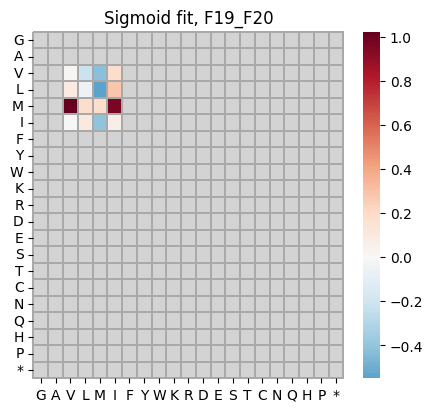

In [192]:
for mut_combination in ['F19_F20',
                        #'F19_G33',
                        #'F20_G33'
                       ]:
    
    fig = plt.figure(figsize=(5, 4.5))
    
    sns.heatmap(ddE_df_2nd_order_terms['all'][mut_combination], cmap=cmap_ddE_2nd_order_terms, 
                #vmin = ddE_df_mean_kcalmol.fillna(0, inplace=False).to_numpy().min(),
                #vmax = 5,
                mask=masks_ddE_2nd_order_terms['all'][mut_combination],
                linewidths=0.002814, linecolor='darkgrey', clip_on=False,
                center=0)
    
    plt.yticks(rotation=0, 
               #fontsize=2
              )
    #plt.xticks(fontsize=2) 
    
    plt.title('Sigmoid fit, ' +  mut_combination)

    #plt.savefig('./figures/20240206_mochi_ddEa_heatmap_all_3_doubles_1st_ord_terms_allowed_Sigmoid.pdf',
    #           bbox_inches = 'tight')

/tmp/ipykernel_1758950/1193074484.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(5, 4.5))


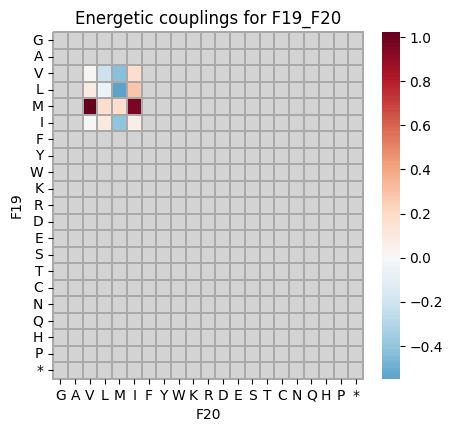

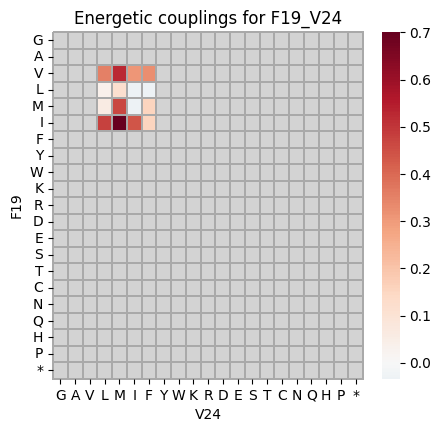

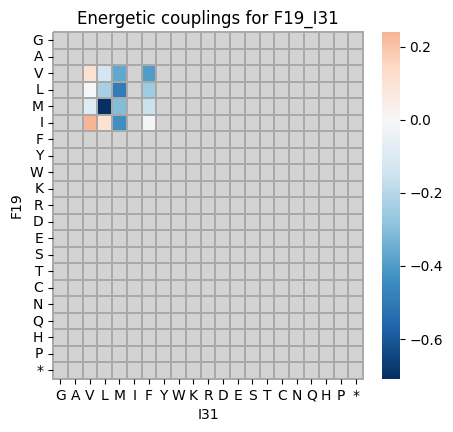

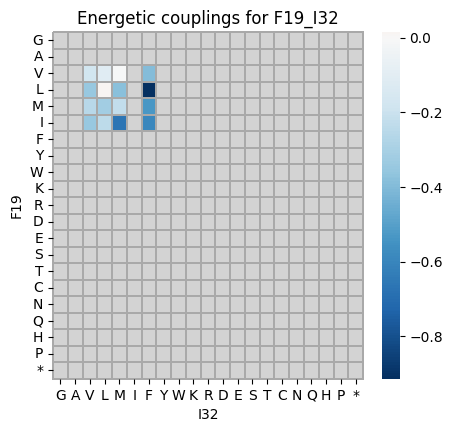

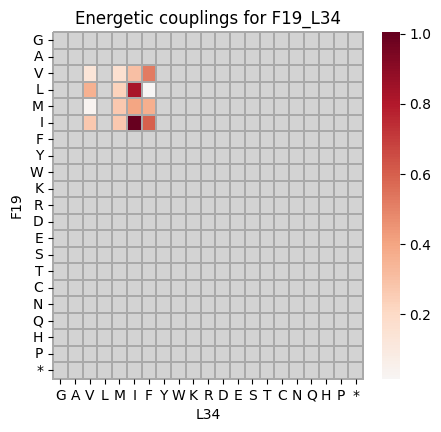

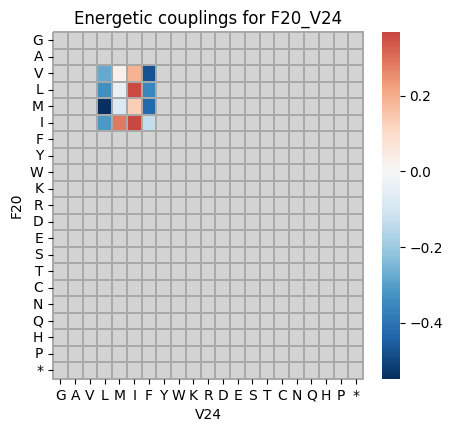

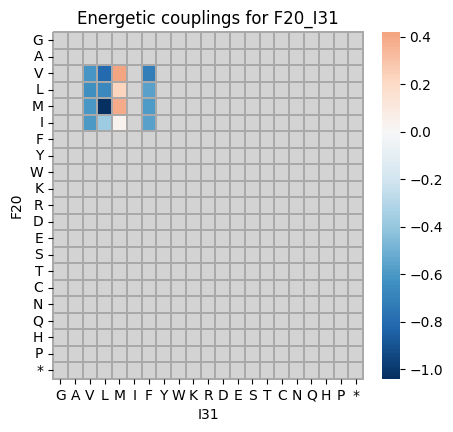

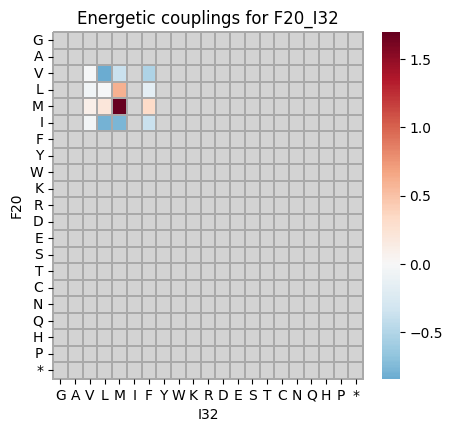

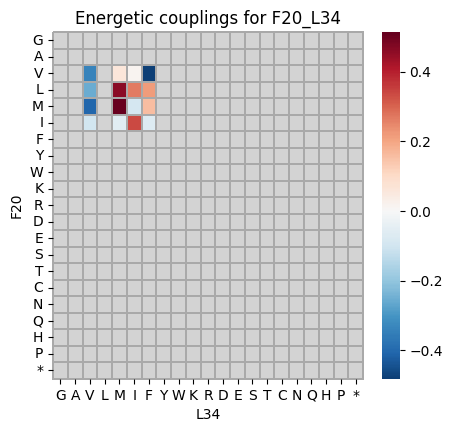

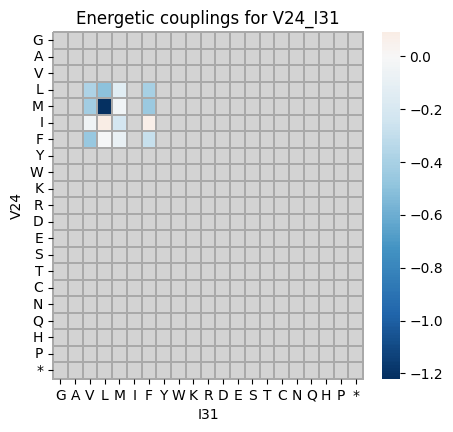

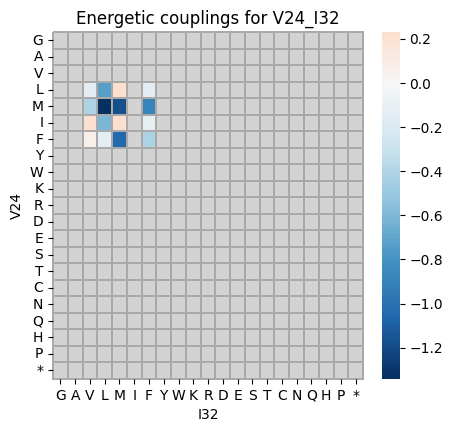

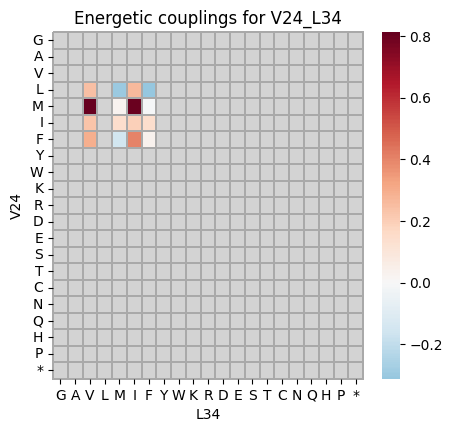

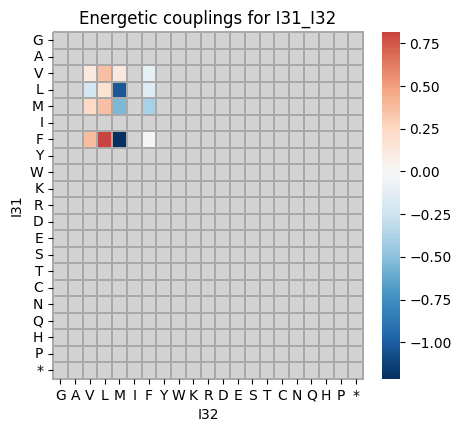

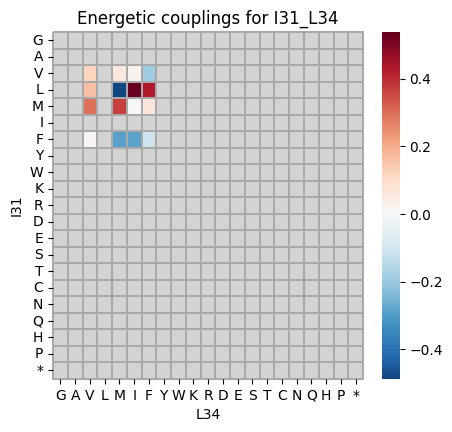

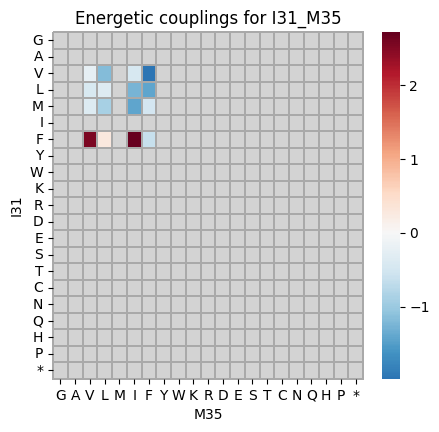

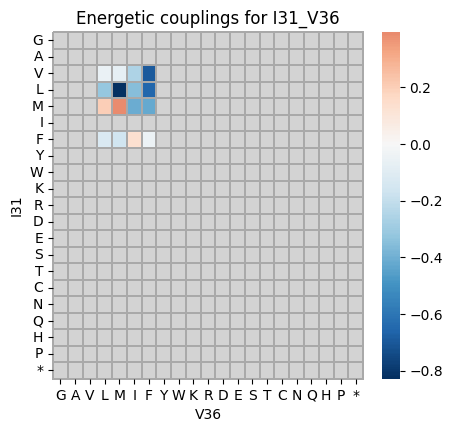

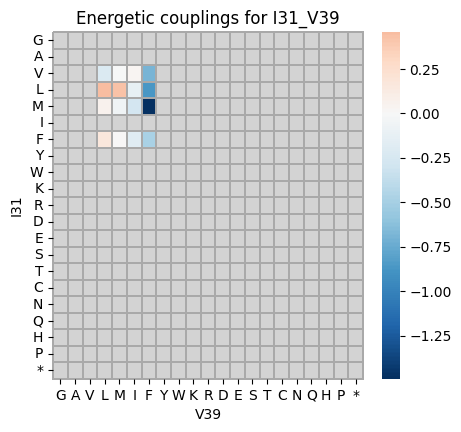

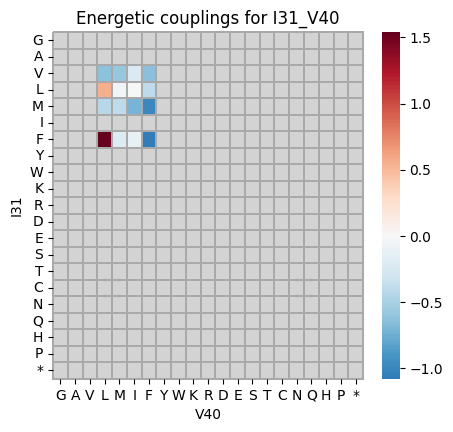

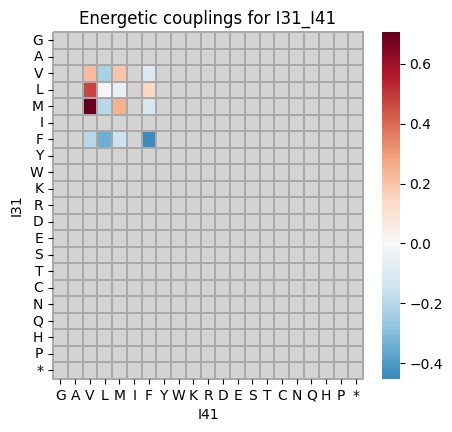

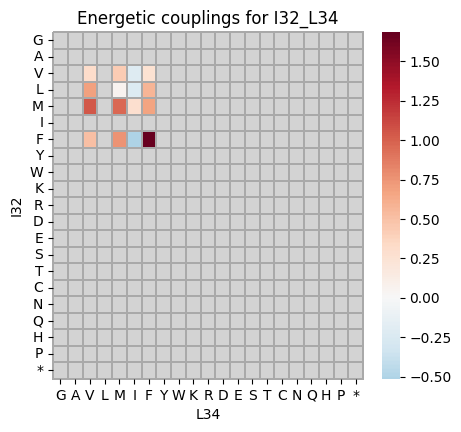

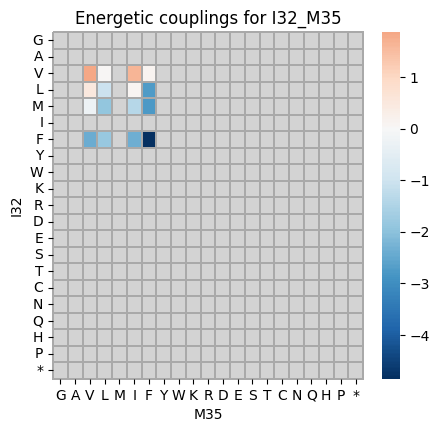

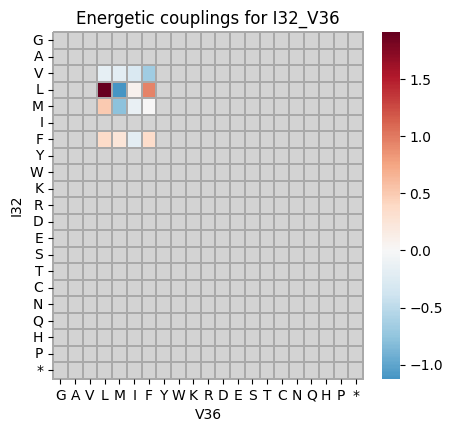

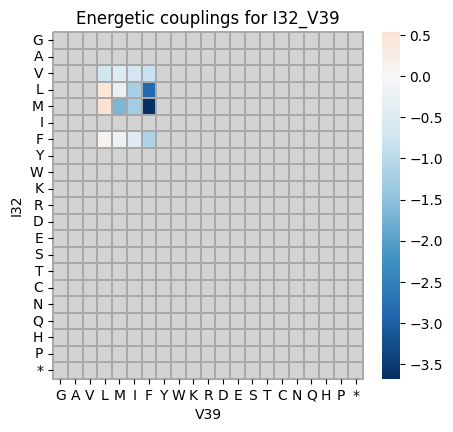

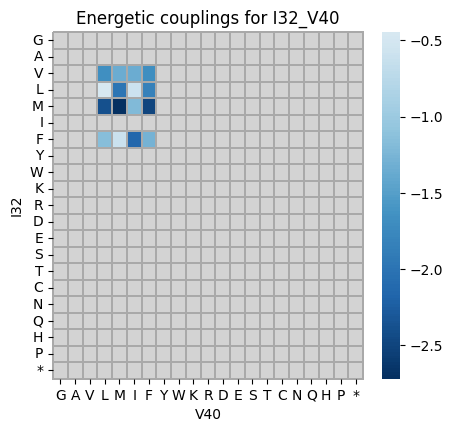

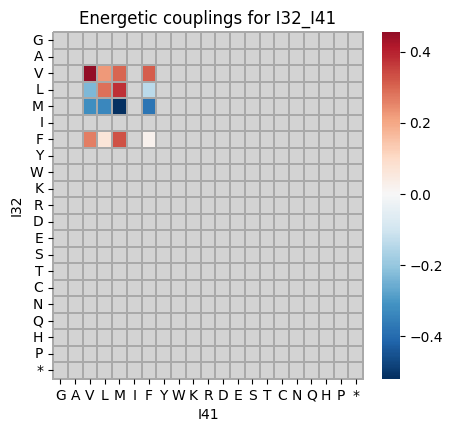

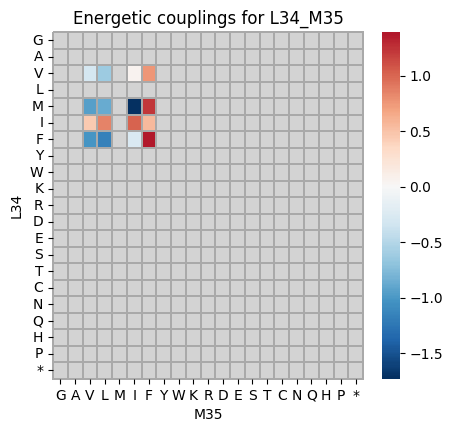

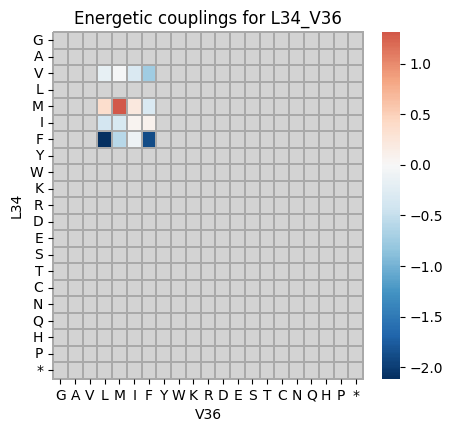

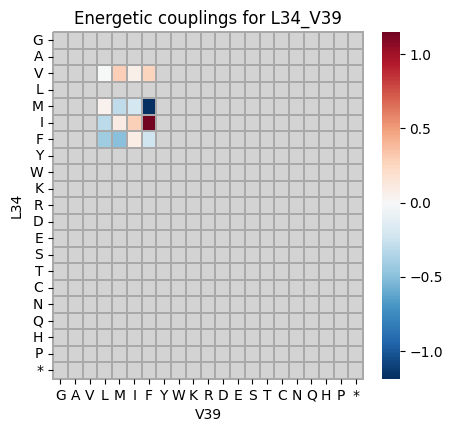

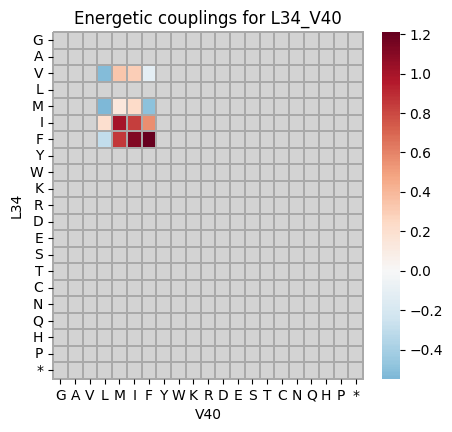

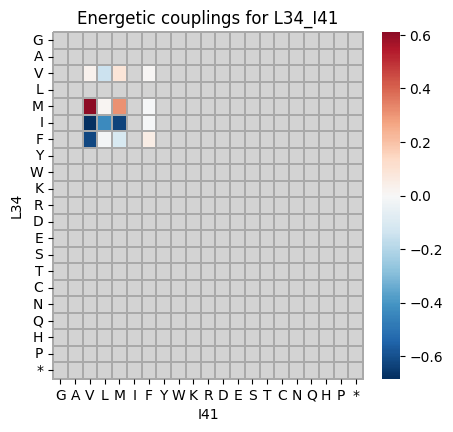

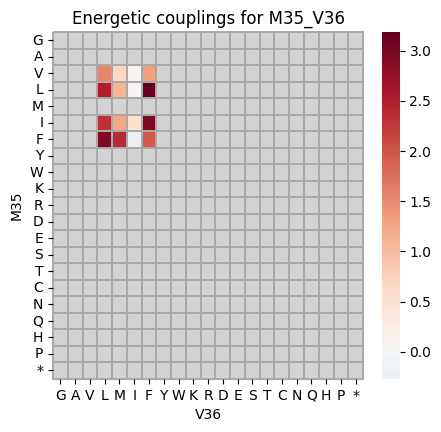

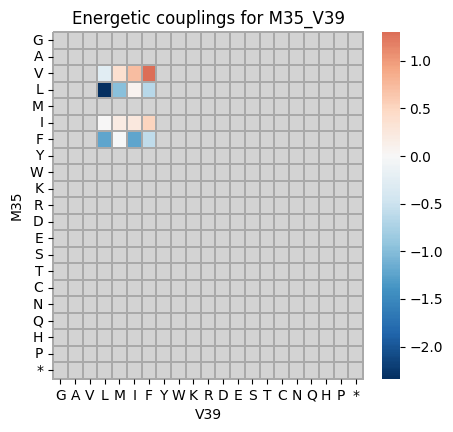

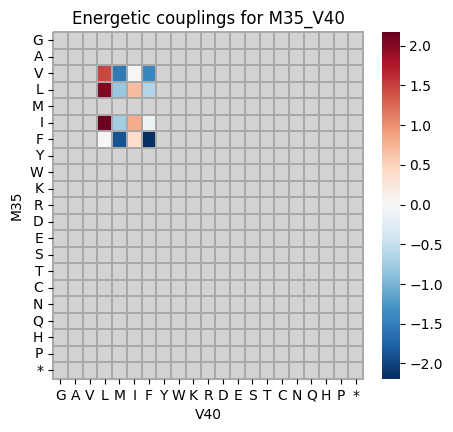

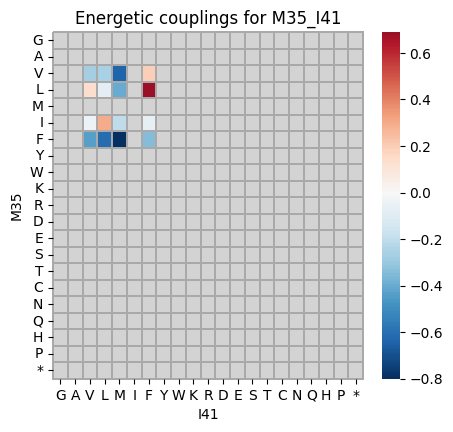

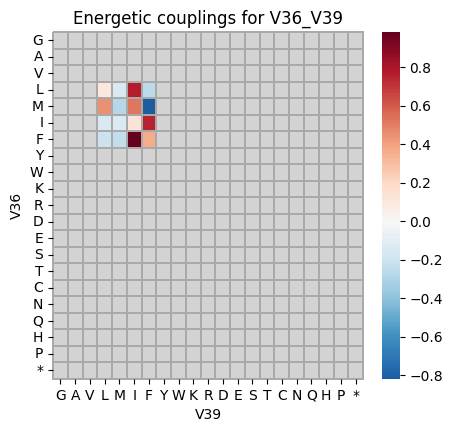

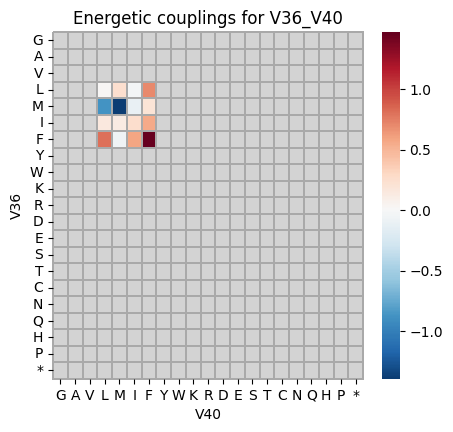

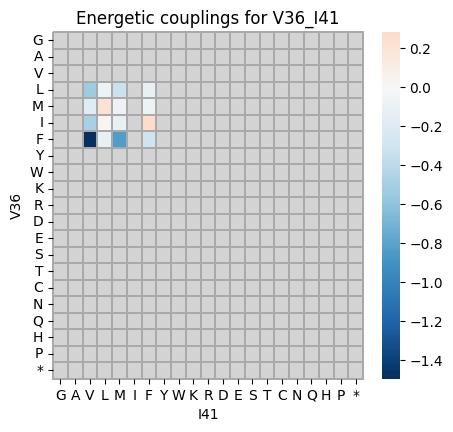

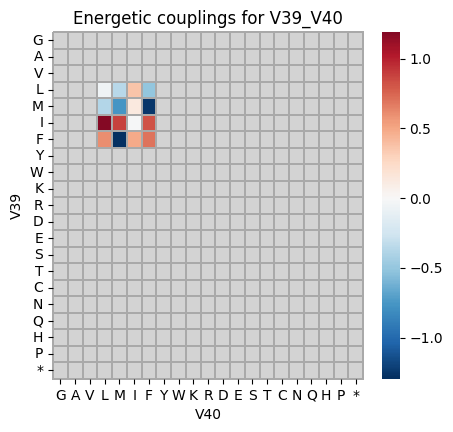

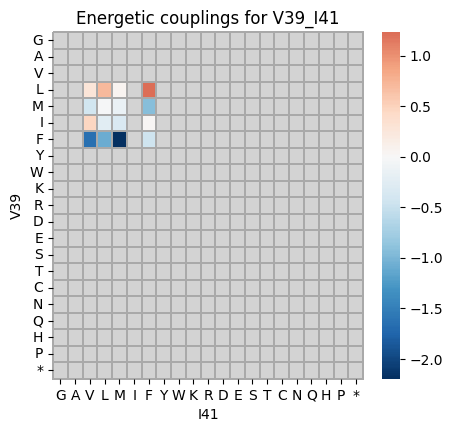

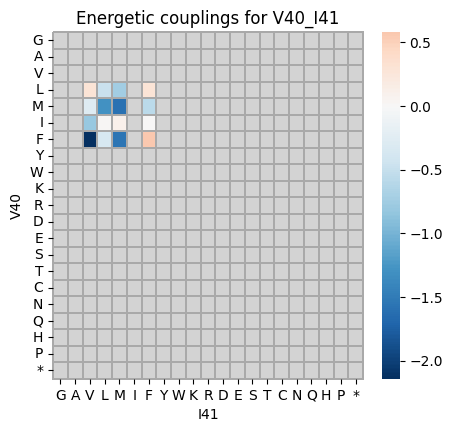

In [193]:
for mut_combination in not_empty_dfs_keys:
    
    fig = plt.figure(figsize=(5, 4.5))
    
    
    sns.heatmap(ddE_df_2nd_order_terms['all'][mut_combination], cmap=cmap_ddE_2nd_order_terms, 
                #vmin = ddE_df_mean_kcalmol.fillna(0, inplace=False).to_numpy().min(),
                #vmax = 5,
                mask=masks_ddE_2nd_order_terms['all'][mut_combination],
                linewidths=0.002814, linecolor='darkgrey', clip_on=False,
                center=0)
    
    plt.yticks(rotation=0, 
               #fontsize=2
              )
    
    plt.ylabel(mut_combination.split('_')[0])
    plt.xlabel(mut_combination.split('_')[1])
    
    #plt.xticks(fontsize=2) 
    
    plt.title('Energetic couplings for ' +  mut_combination)


In [194]:
weights_Nucleation_2nd_order.set_index('id').loc['F19V_F20L','mean_kcal/mol']

0.09029513

In [195]:
weights_Nucleation_2nd_order.set_index('id').loc['F19V_F20L','ddEa']

-0.09029513

In [196]:
weights_Nucleation_2nd_order.set_index('id').loc['F19V_F20L','ddEa_recentered']

-0.217032870240824

In [200]:
weights_Nucleation_2nd_order.set_index('id').loc['F19V_F20L','ddEa'] / weights_Nucleation_2nd_order.set_index('id').loc['F19V_F20L','ddEa_recentered']


0.4160435693441585

In [197]:
weights_Nucleation_2nd_order.set_index('id').loc['F19M_F20V','mean_kcal/mol']

-0.42505747

In [198]:
weights_Nucleation_2nd_order.set_index('id').loc['F19M_F20V','ddEa']

0.42505747

In [288]:
weights_Nucleation_2nd_order.set_index('id').loc['F19M_F20V','ddEa_recentered']

1.0216657612808462

In [202]:
np.unique(weights_Nucleation_2nd_order['mean_kcal/mol'] / weights_Nucleation_2nd_order['ddEa_recentered'])

array([-0.41604357, -0.41604357, -0.41604357])

/tmp/ipykernel_1758950/2465059947.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(2, 1.5))


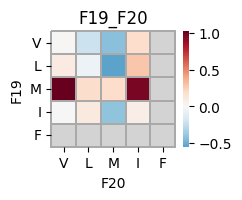

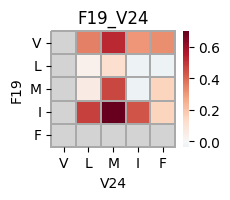

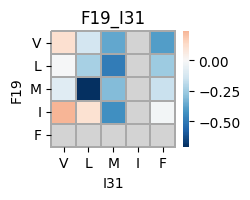

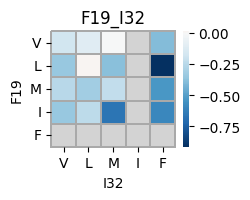

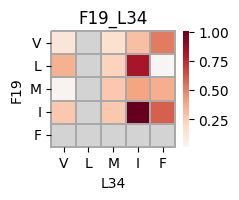

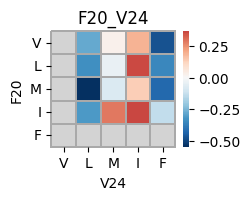

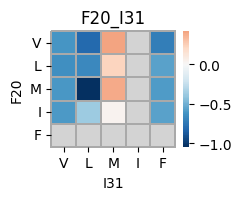

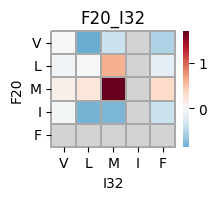

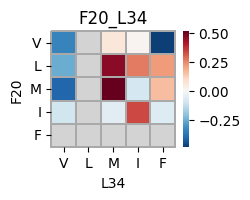

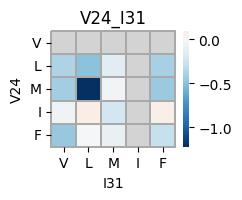

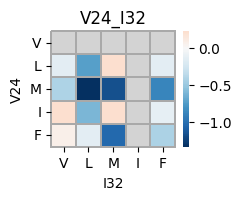

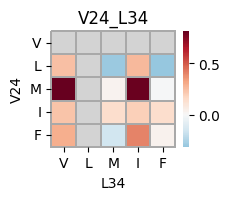

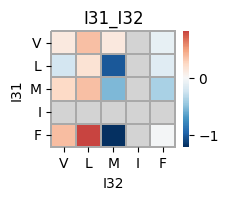

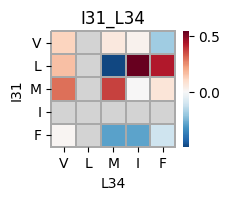

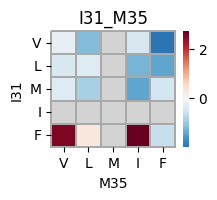

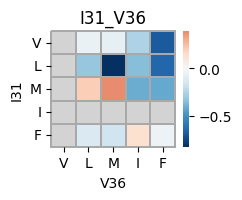

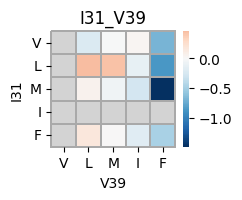

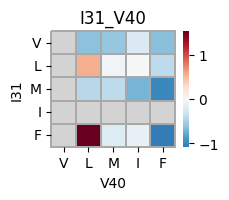

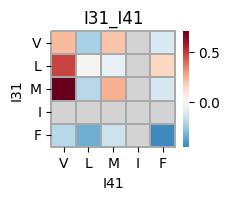

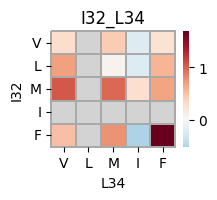

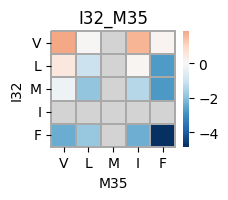

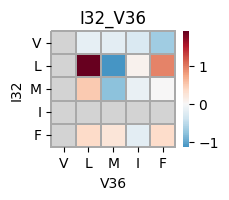

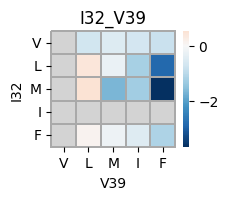

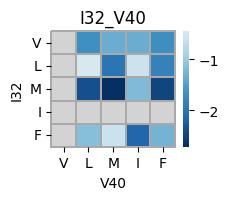

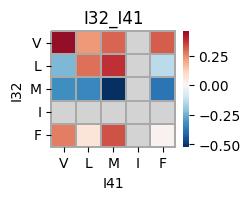

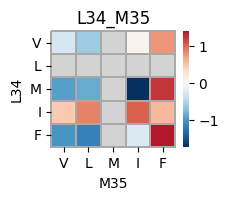

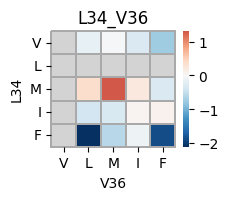

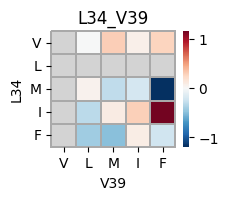

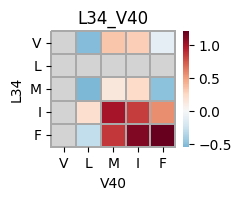

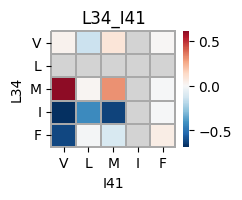

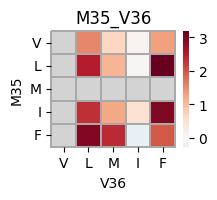

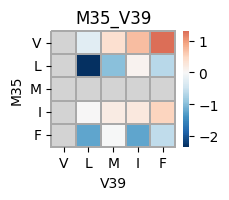

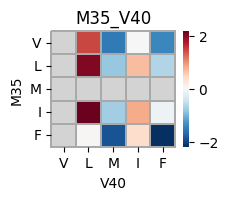

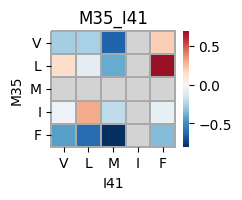

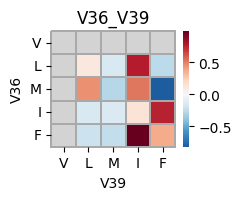

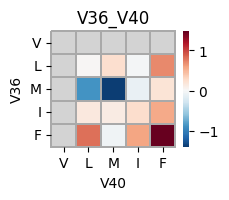

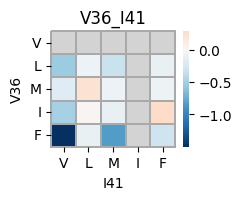

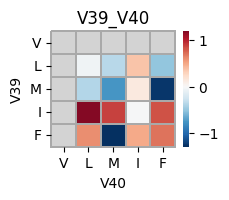

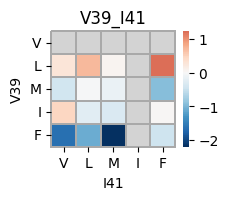

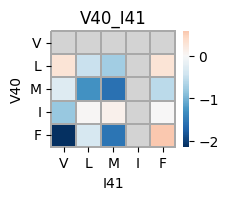

In [203]:
for mut_combination in not_empty_dfs_keys:
    
    fig = plt.figure(figsize=(2, 1.5))
    
    
    rows2display = ['V','L','M','I','F']
    cols2display = ['V','L','M','I','F']
    
    
    sns.heatmap(ddE_df_2nd_order_terms['all'][mut_combination].loc[rows2display, cols2display], cmap=cmap_ddE_2nd_order_terms, 
                #vmin = ddE_df_mean_kcalmol.fillna(0, inplace=False).to_numpy().min(),
                #vmax = 5,
                mask=masks_ddE_2nd_order_terms['all'][mut_combination].loc[rows2display, cols2display],
                linewidths=0.002814, linecolor='darkgrey', clip_on=False,
                center=0)
    
    plt.yticks(rotation=0, 
               #fontsize=2
              )
    
    plt.ylabel(mut_combination.split('_')[0])
    plt.xlabel(mut_combination.split('_')[1])
    
    #plt.xticks(fontsize=2) 
    
    plt.title(mut_combination)

    plt.savefig('./figures/20240722_energetic_couplings_' + mut_combination + '.pdf',
               bbox_inches = 'tight')

In [204]:
weights_Nucleation_2nd_order['ddEa_recentered']

0      0.244798
1      0.225747
2      0.008122
3      2.169536
4      1.539307
         ...   
635   -0.482234
636    0.215041
637   -0.397077
638    0.679157
639   -0.007020
Name: ddEa_recentered, Length: 640, dtype: float64

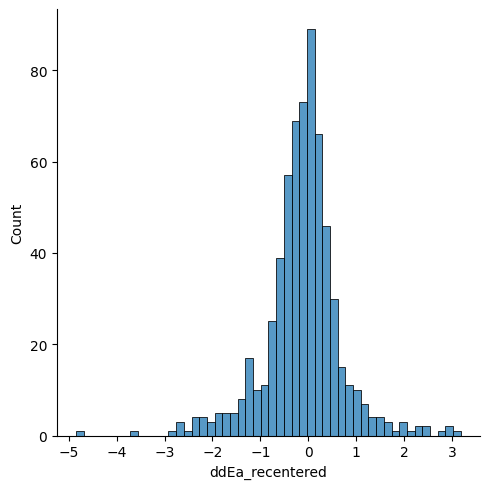

In [205]:
sns.displot(weights_Nucleation_2nd_order['ddEa_recentered'])

In [231]:
weights_Nucleation_2nd_order[(weights_Nucleation_2nd_order['ddEa_recentered'] < 1) & (weights_Nucleation_2nd_order['ddEa_recentered'] > -1)]


id     id_ref    Pos Pos_ref    fold_1    fold_2    fold_3  \
0    V36L_V40M  V36L_V40M  36_40   36_40 -0.007173  0.308364 -0.107993   
1    I31V_I41V  I31V_I41V  31_41   31_41 -0.285702 -0.127356 -0.068321   
2    F19I_F20V  F19I_F20V  19_20   19_20 -0.204647  0.066053  0.290241   
5    M35I_V40F  M35I_V40F  35_40   35_40  0.043280  0.568651  0.386600   
6    L34F_I41F  L34F_I41F  34_41   34_41  0.293182  0.261151 -0.085708   
..         ...        ...    ...     ...       ...       ...       ...   
635  F20V_L34F  F20V_L34F  20_34   20_34  0.297921  0.329733  0.396647   
636  L34M_V36I  L34M_V36I  34_36   34_36 -0.093798 -0.093373 -0.094947   
637  I31M_V40M  I31M_V40M  31_40   31_40  0.347809  0.154206  0.092261   
638  I32M_L34F  I32M_L34F  32_34   32_34 -0.894396 -0.766055 -0.524387   
639  F19V_I32M  F19V_I32M  19_32   19_32  0.052495  0.054894  0.164231   

       fold_4    fold_5    fold_6  ...  trait_name  mean_kcal/mol  \
0   -0.272195 -0.201784 -0.379566  ...  Nucleation      -0.101847   
1   -0.074500 -0.288390 -0.105110  ...  Nucleation      -0.093921   
2    0.033616  0.044246 -0.093565  ...  Nucleation      -0.003379   
5    0.046156 -0.194208  0.049527  ...  Nucleation       0.046501   
6   -0.451143 -0.294701 -0.173344  ...  Nucleation      -0.022181   
..        ...       ...       ...  ...         ...            ...   
635  0.148138  0.351929  0.206056  ...  Nucleation       0.200630   
636 -0.130022 -0.255219 -0.146849  ...  Nucleation      -0.089466   
637  0.251844  0.468843  0.331124  ...  Nucleation       0.165201   
638 -0.299532 -0.329063 -0.572234  ...  Nucleation      -0.282559   
639  0.020078 -0.235106 -0.232521  ...  Nucleation       0.002921   

     std_kcal/mol  ci95_kcal/mol      ddEa  ddEa_recentered  std_scaled  \
0        0.128725       0.504602  0.101847         0.244798    0.309403   
1        0.060089       0.235548  0.093921         0.225747    0.144429   
2        0.082789       0.324534  0.003379         0.008122    0.198992   
5        0.141660       0.555306 -0.046501        -0.111769    0.340492   
6        0.147092       0.576601  0.022181         0.053314    0.353550   
..            ...            ...       ...              ...         ...   
635      0.070220       0.275261 -0.200630        -0.482234    0.168780   
636      0.074809       0.293253  0.089466         0.215041    0.179812   
637      0.073440       0.287886 -0.165201        -0.397077    0.176521   
638      0.138501       0.542925  0.282559         0.679157    0.332901   
639      0.161969       0.634918 -0.002921        -0.007020    0.389307   

     conservative_score all  conservative_both  
0                     2   1                  1  
1                     2   1                  1  
2                     0   1                  0  
5                     1   1                  0  
6                     0   1                  0  
..                  ...  ..                ...  
635                   0   1                  0  
636                   2   1                  1  
637                   2   1                  1  
638                   1   1                  0  
639                   1   1                  0  

[536 rows x 28 columns]

In [232]:
weights_Nucleation_2nd_order

id     id_ref    Pos Pos_ref    fold_1    fold_2    fold_3  \
0    V36L_V40M  V36L_V40M  36_40   36_40 -0.007173  0.308364 -0.107993   
1    I31V_I41V  I31V_I41V  31_41   31_41 -0.285702 -0.127356 -0.068321   
2    F19I_F20V  F19I_F20V  19_20   19_20 -0.204647  0.066053  0.290241   
3    M35I_V40L  M35I_V40L  35_40   35_40 -1.838146 -1.267114 -1.587382   
4    I31F_V40L  I31F_V40L  31_40   31_40 -0.936283 -1.122599 -1.695565   
..         ...        ...    ...     ...       ...       ...       ...   
635  F20V_L34F  F20V_L34F  20_34   20_34  0.297921  0.329733  0.396647   
636  L34M_V36I  L34M_V36I  34_36   34_36 -0.093798 -0.093373 -0.094947   
637  I31M_V40M  I31M_V40M  31_40   31_40  0.347809  0.154206  0.092261   
638  I32M_L34F  I32M_L34F  32_34   32_34 -0.894396 -0.766055 -0.524387   
639  F19V_I32M  F19V_I32M  19_32   19_32  0.052495  0.054894  0.164231   

       fold_4    fold_5    fold_6  ...  trait_name  mean_kcal/mol  \
0   -0.272195 -0.201784 -0.379566  ...  Nucleation      -0.101847   
1   -0.074500 -0.288390 -0.105110  ...  Nucleation      -0.093921   
2    0.033616  0.044246 -0.093565  ...  Nucleation      -0.003379   
3   -0.874730 -1.422868 -1.258638  ...  Nucleation      -0.902621   
4   -1.047511 -1.479724 -1.050488  ...  Nucleation      -0.640419   
..        ...       ...       ...  ...         ...            ...   
635  0.148138  0.351929  0.206056  ...  Nucleation       0.200630   
636 -0.130022 -0.255219 -0.146849  ...  Nucleation      -0.089466   
637  0.251844  0.468843  0.331124  ...  Nucleation       0.165201   
638 -0.299532 -0.329063 -0.572234  ...  Nucleation      -0.282559   
639  0.020078 -0.235106 -0.232521  ...  Nucleation       0.002921   

     std_kcal/mol  ci95_kcal/mol      ddEa  ddEa_recentered  std_scaled  \
0        0.128725       0.504602  0.101847         0.244798    0.309403   
1        0.060089       0.235548  0.093921         0.225747    0.144429   
2        0.082789       0.324534  0.003379         0.008122    0.198992   
3        0.197599       0.774586  0.902621         2.169536    0.474947   
4        0.196960       0.772084  0.640419         1.539307    0.473412   
..            ...            ...       ...              ...         ...   
635      0.070220       0.275261 -0.200630        -0.482234    0.168780   
636      0.074809       0.293253  0.089466         0.215041    0.179812   
637      0.073440       0.287886 -0.165201        -0.397077    0.176521   
638      0.138501       0.542925  0.282559         0.679157    0.332901   
639      0.161969       0.634918 -0.002921        -0.007020    0.389307   

     conservative_score all  conservative_both  
0                     2   1                  1  
1                     2   1                  1  
2                     0   1                  0  
3                     2   1                  1  
4                     1   1                  0  
..                  ...  ..                ...  
635                   0   1                  0  
636                   2   1                  1  
637                   2   1                  1  
638                   1   1                  0  
639                   1   1                  0  

[640 rows x 28 columns]

In [233]:
627/640

0.9796875

In [234]:
weights_Nucleation_2nd_order[(weights_Nucleation_2nd_order['ddEa_recentered'] < 0.5) & (weights_Nucleation_2nd_order['ddEa_recentered'] > -0.5)]


id     id_ref    Pos Pos_ref    fold_1    fold_2    fold_3  \
0    V36L_V40M  V36L_V40M  36_40   36_40 -0.007173  0.308364 -0.107993   
1    I31V_I41V  I31V_I41V  31_41   31_41 -0.285702 -0.127356 -0.068321   
2    F19I_F20V  F19I_F20V  19_20   19_20 -0.204647  0.066053  0.290241   
5    M35I_V40F  M35I_V40F  35_40   35_40  0.043280  0.568651  0.386600   
6    L34F_I41F  L34F_I41F  34_41   34_41  0.293182  0.261151 -0.085708   
8    F19L_L34V  F19L_L34V  19_34   19_34 -0.283325 -0.132379 -0.259273   
10   F19L_L34M  F19L_L34M  19_34   19_34 -0.067390 -0.066772 -0.312370   
12   M35F_V40I  M35F_V40I  35_40   35_40  0.121337 -0.379250 -0.381129   
13   L34M_I41F  L34M_I41F  34_41   34_41  0.096434  0.028910  0.057517   
15   M35V_V36I  M35V_V36I  35_36   35_36 -0.071849  0.002279  0.019602   
17   V40L_I41V  V40L_I41V  40_41   40_41  0.121804  0.093385 -0.575546   
19   I31F_V40I  I31F_V40I  31_40   31_40  0.261806 -0.007203 -0.077506   
20   F20V_I31M  F20V_I31M  20_31   20_31 -0.220595 -0.424859 -0.117043   
22   V24I_L34I  V24I_L34I  24_34   24_34 -0.020792 -0.265849 -0.410382   
23   F20M_L34F  F20M_L34F  20_34   20_34 -0.068857 -0.092023 -0.193660   
25   F20I_V24F  F20I_V24F  20_24   20_24  0.121928 -0.033047  0.175307   
28   M35F_I41V  M35F_I41V  35_41   35_41  0.648096  0.240801  0.091066   
31   V36F_V40M  V36F_V40M  36_40   36_40 -0.097764  0.522649  0.116602   
32   V36L_V39L  V36L_V39L  36_39   36_39  0.014375 -0.025390 -0.142413   
33   F19V_L34M  F19V_L34M  19_34   19_34 -0.096136 -0.191904 -0.153814   
34   I32F_V39L  I32F_V39L  32_39   32_39 -0.103832 -0.453652 -0.286470   
35   V24M_L34F  V24M_L34F  24_34   24_34  0.067701  0.051360  0.024506   
36   I31V_M35I  I31V_M35I  31_35   31_35  0.337818  0.234852  0.286606   
39   V40L_I41L  V40L_I41L  40_41   40_41  0.472282  0.483127  0.163813   
41   F19L_L34F  F19L_L34F  19_34   19_34  0.077801  0.063252 -0.144513   
42   L34I_I41F  L34I_I41F  34_41   34_41  0.162274  0.139114 -0.278836   
44   I32V_V36I  I32V_V36I  32_36   32_36  0.188602  0.440138  0.266970   
45   I32M_I41L  I32M_I41L  32_41   32_41  0.144140 -0.284085 -0.080473   
46   M35I_V39L  M35I_V39L  35_39   35_39  0.560418 -0.311533  0.316988   
47   I32V_I41M  I32V_I41M  32_41   32_41 -0.184041 -0.343132 -0.326857   
48   I32V_L34M  I32V_L34M  32_34   32_34 -0.193073 -0.353270 -0.381873   
49   I31L_I41F  I31L_I41F  31_41   31_41 -0.201544  0.162673  0.265946   
51   V39L_V40I  V39L_V40I  39_40   39_40 -0.326977  0.000019 -0.042895   
52   I32F_V36I  I32F_V36I  32_36   32_36  0.220246  0.378277  0.248391   
53   M35I_I41V  M35I_I41V  35_41   35_41  0.290305  0.022447  0.014852   
54   F20L_L34F  F20L_L34F  20_34   20_34 -0.153455  0.038253 -0.136239   
56   L34M_V36L  L34M_V36L  34_36   34_36 -0.198702 -0.438605 -0.294382   
58   F19I_F20L  F19I_F20L  19_20   19_20 -0.107287  0.053818  0.144403   
59   I31F_L34I  I31F_L34I  31_34   31_34  0.042309  0.334517 -0.023344   
61   I32F_I41F  I32F_I41F  32_41   32_41 -0.211560 -0.076655  0.083114   
62   M35V_V40I  M35V_V40I  35_40   35_40  0.031414  0.202481  0.011705   
63   F19M_I31V  F19M_I31V  19_31   19_31 -0.004004 -0.058822 -0.064338   
64   V24F_I31F  V24F_I31F  24_31   24_31  0.147822  0.203493  0.049347   
65   V24I_I31F  V24I_I31F  24_31   24_31  0.117302  0.057993 -0.144385   
66   F19V_F20L  F19V_F20L  19_20   19_20  0.187852  0.241522  0.289114   
67   I32F_V39I  I32F_V39I  32_39   32_39  0.244864  0.564162  0.551779   
68   V24L_I32F  V24L_I32F  24_32   24_32  0.175253  0.251072  0.181850   
69   I32M_I41F  I32M_I41F  32_41   32_41  0.294071  0.263596  0.191974   
71   M35I_V39I  M35I_V39I  35_39   35_39 -0.123823 -0.106500 -0.164418   
73   F19I_F20M  F19I_F20M  19_20   19_20  0.162901  0.199804  0.545031   
74   F20L_I32F  F20L_I32F  20_32   20_32 -0.073869  0.115738  0.108366   
76   L34M_I41M  L34M_I41M  34_41   34_41 -0.039484 -0.093058 -0.174732   
77   V36F_V39F  V36F_V39F  36_39   36_39 -0.640786 -0.141858 -0.154588   
78   L34V_V39M  

In [239]:
weights_Nucleation_2nd_order_high = weights_Nucleation_2nd_order[(weights_Nucleation_2nd_order['ddEa_recentered'] > 1) | (weights_Nucleation_2nd_order['ddEa_recentered'] < -1)]


In [240]:
weights_Nucleation_2nd_order_high.shape

(104, 28)

In [241]:
weights_Nucleation_2nd_order_high['Pos_ref'].value_counts()

Pos_ref
32_40    13
35_36    11
32_35    11
35_40     7
31_35     7
34_35     6
32_39     6
35_39     4
40_41     4
39_41     4
34_40     3
34_36     3
24_32     3
39_40     3
31_40     2
32_34     2
36_40     2
34_39     2
32_36     2
31_32     2
20_31     1
19_34     1
36_41     1
31_39     1
24_31     1
20_32     1
19_20     1
Name: count, dtype: int64

In [242]:
weights_Nucleation_2nd_order_high['Pos_1'] = [pos_ref.split('_')[0] for pos_ref in list(weights_Nucleation_2nd_order_high['Pos_ref'])]
weights_Nucleation_2nd_order_high['Pos_2'] = [pos_ref.split('_')[1] for pos_ref in list(weights_Nucleation_2nd_order_high['Pos_ref'])]



/tmp/ipykernel_704707/1317259159.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weights_Nucleation_2nd_order_high['Pos_1'] = [pos_ref.split('_')[0] for pos_ref in list(weights_Nucleation_2nd_order_high['Pos_ref'])]
/tmp/ipykernel_704707/1317259159.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weights_Nucleation_2nd_order_high['Pos_2'] = [pos_ref.split('_')[1] for pos_ref in list(weights_Nucleation_2nd_order_high['Pos_ref'])]


In [243]:
weights_Nucleation_2nd_order_high['Pos_1'].value_counts()

Pos_1
32    34
35    22
34    14
31    12
39     7
24     4
40     4
36     3
20     2
19     2
Name: count, dtype: int64

In [244]:
weights_Nucleation_2nd_order_high['Pos_2'].value_counts()

Pos_2
40    30
35    24
36    16
39    13
41     9
32     6
34     3
31     2
20     1
Name: count, dtype: int64

In [245]:
weights_Nucleation_2nd_order_high

id     id_ref    Pos Pos_ref    fold_1    fold_2    fold_3  \
3    M35I_V40L  M35I_V40L  35_40   35_40 -1.838146 -1.267114 -1.587382   
4    I31F_V40L  I31F_V40L  31_40   31_40 -0.936283 -1.122599 -1.695565   
7    L34F_M35F  L34F_M35F  34_35   34_35 -0.914367 -1.101242 -1.129960   
11   V39I_V40L  V39I_V40L  39_40   39_40 -0.766645 -0.764344 -0.786023   
30   I32V_V40F  I32V_V40F  32_40   32_40  1.226626  1.320101  1.153020   
37   V39F_V40M  V39F_V40M  39_40   39_40  0.698468  0.970540  1.016357   
38   M35I_V36M  M35I_V36M  35_36   35_36 -0.518415 -0.905460 -0.894622   
43   M35F_V39L  M35F_V39L  35_39   35_39  0.959833  0.324678  0.973164   
50   M35L_V36M  M35L_V36M  35_36   35_36 -0.263989 -0.316926 -0.809261   
70   I32F_V39F  I32F_V39F  32_39   32_39  0.734240  0.847754  0.781103   
83   M35I_V36L  M35I_V36L  35_36   35_36 -1.727832 -1.296148 -1.443961   
87   V36F_V40F  V36F_V40F  36_40   36_40 -0.985814 -0.856892 -1.131175   
88   I32M_V39M  I32M_V39M  32_39   32_39  1.306266  0.658436  1.161274   
90   V39F_I41V  V39F_I41V  39_41   39_41  1.293179  1.173820  0.861544   
99   I32F_L34F  I32F_L34F  32_34   32_34 -1.213179 -1.127859 -1.016177   
101  V24M_I32M  V24M_I32M  24_32   24_32  1.191206  1.018482  0.567800   
115  I31F_M35I  I31F_M35I  31_35   31_35 -2.220611 -1.784968 -2.290099   
116  M35V_V39F  M35V_V39F  35_39   35_39 -0.798171 -0.937947 -1.094782   
123  M35L_V36L  M35L_V36L  35_36   35_36 -1.491013 -1.381266 -1.621271   
124  I32V_V40M  I32V_V40M  32_40   32_40  0.871882  0.877283  0.837321   
125  I32L_V39I  I32L_V39I  32_39   32_39  0.777731  1.015731  0.670591   
126  V24M_I32L  V24M_I32L  24_32   24_32  1.284237  1.095768  0.591325   
136  M35L_V39L  M35L_V39L  35_39   35_39  1.666148  1.385017  1.605971   
152  I31F_M35V  I31F_M35V  31_35   31_35 -1.669876 -1.939501 -2.295968   
156  L34F_V36L  L34F_V36L  34_36   34_36  1.474712  1.476026  1.431324   
161  I32F_M35F  I32F_M35F  32_35   32_35  3.345241  3.359855  3.156956   
163  I32M_V40M  I32M_V40M  32_40   32_40  1.856466  1.870969  1.937121   
164  M35F_V39I  M35F_V39I  35_39   35_39  0.992327  1.031082  0.683398   
170  M35F_V36L  M35F_V36L  35_36   35_36 -1.975561 -1.644309 -2.028841   
174  V40F_I41M  V40F_I41M  40_41   40_41  0.941679  1.214848  1.204448   
183  V39F_I41M  V39F_I41M  39_41   39_41  1.170716  1.426773  1.528542   
185  I32L_V39F  I32L_V39F  32_39   32_39  1.726837  1.313109  2.041511   
186  I31M_M35I  I31M_M35I  31_35   31_35  1.152512  0.887120  0.982698   
188  V24F_I32M  V24F_I32M  24_32   24_32  1.140618  0.706010  0.522477   
192  I31F_V40F  I31F_V40F  31_40   31_40  0.619422  0.835655  0.821099   
204  I32V_V40L  I32V_V40L  32_40   32_40  1.162991  1.265557  0.977049   
206  L34F_M35L  L34F_M35L  34_35   34_35  0.530955  1.047092  0.321549   
221  V40M_I41M  V40M_I41M  40_41   40_41  0.891640  0.995509  1.221421   
228  L34M_M35F  L34M_M35F  34_35   34_35 -0.724903 -1.342288 -0.994791   
230  I32M_V39F  I32M_V39F  32_39   32_39  2.461856  2.576933  2.472713   
231  M35L_V36F  M35L_V36F  35_36   35_36 -2.198065 -2.131235 -1.043914   
236  I32F_M35I  I32F_M35I  32_35   32_35  1.591692  1.529594  1.434681   
237  I32L_V40M  I32L_V40M  32_40   32_40  1.760628  1.459834  2.090293   
239  I31L_M35F  I31L_M35F  31_35   31_35  0.346553  1.090848  0.686366   
246  L34I_V40M  L34I_V40M  34_40   34_40 -0.929964 -0.489194 -0.515505   
251  M35F_V36M  M35F_V36M  35_36   35_36 -1.099841 -1.766252 -1.751442   
261  L34F_V36F  L34F_V36F  34_36   34_36  1.227730  1.376596  1.241055   
263  V39F_I41L  V39F_I41L  39_41   39_41  0.670675  0.581685  0.680782   
264  F20M_I31L  F20M_I31L  20_31   20_31  0.647548  0.728298  0.841514   
265  I32M_V40I  I32M_V40I  32_40   32_40  0.438705  1.094689  1.002702   
267  L34F_V40I  L34F_V40I  34_40   34_40 -0.776305 -0.667468 -0.547395   
273  M35I_V36F  M35I_V36F  35_36   35_36 -2.296442 -1.873446 -2.057143   
274  I32M_M35L  I32M_M35L  32_35   32_35  1.320953  1.579027  1.770819   
275  M35F_V36F  

In [246]:
weights_Nucleation_2nd_order_high['old_new_aa_1_2'] = [mut_id.split('_')[0][0] + '-' + mut_id.split('_')[0][-1] + '_' + mut_id.split('_')[1][0] + '-' + mut_id.split('_')[1][-1] for mut_id in weights_Nucleation_2nd_order_high['id']]


/tmp/ipykernel_704707/947407222.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weights_Nucleation_2nd_order_high['old_new_aa_1_2'] = [mut_id.split('_')[0][0] + '-' + mut_id.split('_')[0][-1] + '_' + mut_id.split('_')[1][0] + '-' + mut_id.split('_')[1][-1] for mut_id in weights_Nucleation_2nd_order_high['id']]


In [247]:
weights_Nucleation_2nd_order_high['old_new_aa_1_2'].value_counts()

old_new_aa_1_2
I-F_V-F    3
V-M_I-L    3
M-V_V-F    3
V-F_I-M    3
V-F_I-V    3
I-M_V-F    3
M-L_V-L    3
I-L_M-F    2
I-L_V-M    2
M-F_V-M    2
I-F_V-L    2
I-M_M-I    2
I-M_V-I    2
I-L_V-F    2
M-F_V-F    2
I-F_M-V    2
M-V_V-L    2
M-I_V-L    2
L-F_V-F    2
I-F_M-I    2
V-M_I-M    2
I-M_V-M    2
M-F_V-L    2
I-L_V-I    1
V-M_V-M    1
L-F_M-F    1
L-I_M-I    1
I-M_M-F    1
M-V_V-M    1
I-L_V-L    1
I-L_M-L    1
I-L_M-I    1
L-M_M-I    1
L-F_M-V    1
I-M_L-V    1
I-F_I-M    1
I-M_V-L    1
L-I_V-F    1
L-M_V-M    1
I-F_M-L    1
V-L_I-F    1
V-M_V-F    1
L-M_V-F    1
F-M_I-M    1
I-L_I-M    1
I-F_V-I    1
I-V_M-L    1
I-V_V-I    1
F-I_L-I    1
I-V_M-V    1
L-I_V-M    1
L-F_V-L    1
I-F_M-F    1
M-F_V-I    1
I-F_L-F    1
I-V_V-L    1
L-F_M-L    1
L-M_M-F    1
V-F_V-F    1
M-L_V-F    1
M-L_V-M    1
M-I_V-M    1
I-V_M-I    1
V-F_V-M    1
V-F_I-L    1
F-M_I-L    1
I-V_V-F    1
L-F_V-I    1
M-I_V-F    1
I-M_M-L    1
V-I_V-L    1
I-V_M-F    1
I-V_V-M    1
F-M_F-V    1
Name: count, dtype: int

In [248]:
weights_Nucleation_2nd_order_high['Pos_2'].value_counts()

Pos_2
40    30
35    24
36    16
39    13
41     9
32     6
34     3
31     2
20     1
Name: count, dtype: int64

In [249]:
weights_Nucleation_2nd_order_high

id     id_ref    Pos Pos_ref    fold_1    fold_2    fold_3  \
3    M35I_V40L  M35I_V40L  35_40   35_40 -1.838146 -1.267114 -1.587382   
4    I31F_V40L  I31F_V40L  31_40   31_40 -0.936283 -1.122599 -1.695565   
7    L34F_M35F  L34F_M35F  34_35   34_35 -0.914367 -1.101242 -1.129960   
11   V39I_V40L  V39I_V40L  39_40   39_40 -0.766645 -0.764344 -0.786023   
30   I32V_V40F  I32V_V40F  32_40   32_40  1.226626  1.320101  1.153020   
37   V39F_V40M  V39F_V40M  39_40   39_40  0.698468  0.970540  1.016357   
38   M35I_V36M  M35I_V36M  35_36   35_36 -0.518415 -0.905460 -0.894622   
43   M35F_V39L  M35F_V39L  35_39   35_39  0.959833  0.324678  0.973164   
50   M35L_V36M  M35L_V36M  35_36   35_36 -0.263989 -0.316926 -0.809261   
70   I32F_V39F  I32F_V39F  32_39   32_39  0.734240  0.847754  0.781103   
83   M35I_V36L  M35I_V36L  35_36   35_36 -1.727832 -1.296148 -1.443961   
87   V36F_V40F  V36F_V40F  36_40   36_40 -0.985814 -0.856892 -1.131175   
88   I32M_V39M  I32M_V39M  32_39   32_39  1.306266  0.658436  1.161274   
90   V39F_I41V  V39F_I41V  39_41   39_41  1.293179  1.173820  0.861544   
99   I32F_L34F  I32F_L34F  32_34   32_34 -1.213179 -1.127859 -1.016177   
101  V24M_I32M  V24M_I32M  24_32   24_32  1.191206  1.018482  0.567800   
115  I31F_M35I  I31F_M35I  31_35   31_35 -2.220611 -1.784968 -2.290099   
116  M35V_V39F  M35V_V39F  35_39   35_39 -0.798171 -0.937947 -1.094782   
123  M35L_V36L  M35L_V36L  35_36   35_36 -1.491013 -1.381266 -1.621271   
124  I32V_V40M  I32V_V40M  32_40   32_40  0.871882  0.877283  0.837321   
125  I32L_V39I  I32L_V39I  32_39   32_39  0.777731  1.015731  0.670591   
126  V24M_I32L  V24M_I32L  24_32   24_32  1.284237  1.095768  0.591325   
136  M35L_V39L  M35L_V39L  35_39   35_39  1.666148  1.385017  1.605971   
152  I31F_M35V  I31F_M35V  31_35   31_35 -1.669876 -1.939501 -2.295968   
156  L34F_V36L  L34F_V36L  34_36   34_36  1.474712  1.476026  1.431324   
161  I32F_M35F  I32F_M35F  32_35   32_35  3.345241  3.359855  3.156956   
163  I32M_V40M  I32M_V40M  32_40   32_40  1.856466  1.870969  1.937121   
164  M35F_V39I  M35F_V39I  35_39   35_39  0.992327  1.031082  0.683398   
170  M35F_V36L  M35F_V36L  35_36   35_36 -1.975561 -1.644309 -2.028841   
174  V40F_I41M  V40F_I41M  40_41   40_41  0.941679  1.214848  1.204448   
183  V39F_I41M  V39F_I41M  39_41   39_41  1.170716  1.426773  1.528542   
185  I32L_V39F  I32L_V39F  32_39   32_39  1.726837  1.313109  2.041511   
186  I31M_M35I  I31M_M35I  31_35   31_35  1.152512  0.887120  0.982698   
188  V24F_I32M  V24F_I32M  24_32   24_32  1.140618  0.706010  0.522477   
192  I31F_V40F  I31F_V40F  31_40   31_40  0.619422  0.835655  0.821099   
204  I32V_V40L  I32V_V40L  32_40   32_40  1.162991  1.265557  0.977049   
206  L34F_M35L  L34F_M35L  34_35   34_35  0.530955  1.047092  0.321549   
221  V40M_I41M  V40M_I41M  40_41   40_41  0.891640  0.995509  1.221421   
228  L34M_M35F  L34M_M35F  34_35   34_35 -0.724903 -1.342288 -0.994791   
230  I32M_V39F  I32M_V39F  32_39   32_39  2.461856  2.576933  2.472713   
231  M35L_V36F  M35L_V36F  35_36   35_36 -2.198065 -2.131235 -1.043914   
236  I32F_M35I  I32F_M35I  32_35   32_35  1.591692  1.529594  1.434681   
237  I32L_V40M  I32L_V40M  32_40   32_40  1.760628  1.459834  2.090293   
239  I31L_M35F  I31L_M35F  31_35   31_35  0.346553  1.090848  0.686366   
246  L34I_V40M  L34I_V40M  34_40   34_40 -0.929964 -0.489194 -0.515505   
251  M35F_V36M  M35F_V36M  35_36   35_36 -1.099841 -1.766252 -1.751442   
261  L34F_V36F  L34F_V36F  34_36   34_36  1.227730  1.376596  1.241055   
263  V39F_I41L  V39F_I41L  39_41   39_41  0.670675  0.581685  0.680782   
264  F20M_I31L  F20M_I31L  20_31   20_31  0.647548  0.728298  0.841514   
265  I32M_V40I  I32M_V40I  32_40   32_40  0.438705  1.094689  1.002702   
267  L34F_V40I  L34F_V40I  34_40   34_40 -0.776305 -0.667468 -0.547395   
273  M35I_V36F  M35I_V36F  35_36   35_36 -2.296442 -1.873446 -2.057143   
274  I32M_M35L  I32M_M35L  32_35   32_35  1.320953  1.579027  1.770819   
275  M35F_V36F  

In [250]:
np.unique(weights_Nucleation_2nd_order_high['id'])

array(['F19I_L34I', 'F19M_F20V', 'F20M_I31L', 'F20M_I32M', 'I31F_I32M',
       'I31F_M35I', 'I31F_M35V', 'I31F_V40F', 'I31F_V40L', 'I31L_I32M',
       'I31L_M35F', 'I31L_M35I', 'I31M_M35I', 'I31M_V39F', 'I31V_M35F',
       'I31V_M35L', 'I32F_L34F', 'I32F_M35F', 'I32F_M35I', 'I32F_M35L',
       'I32F_M35V', 'I32F_V39F', 'I32F_V40F', 'I32F_V40I', 'I32F_V40L',
       'I32L_M35F', 'I32L_M35L', 'I32L_V36L', 'I32L_V36M', 'I32L_V39F',
       'I32L_V39I', 'I32L_V40F', 'I32L_V40M', 'I32M_L34V', 'I32M_M35F',
       'I32M_M35I', 'I32M_M35L', 'I32M_V39F', 'I32M_V39I', 'I32M_V39M',
       'I32M_V40F', 'I32M_V40I', 'I32M_V40L', 'I32M_V40M', 'I32V_M35I',
       'I32V_M35V', 'I32V_V40F', 'I32V_V40I', 'I32V_V40L', 'I32V_V40M',
       'L34F_M35F', 'L34F_M35L', 'L34F_M35V', 'L34F_V36F', 'L34F_V36L',
       'L34F_V40F', 'L34F_V40I', 'L34I_M35I', 'L34I_V39F', 'L34I_V40M',
       'L34M_M35F', 'L34M_M35I', 'L34M_V36M', 'L34M_V39F', 'M35F_V36F',
       'M35F_V36L', 'M35F_V36M', 'M35F_V39I', 'M35F_V39L', 'M35F

In [251]:
weights_Nucleation_2nd_order_high['keys_for_plotting_pos'] = [mut_id.split('_')[0][:-1] + '_' + mut_id.split('_')[1][:-1] for mut_id in list(weights_Nucleation_2nd_order_high['id'])]


/tmp/ipykernel_704707/1309442901.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weights_Nucleation_2nd_order_high['keys_for_plotting_pos'] = [mut_id.split('_')[0][:-1] + '_' + mut_id.split('_')[1][:-1] for mut_id in list(weights_Nucleation_2nd_order_high['id'])]


In [252]:
weights_Nucleation_2nd_order_high.sort_values(by=['ddEa_recentered'])

id     id_ref    Pos Pos_ref    fold_1    fold_2    fold_3  \
161  I32F_M35F  I32F_M35F  32_35   32_35  3.345241  3.359855  3.156956   
230  I32M_V39F  I32M_V39F  32_39   32_39  2.461856  2.576933  2.472713   
185  I32L_V39F  I32L_V39F  32_39   32_39  1.726837  1.313109  2.041511   
388  I32M_M35F  I32M_M35F  32_35   32_35  1.955438  2.157769  2.827438   
374  I32L_M35F  I32L_M35F  32_35   32_35  2.168957  2.423942  1.792571   
163  I32M_V40M  I32M_V40M  32_40   32_40  1.856466  1.870969  1.937121   
538  I32M_V40F  I32M_V40F  32_40   32_40  1.797068  1.824050  1.546937   
451  I32M_V40L  I32M_V40L  32_40   32_40  1.484636  1.449299  1.024371   
313  I32F_M35V  I32F_M35V  32_35   32_35  1.661660  1.575301  1.521436   
236  I32F_M35I  I32F_M35I  32_35   32_35  1.591692  1.529594  1.434681   
136  M35L_V39L  M35L_V39L  35_39   35_39  1.666148  1.385017  1.605971   
183  V39F_I41M  V39F_I41M  39_41   39_41  1.170716  1.426773  1.528542   
471  M35F_V40F  M35F_V40F  35_40   35_40  1.661032  1.475249  1.453944   
582  I32F_V40I  I32F_V40I  32_40   32_40  1.532942  1.646924  1.318045   
283  V40F_I41V  V40F_I41V  40_41   40_41  1.520099  1.741091  1.522323   
156  L34F_V36L  L34F_V36L  34_36   34_36  1.474712  1.476026  1.431324   
237  I32L_V40M  I32L_V40M  32_40   32_40  1.760628  1.459834  2.090293   
284  I31V_M35F  I31V_M35F  31_35   31_35  1.298527  1.338745  1.028629   
274  I32M_M35L  I32M_M35L  32_35   32_35  1.320953  1.579027  1.770819   
581  M35F_V40M  M35F_V40M  35_40   35_40  1.318439  1.399853  0.789233   
261  L34F_V36F  L34F_V36F  34_36   34_36  1.227730  1.376596  1.241055   
476  I32F_M35L  I32F_M35L  32_35   32_35  0.652239  0.843858  1.933765   
344  I32L_V40F  I32L_V40F  32_40   32_40  1.103700  1.510868  1.470451   
431  L34M_M35I  L34M_M35I  34_35   34_35  1.170437  1.129906  1.070200   
30   I32V_V40F  I32V_V40F  32_40   32_40  1.226626  1.320101  1.153020   
88   I32M_V39M  I32M_V39M  32_39   32_39  1.306266  0.658436  1.161274   
204  I32V_V40L  I32V_V40L  32_40   32_40  1.162991  1.265557  0.977049   
90   V39F_I41V  V39F_I41V  39_41   39_41  1.293179  1.173820  0.861544   
221  V40M_I41M  V40M_I41M  40_41   40_41  0.891640  0.995509  1.221421   
174  V40F_I41M  V40F_I41M  40_41   40_41  0.941679  1.214848  1.204448   
395  M35V_V40M  M35V_V40M  35_40   35_40  0.964292  1.167907  0.867928   
291  V36F_I41V  V36F_I41V  36_41   36_41  0.918736  0.937715  1.260204   
304  I31M_V39F  I31M_V39F  31_39   31_39  1.280423  0.931715  1.032208   
186  I31M_M35I  I31M_M35I  31_35   31_35  1.152512  0.887120  0.982698   
239  I31L_M35F  I31L_M35F  31_35   31_35  0.346553  1.090848  0.686366   
519  M35V_V40F  M35V_V40F  35_40   35_40  1.100541  1.042597  0.995982   
565  I32M_M35I  I32M_M35I  32_35   32_35  0.768274  1.175599  1.832754   
447  V36M_V40M  V36M_V40M  36_40   36_40  0.943061  1.251585  1.102069   
124  I32V_V40M  I32V_V40M  32_40   32_40  0.871882  0.877283  0.837321   
347  I32V_V40I  I32V_V40I  32_40   32_40  0.986381  1.010364  0.852744   
126  V24M_I32L  V24M_I32L  24_32   24_32  1.284237  1.095768  0.591325   
386  V40M_I41L  V40M_I41L  40_41   40_41  0.644984  1.124760  1.089261   
37   V39F_V40M  V39F_V40M  39_40   39_40  0.698468  0.970540  1.016357   
413  I32M_V39I  I32M_V39I  32_39   32_39  1.052304  1.031027  0.818837   
550  I32F_V40F  I32F_V40F  32_40   32_40  1.036975  1.230795  0.890520   
507  V39M_V40F  V39M_V40F  39_40   39_40  0.840252  0.993559  1.079398   
427  I31L_M35I  I31L_M35I  31_35   31_35  0.896506  1.121687  0.593264   
43   M35F_V39L  M35F_V39L  35_39   35_39  0.959833  0.324678  0.973164   
125  I32L_V39I  I32L_V39I  32_39   32_39  0.777731  1.015731  0.670591   
164  M35F_V39I  M35F_V39I  35_39   35_39  0.992327  1.031082  0.683398   
341  V24M_I31L  V24M_I31L  24_31   24_31  1.051961  0.939364  0.883204   
456  I31F_I32M  I31F_I32M  31_32   31_32  0.789834  0.547560  0.752482   
265  I32M_V40I  I32M_V40I  32_40   32_40  0.438705  1.094689  1.002702   
511  L34M_V39F  

In [253]:
np.unique(weights_Nucleation_2nd_order_high['keys_for_plotting_pos'])

array(['F19_F20', 'F19_L34', 'F20_I31', 'F20_I32', 'I31_I32', 'I31_M35',
       'I31_V39', 'I31_V40', 'I32_L34', 'I32_M35', 'I32_V36', 'I32_V39',
       'I32_V40', 'L34_M35', 'L34_V36', 'L34_V39', 'L34_V40', 'M35_V36',
       'M35_V39', 'M35_V40', 'V24_I31', 'V24_I32', 'V36_I41', 'V36_V40',
       'V39_I41', 'V39_V40', 'V40_I41'], dtype=object)

In [254]:
selected_high_inter_ids = list(np.unique(weights_Nucleation_2nd_order_high['keys_for_plotting_pos']))

In [255]:
ddE_df_2nd_order_terms.keys()

dict_keys(['all', 'conservative_both', 'mild_2nd_order_ddEa_effect_window_0.75', 'mild_2nd_order_ddEa_effect_window_0.5', 'mild_2nd_order_ddEa_effect_window_0.25', 'mild_2nd_order_ddEa_effect_window_0.1', 'mild_2nd_order_ddEa_effect_window_0.05', 'mild_2nd_order_ddEa_effect_window_0.025', 'conservative_both_and_mild_2nd_order_ddEa_effect_window_0.75', 'conservative_both_and_mild_2nd_order_ddEa_effect_window_0.5', 'conservative_both_and_mild_2nd_order_ddEa_effect_window_0.25', 'conservative_both_and_mild_2nd_order_ddEa_effect_window_0.1', 'conservative_both_and_mild_2nd_order_ddEa_effect_window_0.05', 'conservative_both_and_mild_2nd_order_ddEa_effect_window_0.025', 'ddEa_sign_pos', 'ddEa_sign_neg', 'synergistic_pos_ddEa', 'synergistic_neg_ddEa', 'compensatory_w_neg_dddEa', 'compensatory_w_pos_dddEa', 'used_in_phi_analysis_2beg', 'used_in_phi_analysis_2mxu', 'used_in_phi_analysis_2nao', 'used_in_phi_analysis_5kk3', 'used_in_phi_analysis_5oqv', 'used_in_phi_analysis_7q4b', 'used_in_phi_an

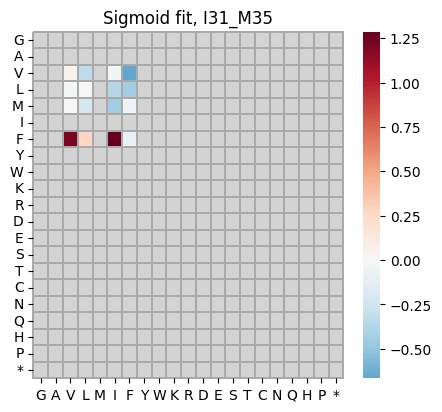

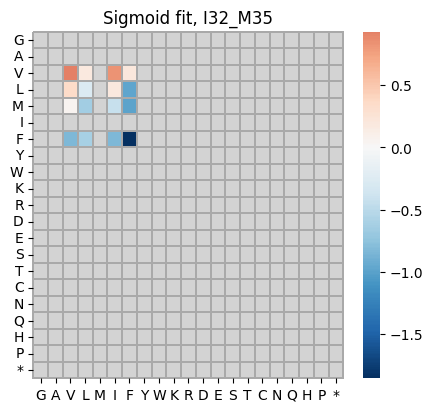

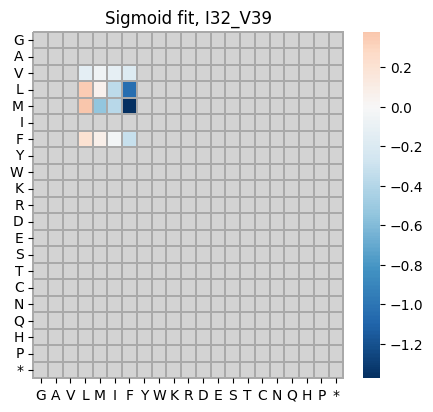

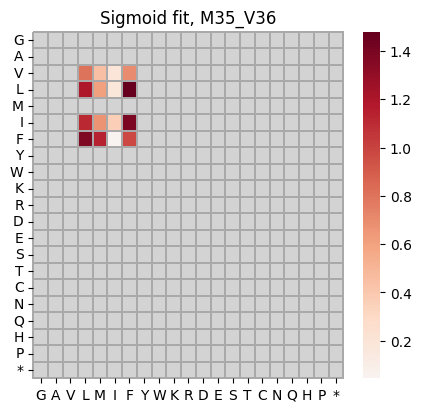

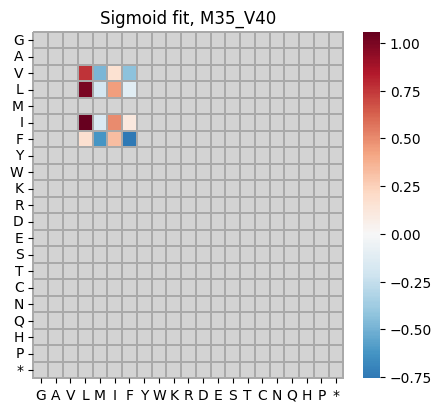

In [191]:
for mut_combination in selected_high_inter_ids:
    
    fig = plt.figure(figsize=(5, 4.5))
    
    sns.heatmap(ddE_df_2nd_order_terms['all'][mut_combination], cmap=cmap_ddE_2nd_order_terms, 
                #vmin = ddE_df_mean_kcalmol.fillna(0, inplace=False).to_numpy().min(),
                #vmax = 5,
                mask=masks_ddE_2nd_order_terms['all'][mut_combination],
                linewidths=0.002814, linecolor='darkgrey', clip_on=False,
                center=0)
    
    plt.yticks(rotation=0, 
               #fontsize=2
              )
    #plt.xticks(fontsize=2) 
    
    plt.title('Sigmoid fit, ' +  mut_combination)

    #plt.savefig('./figures/20240206_mochi_ddEa_heatmap_all_3_doubles_1st_ord_terms_allowed_Sigmoid.pdf',
    #           bbox_inches = 'tight')

In [256]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

In [257]:
ddE_df_2nd_order_terms['used_in_phi_analysis_2beg']['F19_G33']

G    A    V    L    M    I    F    Y    W    K    R    D    E    S    T  \
G  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
A  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
V  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
L  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
M  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
I  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
F  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
Y  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
W  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
K  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
R  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
D  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
E  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
S  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
T  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
C  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
N  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
Q  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
H  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
P  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
*  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

     C    N    Q    H    P    *  
G  NaN  NaN  NaN  NaN  NaN  NaN  
A  NaN  NaN  NaN  NaN  NaN  NaN  
V  NaN  NaN  NaN  NaN  NaN  NaN  
L  NaN  NaN  NaN  NaN  NaN  NaN  
M  NaN  NaN  NaN  NaN  NaN  NaN  
I  NaN  NaN  NaN  NaN  NaN  NaN  
F  NaN  NaN  NaN  NaN  NaN  NaN  
Y  NaN  NaN  NaN  NaN  NaN  NaN  
W  NaN  NaN  NaN  NaN  NaN  NaN  
K  NaN  NaN  NaN  NaN  NaN  NaN  
R  NaN  NaN  NaN  NaN  NaN  NaN  
D  NaN  NaN  NaN  NaN  NaN  NaN  
E  NaN  NaN  NaN  NaN  NaN  NaN  
S  NaN  NaN  NaN  NaN  NaN  NaN  
T  NaN  NaN  NaN  NaN  NaN  NaN  
C  NaN  NaN  NaN  NaN  NaN  NaN  
N  NaN  NaN  NaN  NaN  NaN  NaN  
Q  NaN  NaN  NaN  NaN  NaN  NaN  
H  NaN  NaN  NaN  NaN  NaN  NaN  
P  NaN  NaN  NaN  NaN  NaN  NaN  
*  NaN  NaN  NaN  NaN  NaN  NaN

In [258]:
groups_interactions

['all']

In [259]:
mean_interaction_scores = {} # probably need to separate this for pos and neg interactions for each inter_group

values_2nd_order_terms = {}

for inter_group in groups_interactions:
    
    print(inter_group)
    
    values_2nd_order_terms[inter_group] = {}
    
    if inter_group in ['all', 'ddEa_sign_pos', 'ddEa_sign_neg', 
                       'synergistic_pos_ddEa','synergistic_neg_ddEa',
                       'compensatory_w_neg_dddEa', 'compensatory_w_pos_dddEa', 
                       'used_in_phi_analysis_2beg',
                         'used_in_phi_analysis_2mxu',
                         'used_in_phi_analysis_2nao',
                         'used_in_phi_analysis_5kk3',
                         'used_in_phi_analysis_5oqv',
                         'used_in_phi_analysis_7q4b',
                         'used_in_phi_analysis_7q4m',
                         'used_in_phi_analysis_8ezd',
                         'used_in_phi_analysis_8eze']:
        # in this case there will only be one mean_interaction_scores
        mean_interaction_scores[inter_group] = pd.DataFrame(columns = ['mean_ddEa'], index = not_empty_dfs_keys)
    else:
        # for all other groups, create separate tables for ddEa > 0 and < 0
        mean_interaction_scores[inter_group + '_pos_ddEa'] = pd.DataFrame(columns = ['mean_ddEa'], index = not_empty_dfs_keys)
        mean_interaction_scores[inter_group + '_neg_ddEa'] = pd.DataFrame(columns = ['mean_ddEa'], index = not_empty_dfs_keys)
    
    
    for mut_combination in not_empty_dfs_keys:

        # calculate number of non nan values to use as normalising factor
        values_all = ddE_df_2nd_order_terms['all'][mut_combination].to_numpy()
        values_all = [x for xs in values_all for x in xs]
        values_all = [elem for elem in values_all if str(elem) != 'nan']
        n_values_all = len(values_all)
        
        # get values of a particular group
        values = ddE_df_2nd_order_terms[inter_group][mut_combination].to_numpy()
        # flatten
        values = [x for xs in values for x in xs]
        # get rid of nans
        values = [elem for elem in values if str(elem) != 'nan']
        
        values_2nd_order_terms[inter_group][mut_combination] = values
                
        # normalisation depends on the group of interacting mut pairs
        if inter_group in ['all', 'used_in_phi_analysis_2beg',
                         'used_in_phi_analysis_2mxu',
                         'used_in_phi_analysis_2nao',
                         'used_in_phi_analysis_5kk3',
                         'used_in_phi_analysis_5oqv',
                         'used_in_phi_analysis_7q4b',
                         'used_in_phi_analysis_7q4m',
                         'used_in_phi_analysis_8ezd',
                         'used_in_phi_analysis_8eze']:
            # consider by module / strength of interaction when looking at 'all' or phi analysis related groups
            values = [abs(elem) for elem in values]
            
            if len(values) > 0:
                mean_interaction_scores[inter_group].loc[mut_combination,'mean_ddEa'] = np.sum(values) / n_values_all # here it's equivalent to doing np.mean(values)
            else:
                mean_interaction_scores[inter_group].loc[mut_combination,'mean_ddEa'] = np.nan
            
        elif inter_group in ['ddEa_sign_pos', 'ddEa_sign_neg', 'synergistic_pos_ddEa', 'synergistic_neg_ddEa',
                             'compensatory_w_neg_dddEa', 'compensatory_w_pos_dddEa']:
            # here all values of a given inter_group should have the same sign
            if len(values) > 0:
                mean_interaction_scores[inter_group].loc[mut_combination,'mean_ddEa'] = np.sum(values) / n_values_all
            else:
                mean_interaction_scores[inter_group].loc[mut_combination,'mean_ddEa'] = np.nan
            
        else:
            # separate here by sign of ddEa
            values_pos = [elem for elem in values if elem > 0]
            values_neg = [elem for elem in values if elem < 0]
            
            if len(values_pos) > 0:
                mean_interaction_scores[inter_group + '_pos_ddEa'].loc[mut_combination,'mean_ddEa'] = np.sum(values_pos) / n_values_all
            else:
                mean_interaction_scores[inter_group + '_pos_ddEa'].loc[mut_combination,'mean_ddEa'] = np.nan
            
            if len(values_neg) > 0:
                mean_interaction_scores[inter_group + '_neg_ddEa'].loc[mut_combination,'mean_ddEa'] = np.sum(values_neg) / n_values_all
            else:
                mean_interaction_scores[inter_group + '_neg_ddEa'].loc[mut_combination,'mean_ddEa'] = np.nan
            
            

all


In [260]:
len(not_empty_dfs_keys)

40

In [261]:
# how many interactions in total?

# was 4511 with all DTS datasets

# get values of a particular group
values = values_2nd_order_terms['all'].values()
# flatten
values = [x for xs in values for x in xs]
len(values)

640

In [263]:
list(mean_interaction_scores.keys())

['all']

In [264]:
# full list of each interactions group
groups_interactions_exhaustive = list(mean_interaction_scores.keys())

In [265]:
Ab_positions = [str(i+1) for i in range(len(AB_WT))]

interaction_scores_positions = {}

for inter_group in groups_interactions_exhaustive:

    interaction_scores_positions[inter_group] = {}

    for pos_i in Ab_positions:
        for pos_j in Ab_positions:
            interaction_scores_positions[inter_group][pos_i + '_' + pos_j] = []

In [266]:
for inter_group in groups_interactions_exhaustive:
    for mut_combination in not_empty_dfs_keys:
    
        pos_i = mut_combination.split('_')[0][1:]
        pos_j = mut_combination.split('_')[1][1:]

        interaction_scores_positions[inter_group][pos_i + '_' + pos_j].append(mean_interaction_scores[inter_group].loc[mut_combination,
                                                                                                                       'mean_ddEa'
                                                                                                                      #'sum_ddEa'
                                                                                                                      ])

In [267]:
interacting_position_combinations = {}

for inter_group in groups_interactions_exhaustive: 
    interacting_position_combinations[inter_group] = []
    
    for key in list(interaction_scores_positions[inter_group].keys()):
        if len(interaction_scores_positions[inter_group][key]) > 0:
            interacting_position_combinations[inter_group].append(key)

In [268]:
len(interacting_position_combinations['all'])

40

In [270]:
dfs_to_plot_interactions = {}

for inter_group in groups_interactions_exhaustive:
    dfs_to_plot_interactions[inter_group] = pd.DataFrame(index = Ab_positions[::-1], columns = Ab_positions)

In [271]:
for inter_group in groups_interactions_exhaustive:
    for pos_i in Ab_positions:
        for pos_j in Ab_positions:

            curr_position_combination = pos_i + '_' + pos_j

            if curr_position_combination in interacting_position_combinations[inter_group]:
                dfs_to_plot_interactions[inter_group].loc[pos_i, pos_j] = interaction_scores_positions[inter_group][curr_position_combination][0]



In [272]:
for inter_group in groups_interactions_exhaustive:
    for col in list(dfs_to_plot_interactions[inter_group].columns):
        dfs_to_plot_interactions[inter_group][col] = dfs_to_plot_interactions[inter_group][col].astype(float)

In [273]:
cmap_universal = matplotlib.colormaps.get('RdBu_r')
cmap_universal.set_bad("lightgrey")

masks_interactions = {}

for inter_group in groups_interactions_exhaustive:
    masks_interactions[inter_group] = dfs_to_plot_interactions[inter_group].isnull()


In [274]:
groups_interactions_exhaustive

['all']

In [275]:
weights_Nucleation.columns

Index(['id_ref', 'Pos', 'Pos_ref', 'fold_1', 'fold_2', 'fold_3', 'fold_4',
       'fold_5', 'fold_6', 'fold_7', 'fold_8', 'fold_9', 'fold_10', 'n',
       'mean', 'std', 'ci95', 'trait_name', 'mean_kcal/mol', 'std_kcal/mol',
       'ci95_kcal/mol', 'ddEa', 'ddEa_recentered', 'std_scaled',
       'conservative_score', 'all', 'conservative_both', 'ddEa_sign_pos',
       'ddEa_sign_neg', 'compensatory_w_neg_dddEa', 'compensatory_w_pos_dddEa',
       'magnitude_epistasis_pos_ddEa', 'magnitude_epistasis_neg_ddEa',
       'synergistic_pos_ddEa', 'synergistic_neg_ddEa'],
      dtype='object')

In [276]:
# check if there are matrices with all values = 0
for inter_group in groups_interactions_exhaustive:
    print(inter_group)
    # get values of a particular group
    values = dfs_to_plot_interactions[inter_group].to_numpy()
    # flatten
    values = [x for xs in values for x in xs]
    # get rid of nans
    values = [elem for elem in values if str(elem) != 'nan']
    
    values_nonzero = [elem for elem in values if elem != 0]
    
    print(len(values_nonzero))
    
    if len(values_nonzero) == 0:
        print('in group ' + inter_group + ' matrix all values are 0 \n')

all
40


In [277]:
# save results to read in elsewhere

for inter_group in groups_interactions_exhaustive:
    dfs_to_plot_interactions[inter_group].to_csv('./files/20240722_dfs_to_plot_interactions_' + inter_group + '_DTS01_DTS05.csv')
    

In [278]:
# save results to read in elsewhere

for inter_group in groups_interactions_exhaustive:
    mean_interaction_scores[inter_group].to_csv('./files/20240722_mean_interaction_scores_' + inter_group + '_DTS01_DTS05.csv')
    

In [279]:
max(values_all)

0.5786259847243573

Text(0.5, 1.0, 'Sigmoid fit, l2=1e-05')

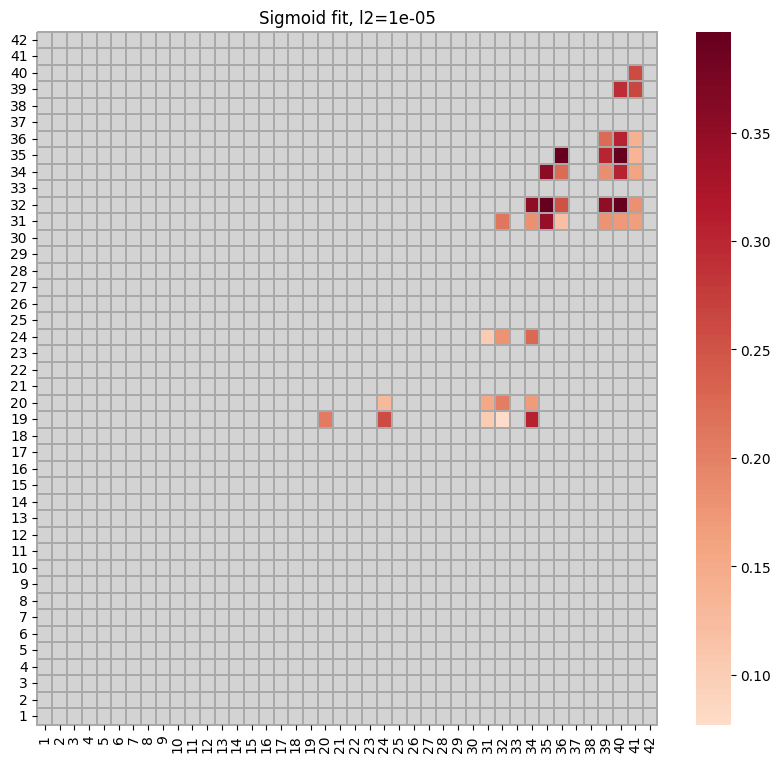

In [140]:
# all is by abs value (strength of interaction)
inter_group = 'all'
fig = plt.figure(figsize=(10, 9))
sns.heatmap(dfs_to_plot_interactions[inter_group], cmap=cmap_universal, 
            #vmin = min(weights_Nucleation_2nd_order['ddEa_recentered']),
            vmax = max(values_all), #max(weights_Nucleation_2nd_order['ddEa_recentered']),
            mask=masks_interactions[inter_group],
            linewidths=0.002814, linecolor='darkgrey', clip_on=False,
            center=0)
plt.yticks(rotation=0) 
#plt.xticks(rotation=0) 
plt.title('Sigmoid fit, l2=1e-05')

#plt.savefig('./figures/20240206_mochi_ddEa_heatmap_all_3_doubles_1st_ord_terms_allowed_Sigmoid.pdf',
#           bbox_inches = 'tight')

Text(0.5, 1.0, 'Sigmoid fit, l2=1e-05')

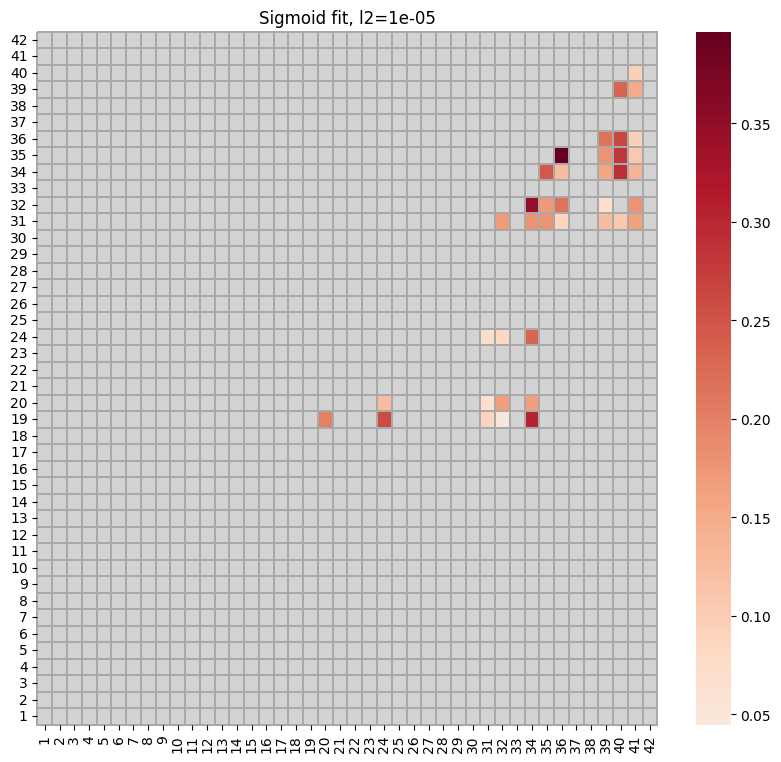

In [141]:
# all is by abs value (strength of interaction)
inter_group = 'ddEa_sign_pos'
fig = plt.figure(figsize=(10, 9))
sns.heatmap(dfs_to_plot_interactions[inter_group], cmap=cmap_universal, 
            #vmin = min(weights_Nucleation_2nd_order['ddEa_recentered']),
            vmax = max(values_all), #max(weights_Nucleation_2nd_order['ddEa_recentered']),
            mask=masks_interactions[inter_group],
            linewidths=0.002814, linecolor='darkgrey', clip_on=False,
            center=0)
plt.yticks(rotation=0) 
#plt.xticks(rotation=0) 
plt.title('Sigmoid fit, l2=1e-05')

#plt.savefig('./figures/20240206_mochi_ddEa_heatmap_all_3_doubles_1st_ord_terms_allowed_Sigmoid.pdf',
#           bbox_inches = 'tight')

Text(0.5, 1.0, 'Sigmoid fit, l2=1e-05')

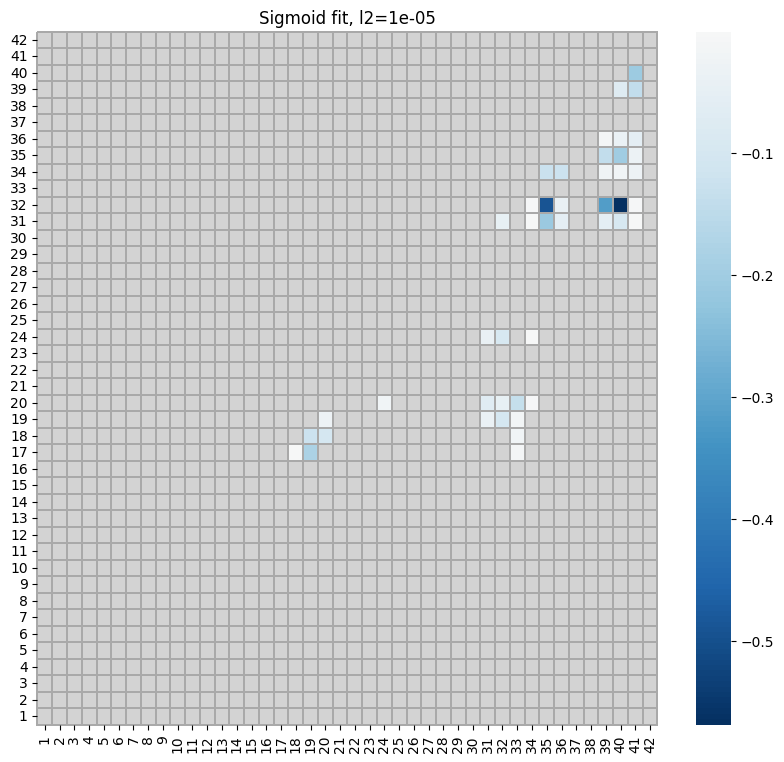

In [140]:
# all is by abs value (strength of interaction)
inter_group = 'ddEa_sign_neg'
fig = plt.figure(figsize=(10, 9))
sns.heatmap(dfs_to_plot_interactions[inter_group], cmap=cmap_universal, 
            #vmin = min(weights_Nucleation_2nd_order['ddEa_recentered']),
            #vmax = max(values_all), #max(weights_Nucleation_2nd_order['ddEa_recentered']),
            mask=masks_interactions[inter_group],
            linewidths=0.002814, linecolor='darkgrey', clip_on=False,
            center=0)
plt.yticks(rotation=0) 
#plt.xticks(rotation=0) 
plt.title('Sigmoid fit, l2=1e-05')

#plt.savefig('./figures/20240206_mochi_ddEa_heatmap_all_3_doubles_1st_ord_terms_allowed_Sigmoid.pdf',
#           bbox_inches = 'tight')

In [141]:
interaction_scores_positions.keys()

dict_keys(['all', 'conservative_both_pos_ddEa', 'conservative_both_neg_ddEa', 'mild_2nd_order_ddEa_effect_window_0.75_pos_ddEa', 'mild_2nd_order_ddEa_effect_window_0.75_neg_ddEa', 'mild_2nd_order_ddEa_effect_window_0.5_pos_ddEa', 'mild_2nd_order_ddEa_effect_window_0.5_neg_ddEa', 'mild_2nd_order_ddEa_effect_window_0.25_pos_ddEa', 'mild_2nd_order_ddEa_effect_window_0.25_neg_ddEa', 'mild_2nd_order_ddEa_effect_window_0.1_pos_ddEa', 'mild_2nd_order_ddEa_effect_window_0.1_neg_ddEa', 'mild_2nd_order_ddEa_effect_window_0.05_pos_ddEa', 'mild_2nd_order_ddEa_effect_window_0.05_neg_ddEa', 'mild_2nd_order_ddEa_effect_window_0.025_pos_ddEa', 'mild_2nd_order_ddEa_effect_window_0.025_neg_ddEa', 'conservative_both_and_mild_2nd_order_ddEa_effect_window_0.75_pos_ddEa', 'conservative_both_and_mild_2nd_order_ddEa_effect_window_0.75_neg_ddEa', 'conservative_both_and_mild_2nd_order_ddEa_effect_window_0.5_pos_ddEa', 'conservative_both_and_mild_2nd_order_ddEa_effect_window_0.5_neg_ddEa', 'conservative_both_and

________

Attempting arcplots - ignore for now

In [112]:
dfs_to_plot_interactions_arcplots = {}

for inter_group in groups_interactions_exhaustive:
    
    curr_dict = interaction_scores_positions[inter_group]
    dfs_to_plot_interactions_arcplots[inter_group] = pd.DataFrame(columns=['from','to','weights','position'], index = list(curr_dict.keys()) )
    
    for pos_pair,score in curr_dict.items():
        
        curr_from = pos_pair.split('_')[0]
        curr_to = pos_pair.split('_')[1]
        
        if len(score) > 0:
            curr_weight = score[0]
        
            if curr_weight > 0:
                curr_position = 0
            elif curr_weight < 0:
                curr_position = 1
        else:
            curr_weight = 0
            curr_position = 0 # ? should not be visibe bc weight will be 0
        
        dfs_to_plot_interactions_arcplots[inter_group].loc[pos_pair,'from'] = int(curr_from)
        dfs_to_plot_interactions_arcplots[inter_group].loc[pos_pair,'to'] = int(curr_to)
        dfs_to_plot_interactions_arcplots[inter_group].loc[pos_pair,'weights'] = float(curr_weight)*50
        dfs_to_plot_interactions_arcplots[inter_group].loc[pos_pair,'position'] = float(curr_position)
        

In [117]:
def createArcDiagram(df, node1, node2, weights=None, bg_color='white',
                     cmap='viris', title='My Diagram'):
    
    # get all the nodes
    nodes = df[node1].unique().tolist() + df[node2].unique().tolist()
    nodes = list(set(nodes))

    # create the diagram
    arcdiag = ArcDiagram(nodes, title)

    if not weights:
        df['weights'] = 0.1

    # connect the nodes
    for connection in df.iterrows():
        arcdiag.connect(
            connection[1][node1],
            connection[1][node2],
            linewidth=connection[1][weights]
        )

    # custom colors
    arcdiag.set_background_color(bg_color)
    arcdiag.set_color_map(cmap)
    
    # plot the diagram
    arcdiag.show_plot()

#createArcDiagram(
#    df,
#    node1='from',
#    node2='to',
#    weights='weights',
#    cmap='inferno'
#)

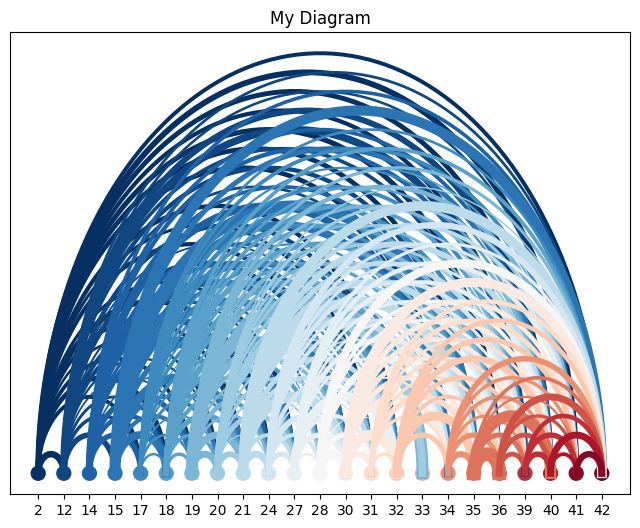

In [118]:
# in here all inter are by abs()
key = 'all'
createArcDiagram(
    dfs_to_plot_interactions_arcplots[key][dfs_to_plot_interactions_arcplots[key]['weights'] > 0],
    node1='from',
    node2='to',
    weights='weights',
    #positions='position',
    cmap='RdBu_r'
)

In [119]:
dfs_to_plot_interactions_arcplots['conservative_both_pos_ddEa'][dfs_to_plot_interactions_arcplots['conservative_both_pos_ddEa']['weights'] > 0]

from  to    weights position
2_12     2  12   3.962011      0.0
2_17     2  17    3.41033      0.0
2_18     2  18   4.110017      0.0
2_21     2  21   1.896744      0.0
2_24     2  24    3.26269      0.0
2_30     2  30   2.567073      0.0
2_31     2  31   0.594637      0.0
2_32     2  32   2.388268      0.0
2_34     2  34   1.596723      0.0
2_35     2  35    2.12287      0.0
2_36     2  36   3.457458      0.0
2_39     2  39   2.126298      0.0
2_40     2  40   3.383787      0.0
2_41     2  41   3.591076      0.0
2_42     2  42   2.347182      0.0
12_17   12  17   1.478296      0.0
12_18   12  18   2.303337      0.0
12_21   12  21    2.51537      0.0
12_24   12  24   3.746351      0.0
12_30   12  30   3.951304      0.0
12_31   12  31   0.666904      0.0
12_32   12  32   2.996581      0.0
12_34   12  34    2.57433      0.0
12_35   12  35   5.531304      0.0
12_36   12  36   2.595135      0.0
12_39   12  39     5.7911      0.0
12_40   12  40   5.694394      0.0
12_41   12  41   2.094477      0.0
12_42   12  42   2.220087      0.0
17_18   17  18   2.370836      0.0
17_21   17  21    1.13976      0.0
17_24   17  24   1.922887      0.0
17_28   17  28   1.522043      0.0
17_30   17  30   1.389398      0.0
17_31   17  31   1.265114      0.0
17_32   17  32   2.235279      0.0
17_34   17  34   1.796143      0.0
17_35   17  35   0.819078      0.0
17_36   17  36   2.978108      0.0
17_39   17  39   2.464093      0.0
17_40   17  40   1.238678      0.0
17_41   17  41   4.288736      0.0
17_42   17  42   1.807528      0.0
18_21   18  21   3.729705      0.0
18_24   18  24   3.196069      0.0
18_28   18  28   4.976973      0.0
18_30   18  30   4.582395      0.0
18_31   18  31   2.722377      0.0
18_32   18  32   2.591929      0.0
18_34   18  34   2.665264      0.0
18_35   18  35     3.9596      0.0
18_36   18  36    2.42695      0.0
18_39   18  39   2.067967      0.0
18_40   18  40   1.938384      0.0
18_41   18  41   1.224515      0.0
18_42   18  42   2.624917      0.0
21_24   21  24   3.284274      0.0
21_30   21  30   9.082056      0.0
21_31   21  31   1.598537      0.0
21_32   21  32    0.62805      0.0
21_34   21  34    3.92342      0.0
21_35   21  35  10.857301      0.0
21_36   21  36   3.321409      0.0
21_39   21  39   0.960627      0.0
21_40   21  40   2.647351      0.0
21_41   21  41   1.278359      0.0
21_42   21  42   8.882953      0.0
24_28   24  28   4.812244      0.0
24_30   24  30   5.549012      0.0
24_31   24  31   0.800658      0.0
24_32   24  32   4.246597      0.0
24_34   24  34   1.266538      0.0
24_35   24  35   3.907051      0.0
24_36   24  36   4.064778      0.0
24_39   24  39   2.961083      0.0
24_40   24  40    3.37695      0.0
24_41   24  41   3.343377      0.0
24_42   24  42   4.723847      0.0
28_30   28  30  10.538905      0.0
28_31   28  31   3.923124      0.0
28_32   28  32   0.424479      0.0
28_34   28  34   0.800945      0.0
28_35   28  35   7.827672      0.0
28_39   28  39   3.817172      0.0
28_40   28  40   6.199167      0.0
28_42   28  42   8.712948      0.0
30_31   30  31   1.552241      0.0
30_34   30  34   0.625856      0.0
30_35   30  35   0.928009      0.0
30_36   30  36   4.245446      0.0
30_39   30  39   2.856457      0.0
30_40   30  40   2.684463      0.0
30_41   30  41   0.764352      0.0
30_42   30  42   6.886157      0.0
31_32   31  32   4.447036      0.0
31_34   31  34   2.017878      0.0
31_35   31  35   0.898537      0.0
31_36   31  36   1.367951      0.0
31_39   31  39   2.434796      0.0
31_40   31  40   2.211509      0.0
31_41   31  41   5.133319      0.0
31_42   31  42   1.118494      0.0
32_34   32  34   2.723755      0.0
32_35   32  35   4.894908      0.0
32_36   32  36   1.840805      0.0
32_39   32  39   2.267001      0.0
32_40   32  40   0.377132      0.0
32_41   32  41   5.774286      0.0
32_42   32  42   0.593552      0.0
34_35   34  35   2.661134      0.0
34_36   34  36   2.337663      0.0
34_39   34  39   2.032981      0.0
34_40   34  40   2.018519      0.0
34_41   34  41  

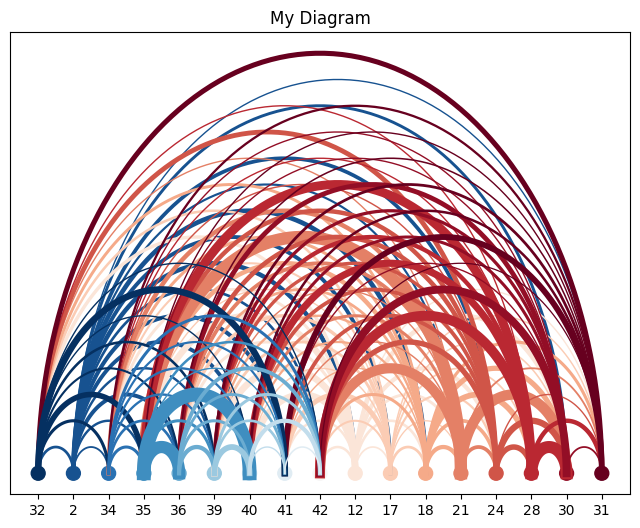

In [145]:
# in here all inter have ddEa > 0
key = 'conservative_both_pos_ddEa'
createArcDiagram(
    dfs_to_plot_interactions_arcplots[key][dfs_to_plot_interactions_arcplots[key]['weights'] > 0],
    node1='from',
    node2='to',
    weights='weights',
    #positions='position',
    cmap='RdBu_r'
)

In [131]:
np.unique(dfs_to_plot_interactions_arcplots['all']['position'])

array([0.0], dtype=object)

In [107]:
# trying to make arcplot


path = 'https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/connections.csv'
df = pd.read_csv(path)

In [109]:
df

from  to  weights  position
0      0   1        4         1
1      0   3        2         1
2      0   2        4         1
3      0   7        2         0
4      0   5        2         0
5      0   4        2         1
6      0   6        2         0
7      1   3        2         1
8      1   2        2         0
9      3   2        4         0
10     3   5        2         1
11     3   4        1         0
12     3   6        2         1
13     5   4        1         1
14     5   7        1         1
15     7   8        2         0
16     7   9        1         1
17     9   6        1         0
18     9   1        4         0
19     9   0        3         0
20     9   8        1         0
21     9   7        3         0
22     9  11        4         1
23     9  12        2         1
24     9  13        1         0
25     9  10        1         1
26    12   7        4         1
27    12  13        1         1
28    12  11        2         1
29    11  13        1         0
30    11  10        3         1

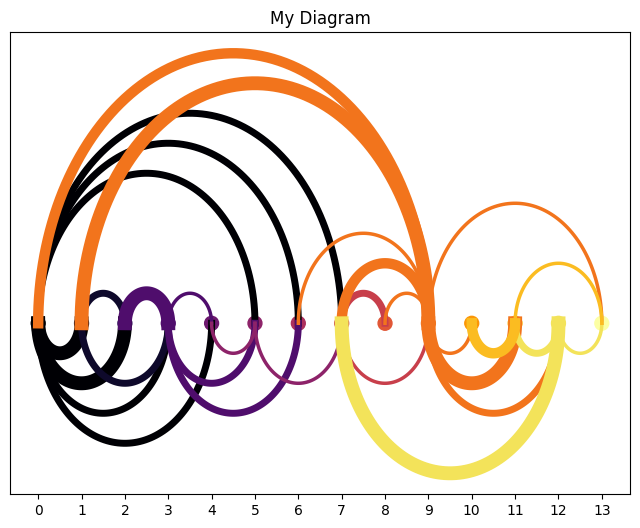

In [112]:
def createArcDiagram(data, node1, node2, weights=None, positions=None,
                     bg_color='white', cmap='viris', title='My Diagram'):

    df = data.copy()
    
    # get all the nodes
    nodes = df[node1].unique().tolist() + df[node2].unique().tolist()
    nodes = list(set(nodes))

    # create the diagram
    arcdiag = ArcDiagram(nodes, title)

    # get positions
    if positions:
        if df[positions].nunique() != 2:
            raise ValueError('positions must have 2 unique values')
        else:
            posMap = {
                df[positions].unique()[0]: 'below',
                df[positions].unique()[1]: 'above'
            }
            df['position'] = df[positions].map(posMap)
    else:
        df['position'] = 'above'

    if not weights:
        df['weights'] = 0.1

    # connect the nodes
    for connection in df.iterrows():
        arcdiag.connect(
            connection[1][node1],
            connection[1][node2],
            linewidth=connection[1][weights],
            arc_position=connection[1]['position']
        )

    # custom colors
    arcdiag.set_background_color(bg_color)
    arcdiag.set_color_map(cmap)
    
    # plot the diagram
    arcdiag.show_plot()

createArcDiagram(
    df,
    node1='from',
    node2='to',
    weights='weights',
    positions='position',
    cmap='inferno'
)

________

In [134]:
values_2nd_order_terms['conservative_both'].values()

dict_values([[0.26024632194743696, 0.24000194194743696, 0.09269556594743697, 0.12661665194743696, 0.27387374194743697, 0.24063659194743697, 0.09375433794743696, 0.24159589194743697, 0.20775492194743697, 0.09508990894743696, 0.17864558194743696, 0.16781446194743696], [0.10934454594743696, -0.02652189805256304, 0.07527084394743697, 0.30796167194743695, 0.23357909194743695, 0.29147946194743696, 0.09076920594743697, 0.12252083794743696, 0.274838041947437, 0.043503047947436965, 0.10188151594743697, 0.258636491947437], [0.37270913194743693, 0.28509475194743694, 0.18634369194743697, 0.21749892194743697, 0.10547602594743696, 0.21828648194743697, 0.07717181894743697, 0.09674613994743697, 0.20730721194743695, 0.057563108947436964, 0.19241392194743695, 0.28499823194743695], [], [], [0.002125821947436962, 0.516685761947437, 0.13882958194743697, 0.06427218444743696, 0.06714137794743696, 0.21203616194743696, -0.04587466805256303, -0.021001288052563044, 0.07055465294743696, 0.31964759194743697, 0.010

Text(0.5, 1.0, 'Sigmoid fit, l2=1e-05')

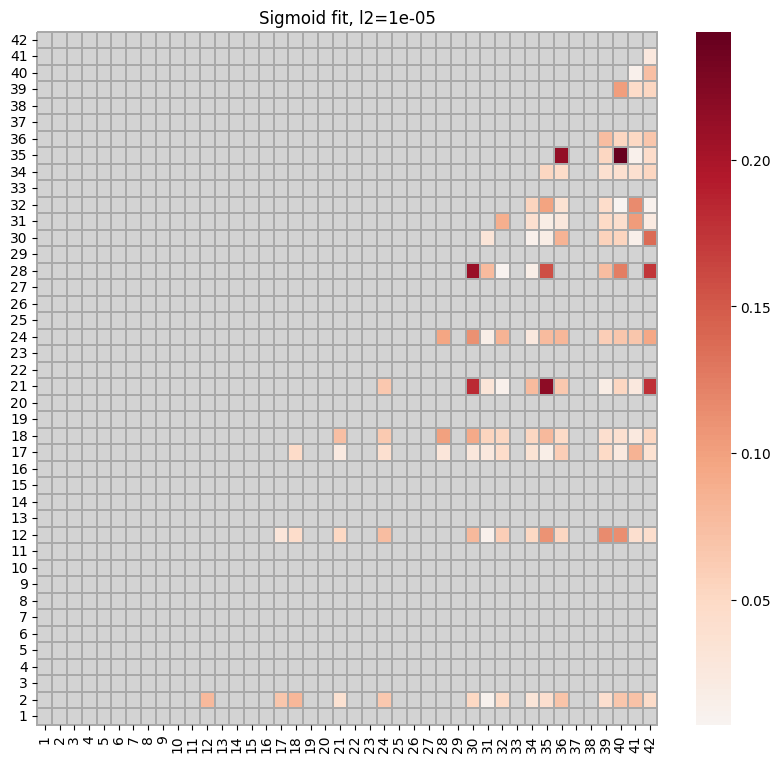

In [136]:
inter_group = 'conservative_both_pos_ddEa'
fig = plt.figure(figsize=(10, 9))
sns.heatmap(dfs_to_plot_interactions[inter_group], cmap=cmap_universal, 
            #vmin = min(weights_Nucleation_2nd_order['ddEa_recentered']),
            #vmax = max(weights_Nucleation_2nd_order['ddEa_recentered']),
            mask=masks_interactions[inter_group],
            linewidths=0.002814, linecolor='darkgrey', clip_on=False,
            center=0)
plt.yticks(rotation=0) 
#plt.xticks(rotation=0) 
plt.title('Sigmoid fit, l2=1e-05')

#plt.savefig('./figures/20240206_mochi_ddEa_heatmap_all_3_doubles_1st_ord_terms_allowed_Sigmoid.pdf',
#           bbox_inches = 'tight')

Text(0.5, 1.0, 'Sigmoid fit, l2=1e-05')

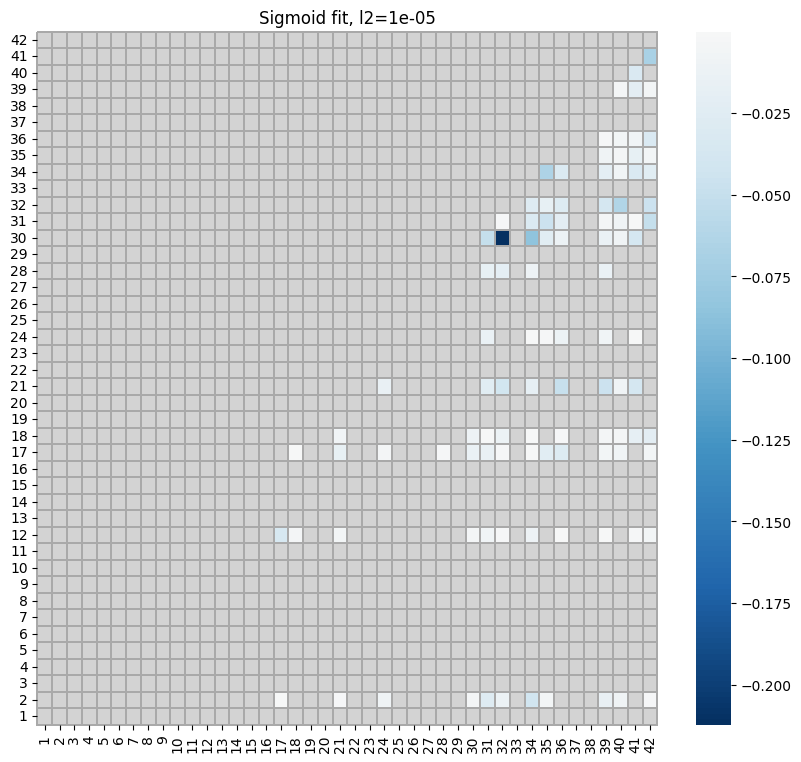

In [137]:
inter_group = 'conservative_both_neg_ddEa'
fig = plt.figure(figsize=(10, 9))
sns.heatmap(dfs_to_plot_interactions[inter_group], cmap=cmap_universal, 
            #vmin = min(weights_Nucleation_2nd_order['ddEa_recentered']),
            #vmax = max(weights_Nucleation_2nd_order['ddEa_recentered']),
            mask=masks_interactions[inter_group],
            linewidths=0.002814, linecolor='darkgrey', clip_on=False,
            center=0)
plt.yticks(rotation=0) 
#plt.xticks(rotation=0) 
plt.title('Sigmoid fit, l2=1e-05')

#plt.savefig('./figures/20240206_mochi_ddEa_heatmap_all_3_doubles_1st_ord_terms_allowed_Sigmoid.pdf',
#           bbox_inches = 'tight')

Text(0.5, 1.0, 'Sigmoid fit, l2=1e-05')

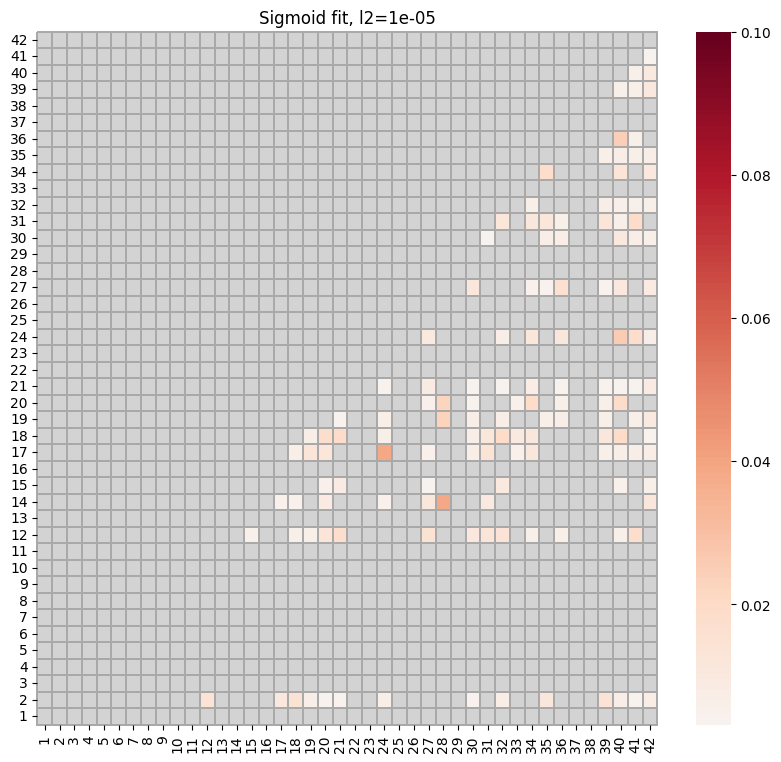

In [138]:
# most stringent mild filters
inter_group = 'mild_2nd_order_ddEa_effect_window_0.025_pos_ddEa'
fig = plt.figure(figsize=(10, 9))


sns.heatmap(dfs_to_plot_interactions[inter_group], cmap=cmap_universal, 
            #vmin = min(weights_Nucleation_2nd_order['ddEa_recentered']),
            vmax = 0.1, #max(weights_Nucleation_2nd_order['ddEa_recentered']),
            mask=masks_interactions[inter_group],
            linewidths=0.002814, linecolor='darkgrey', clip_on=False,
            center=0)
plt.yticks(rotation=0) 
#plt.xticks(rotation=0) 
plt.title('Sigmoid fit, l2=1e-05')

#plt.savefig('./figures/20240206_mochi_ddEa_heatmap_all_3_doubles_1st_ord_terms_allowed_Sigmoid.pdf',
#           bbox_inches = 'tight')

Text(0.5, 1.0, 'Sigmoid fit, l2=1e-05')

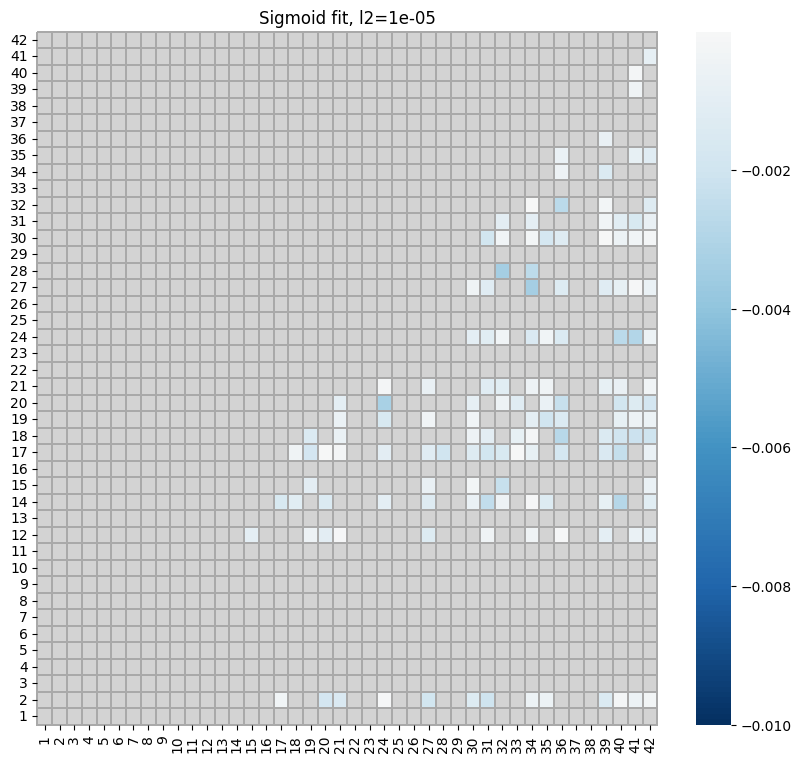

In [139]:
# most stringent mild filters
inter_group = 'mild_2nd_order_ddEa_effect_window_0.25_neg_ddEa'
fig = plt.figure(figsize=(10, 9))
sns.heatmap(dfs_to_plot_interactions[inter_group], cmap=cmap_universal, 
            vmin = -0.01, #min(weights_Nucleation_2nd_order['ddEa_recentered']),
            #vmax = max(weights_Nucleation_2nd_order['ddEa_recentered']),
            mask=masks_interactions[inter_group],
            linewidths=0.002814, linecolor='darkgrey', clip_on=False,
            center=0)
plt.yticks(rotation=0) 
#plt.xticks(rotation=0) 
plt.title('Sigmoid fit, l2=1e-05')

#plt.savefig('./figures/20240206_mochi_ddEa_heatmap_all_3_doubles_1st_ord_terms_allowed_Sigmoid.pdf',
#           bbox_inches = 'tight')

In [141]:
# get values of a particular group
values_compensatory_w_pos_dddEa = dfs_to_plot_interactions['compensatory_w_pos_dddEa'].to_numpy()
# flatten
values_compensatory_w_pos_dddEa = [x for xs in values_compensatory_w_pos_dddEa for x in xs]
# get rid of nans
values_compensatory_w_pos_dddEa = [elem for elem in values_compensatory_w_pos_dddEa if str(elem) != 'nan']

max(values_compensatory_w_pos_dddEa)

0.20212307083557773

Text(0.5, 1.0, 'Sigmoid fit, l2=1e-05')

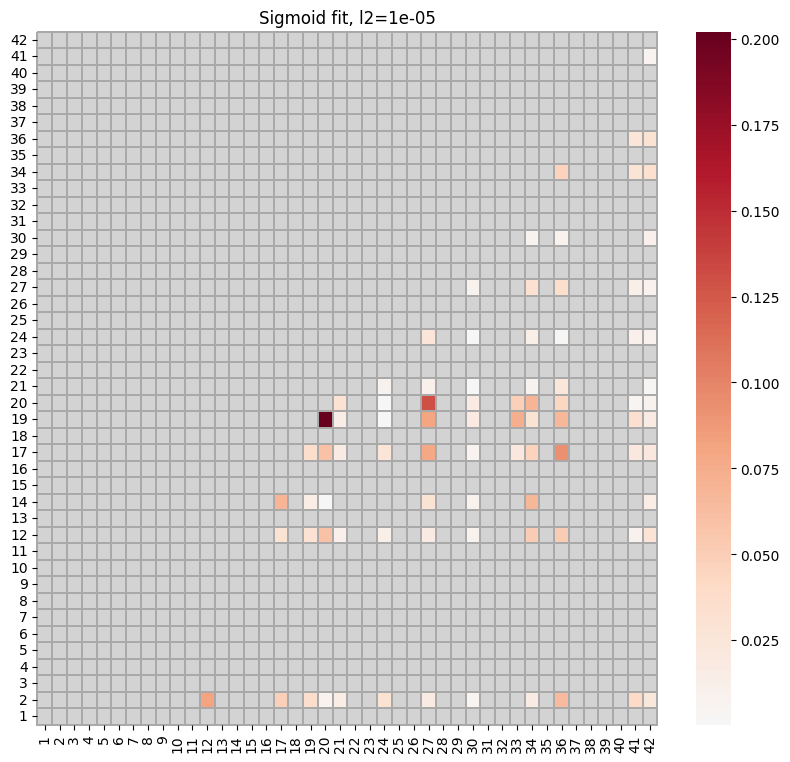

In [142]:
inter_group = 'compensatory_w_pos_dddEa'
fig = plt.figure(figsize=(10, 9))
sns.heatmap(dfs_to_plot_interactions[inter_group], cmap=cmap_universal, 
            #vmin = min(weights_Nucleation_2nd_order['ddEa_recentered']),
            vmax = max(values_compensatory_w_pos_dddEa), #max(weights_Nucleation_2nd_order['ddEa_recentered']),
            mask=masks_interactions[inter_group],
            linewidths=0.002814, linecolor='darkgrey', clip_on=False,
            center=0)
plt.yticks(rotation=0) 
#plt.xticks(rotation=0) 
plt.title('Sigmoid fit, l2=1e-05')

#plt.savefig('./figures/20240206_mochi_ddEa_heatmap_all_3_doubles_1st_ord_terms_allowed_Sigmoid.pdf',
#           bbox_inches = 'tight')

In [143]:
# get values of a particular group
compensatory_w_neg_dddEa_values = dfs_to_plot_interactions['compensatory_w_neg_dddEa'].to_numpy()
# flatten
compensatory_w_neg_dddEa_values = [x for xs in compensatory_w_neg_dddEa_values for x in xs]
# get rid of nans
compensatory_w_neg_dddEa_values = [elem for elem in compensatory_w_neg_dddEa_values if str(elem) != 'nan']

min(compensatory_w_neg_dddEa_values)

-0.25806942002815875

Text(0.5, 1.0, 'Sigmoid fit, l2=1e-05')

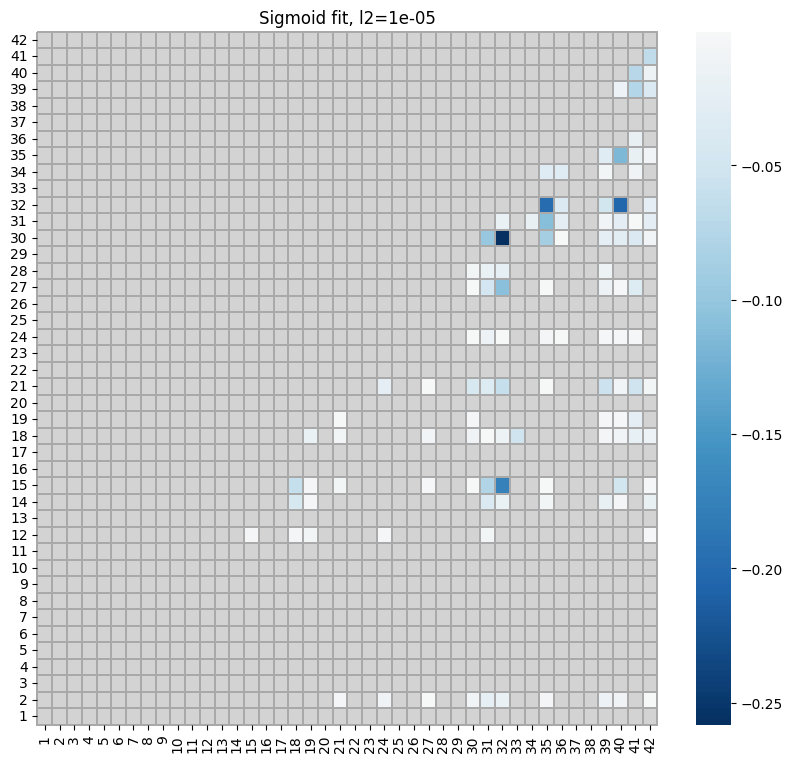

In [144]:
inter_group = 'compensatory_w_neg_dddEa'
fig = plt.figure(figsize=(10, 9))
sns.heatmap(dfs_to_plot_interactions[inter_group], cmap=cmap_universal, 
            vmin = min(compensatory_w_neg_dddEa_values), #min(weights_Nucleation_2nd_order['ddEa_recentered']),
            #vmax = max(weights_Nucleation_2nd_order['ddEa_recentered']),
            mask=masks_interactions[inter_group],
            linewidths=0.002814, linecolor='darkgrey', clip_on=False,
            center=0)
plt.yticks(rotation=0) 
#plt.xticks(rotation=0) 
plt.title('Sigmoid fit, l2=1e-05')

#plt.savefig('./figures/20240206_mochi_ddEa_heatmap_all_3_doubles_1st_ord_terms_allowed_Sigmoid.pdf',
#           bbox_inches = 'tight')

## Looking at compensatory interaction with positive or negative dddEa 2nd order terms

In [145]:
interaction_scores_positions_dfs = {}

for inter_group in groups_interactions_exhaustive:
    interaction_scores_positions_dfs[inter_group] = pd.DataFrame(index = interacting_position_combinations[inter_group], columns = ['abs_inter_score',
                                                                                                    'distance_aa_positions'])

In [146]:
interaction_scores_positions['compensatory_w_neg_dddEa']['2_12']

[nan]

In [147]:
for inter_group in groups_interactions_exhaustive:
    for positions_combination in list(interaction_scores_positions_dfs[inter_group].index):
        
        interaction_scores_positions_dfs[inter_group].loc[positions_combination,'abs_inter_score'] = abs(interaction_scores_positions[inter_group][positions_combination][0])

        curr_pos_i = int(positions_combination.split('_')[0])
        curr_pos_j = int(positions_combination.split('_')[1])

        interaction_scores_positions_dfs[inter_group].loc[positions_combination,'distance_aa_positions'] = abs(curr_pos_j - curr_pos_i)


In [148]:
interaction_scores_positions_dfs['compensatory_w_neg_dddEa']

abs_inter_score distance_aa_positions
2_12              NaN                    10
2_17              NaN                    15
2_18              NaN                    16
2_19              NaN                    17
2_20              NaN                    18
...               ...                   ...
39_41        0.075221                     2
39_42          0.0372                     3
40_41        0.071959                     1
40_42        0.012559                     2
41_42        0.066176                     1

[217 rows x 2 columns]

In [149]:
interaction_scores_positions_dfs['compensatory_w_pos_dddEa']

abs_inter_score distance_aa_positions
2_12         0.081065                    10
2_17         0.048359                    15
2_18              NaN                    16
2_19         0.036576                    17
2_20         0.005472                    18
...               ...                   ...
39_41             NaN                     2
39_42             NaN                     3
40_41             NaN                     1
40_42             NaN                     2
41_42        0.006628                     1

[217 rows x 2 columns]

In [150]:
# drop rows that have 0 in abs_inter_score

for inter_group in groups_interactions_exhaustive:
    interaction_scores_positions_dfs[inter_group] = interaction_scores_positions_dfs[inter_group][interaction_scores_positions_dfs[inter_group]['abs_inter_score'] != 0].copy()

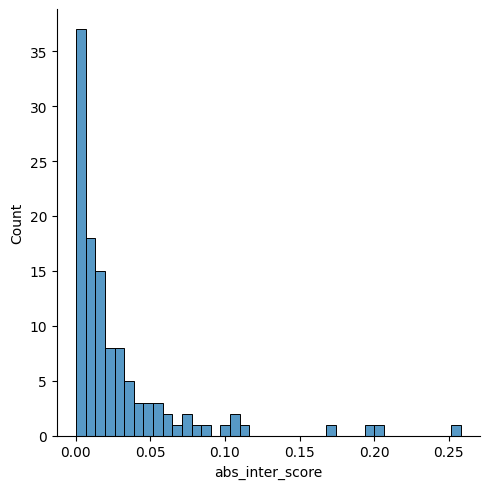

In [151]:
sns.displot(interaction_scores_positions_dfs['compensatory_w_neg_dddEa']['abs_inter_score'], bins=40)

In [152]:
interaction_scores_positions_dfs['compensatory_w_neg_dddEa'].sort_values('abs_inter_score', ascending=False)[:20]

abs_inter_score distance_aa_positions
30_32        0.258069                     2
32_40        0.204875                     8
32_35        0.199431                     3
15_32        0.173962                    17
35_40        0.115241                     5
31_35        0.109659                     4
27_32        0.108907                     5
30_31         0.09775                     1
30_35           0.087                     5
15_31        0.078681                    16
39_41        0.075221                     2
40_41        0.071959                     1
41_42        0.066176                     1
15_18        0.061234                     3
21_32        0.061042                    11
21_39        0.056209                    18
21_41        0.054145                    20
18_33        0.053267                    15
15_40        0.049647                    25
32_39        0.049202                     7

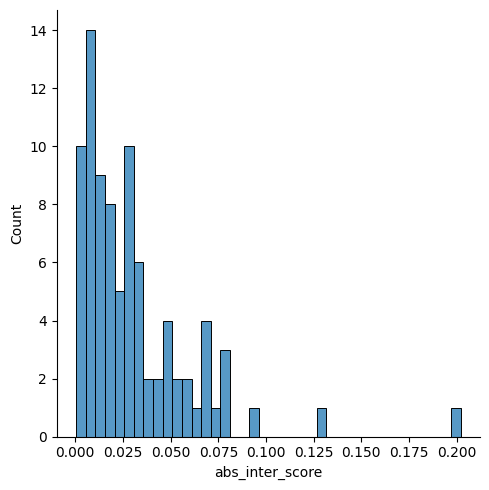

In [153]:
sns.displot(interaction_scores_positions_dfs['compensatory_w_pos_dddEa']['abs_inter_score'], bins=40)

In [154]:
interaction_scores_positions_dfs['compensatory_w_pos_dddEa'].sort_values('abs_inter_score', ascending=False)[:20]

abs_inter_score distance_aa_positions
19_20        0.202123                     1
20_27        0.130131                     7
17_36        0.092987                    19
2_12         0.081065                    10
19_27        0.079933                     8
17_27        0.078699                    10
19_33        0.074014                    14
20_34        0.068819                    14
14_17        0.068505                     3
14_34         0.06798                    20
19_36        0.067394                    17
2_36         0.063627                    34
17_20        0.060075                     3
12_20         0.05946                     8
12_36        0.051903                    24
12_34        0.051487                    22
2_17         0.048359                    15
20_33         0.04784                    13
17_34         0.04752                    17
34_36        0.046753                     2

In [160]:
interaction_scores_positions_dfs['compensatory_w_neg_dddEa']

abs_inter_score distance_aa_positions
2_12              NaN                    10
2_17              NaN                    15
2_18              NaN                    16
2_19              NaN                    17
2_20              NaN                    18
...               ...                   ...
39_41        0.075221                     2
39_42          0.0372                     3
40_41        0.071959                     1
40_42        0.012559                     2
41_42        0.066176                     1

[217 rows x 2 columns]

In [161]:
interaction_scores_positions_dfs['compensatory_w_neg_dddEa'].dropna()

abs_inter_score distance_aa_positions
2_21         0.004851                    19
2_24         0.011487                    22
2_27         0.001245                    25
2_30         0.010237                    28
2_31         0.024318                    29
...               ...                   ...
39_41        0.075221                     2
39_42          0.0372                     3
40_41        0.071959                     1
40_42        0.012559                     2
41_42        0.066176                     1

[115 rows x 2 columns]

In [164]:
# above 95th quantiles of abs(inter_score) in each case
top_interactors = {}

quantile_threshold = 0.90

for inter_group in groups_interactions_exhaustive:
    print(inter_group)
    if len(interaction_scores_positions_dfs[inter_group].dropna()) > 0:
        curr_quantile = np.quantile(interaction_scores_positions_dfs[inter_group].dropna()['abs_inter_score'], quantile_threshold)
        print(curr_quantile)
        top_interactors[inter_group] = interaction_scores_positions_dfs[inter_group][interaction_scores_positions_dfs[inter_group]['abs_inter_score'] > curr_quantile]

all
0.23497050147408466
conservative_both_pos_ddEa
0.11127099512409044
conservative_both_neg_ddEa
0.044463807349605956
mild_2nd_order_ddEa_effect_window_0.75_pos_ddEa
0.17333326904150734
mild_2nd_order_ddEa_effect_window_0.75_neg_ddEa
0.05017278118286818
mild_2nd_order_ddEa_effect_window_0.5_pos_ddEa
0.14217140501181422
mild_2nd_order_ddEa_effect_window_0.5_neg_ddEa
0.02447180403682203
mild_2nd_order_ddEa_effect_window_0.25_pos_ddEa
0.08592795512011292
mild_2nd_order_ddEa_effect_window_0.25_neg_ddEa
0.0020419332503661476
mild_2nd_order_ddEa_effect_window_0.1_pos_ddEa
0.0473883440771848
mild_2nd_order_ddEa_effect_window_0.1_neg_ddEa
mild_2nd_order_ddEa_effect_window_0.05_pos_ddEa
0.0259349217290021
mild_2nd_order_ddEa_effect_window_0.05_neg_ddEa
mild_2nd_order_ddEa_effect_window_0.025_pos_ddEa
0.01820651599014443
mild_2nd_order_ddEa_effect_window_0.025_neg_ddEa
conservative_both_and_mild_2nd_order_ddEa_effect_window_0.75_pos_ddEa
0.0980121030335822
conservative_both_and_mild_2nd_order_d

In [165]:
top_interactors['compensatory_w_neg_dddEa']

abs_inter_score distance_aa_positions
15_31        0.078681                    16
15_32        0.173962                    17
27_32        0.108907                     5
30_31         0.09775                     1
30_32        0.258069                     2
30_35           0.087                     5
31_35        0.109659                     4
32_35        0.199431                     3
32_40        0.204875                     8
35_40        0.115241                     5
39_41        0.075221                     2
40_41        0.071959                     1

In [167]:
len(top_interactors['compensatory_w_neg_dddEa'])

12

In [168]:
top_interactors['compensatory_w_pos_dddEa']

abs_inter_score distance_aa_positions
2_12         0.081065                    10
14_17        0.068505                     3
17_27        0.078699                    10
17_36        0.092987                    19
19_20        0.202123                     1
19_27        0.079933                     8
19_33        0.074014                    14
20_27        0.130131                     7
20_34        0.068819                    14

In [169]:
len(top_interactors['compensatory_w_pos_dddEa'])

9

/tmp/ipykernel_374427/2662802336.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.annotate(txt, (x[i], y[i]), fontsize=10)


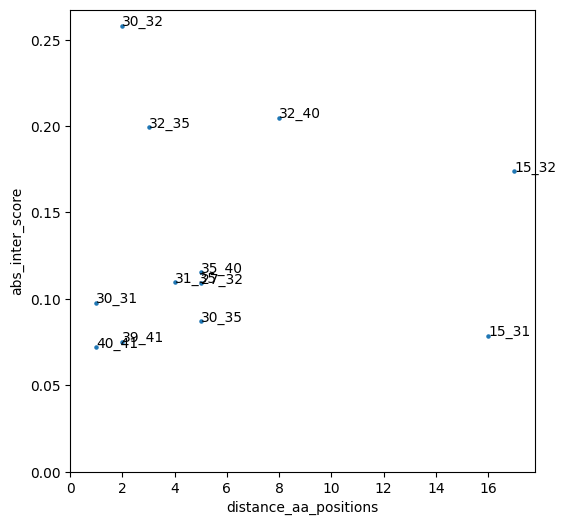

In [186]:
inter_group = 'compensatory_w_neg_dddEa'

fig, ax = plt.subplots(figsize=(6,6))

#inter_threshold = 0.2
#distance_thresold = 5

x = top_interactors[inter_group]['distance_aa_positions']
y = top_interactors[inter_group]['abs_inter_score']
labels = list(top_interactors[inter_group].index)

ax.scatter(x,y, s=5)

plt.xlabel('distance_aa_positions')
plt.ylabel('abs_inter_score')

plt.xlim(0)
plt.ylim(0)

#plt.axhline(inter_threshold, color='red')
#plt.axvline(distance_thresold, color='blue')


for i, txt in enumerate(list(top_interactors[inter_group].index)):
    ax.annotate(txt, (x[i], y[i]), fontsize=10)

/tmp/ipykernel_374427/1196371190.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.annotate(txt, (x[i], y[i]), fontsize=10)


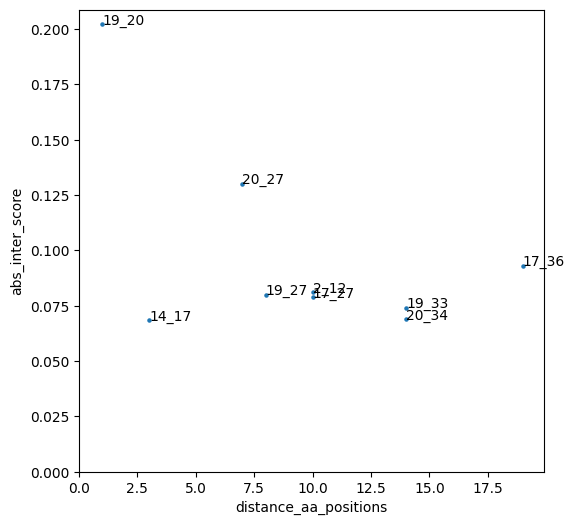

In [187]:
inter_group = 'compensatory_w_pos_dddEa'

fig, ax = plt.subplots(figsize=(6,6))

#inter_threshold = 0.2
#distance_thresold = 5

x = top_interactors[inter_group]['distance_aa_positions']
y = top_interactors[inter_group]['abs_inter_score']
labels = list(top_interactors[inter_group].index)

ax.scatter(x,y, s=5)

plt.xlabel('distance_aa_positions')
plt.ylabel('abs_inter_score')

plt.xlim(0)
plt.ylim(0)


#plt.axhline(inter_threshold, color='red')
#plt.axvline(distance_thresold, color='blue')


for i, txt in enumerate(list(top_interactors[inter_group].index)):
    ax.annotate(txt, (x[i], y[i]), fontsize=10)

## Look a bit closer at the top scorers here

In [193]:
top_interactors['compensatory_w_neg_dddEa'].index

Index(['15_31', '15_32', '27_32', '30_31', '30_32', '30_35', '31_35', '32_35',
       '32_40', '35_40', '39_41', '40_41'],
      dtype='object')

In [221]:
top_interactors['compensatory_w_neg_dddEa']

abs_inter_score distance_aa_positions
15_31        0.078681                    16
15_32        0.173962                    17
27_32        0.108907                     5
30_31         0.09775                     1
30_32        0.258069                     2
30_35           0.087                     5
31_35        0.109659                     4
32_35        0.199431                     3
32_40        0.204875                     8
35_40        0.115241                     5
39_41        0.075221                     2
40_41        0.071959                     1

In [192]:
top_interactors['compensatory_w_pos_dddEa'].index

Index(['2_12', '14_17', '17_27', '17_36', '19_20', '19_27', '19_33', '20_27',
       '20_34'],
      dtype='object')

In [197]:
AB_WT

'DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA'

In [203]:
AB_WT[15-1]

'Q'

In [196]:
ddE_df_2nd_order_terms['compensatory_w_pos_dddEa']

{'D1_D1':      G    A    V    L    M    I    F    Y    W    K  ...    D    E    S    T  \
 G  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
 A  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
 V  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
 L  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
 M  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
 I  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
 F  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
 Y  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
 W  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
 K  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
 R  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
 D  NaN  NaN  NaN  

In [217]:
ddE_df_2nd_order_terms['compensatory_w_neg_dddEa']['A30_I32']

G   A         V         L         M   I         F   Y   W   K  ...   D  \
G NaN NaN       NaN       NaN       NaN NaN       NaN NaN NaN NaN  ... NaN   
A NaN NaN       NaN       NaN       NaN NaN       NaN NaN NaN NaN  ... NaN   
V NaN NaN -0.184458 -0.619634 -0.986933 NaN       NaN NaN NaN NaN  ... NaN   
L NaN NaN -0.010569 -0.314515 -0.675106 NaN       NaN NaN NaN NaN  ... NaN   
M NaN NaN -0.320964 -0.492632 -0.550047 NaN -0.069342 NaN NaN NaN  ... NaN   
I NaN NaN -0.165722 -0.693392 -0.928592 NaN       NaN NaN NaN NaN  ... NaN   
F NaN NaN       NaN -0.348089 -0.865949 NaN       NaN NaN NaN NaN  ... NaN   
Y NaN NaN       NaN       NaN       NaN NaN       NaN NaN NaN NaN  ... NaN   
W NaN NaN       NaN       NaN       NaN NaN       NaN NaN NaN NaN  ... NaN   
K NaN NaN       NaN       NaN       NaN NaN       NaN NaN NaN NaN  ... NaN   
R NaN NaN       NaN       NaN       NaN NaN       NaN NaN NaN NaN  ... NaN   
D NaN NaN       NaN       NaN       NaN NaN       NaN NaN NaN NaN  ... NaN   
E NaN NaN       NaN       NaN       NaN NaN       NaN NaN NaN NaN  ... NaN   
S NaN NaN       NaN       NaN       NaN NaN       NaN NaN NaN NaN  ... NaN   
T NaN NaN       NaN       NaN       NaN NaN       NaN NaN NaN NaN  ... NaN   
C NaN NaN       NaN       NaN       NaN NaN       NaN NaN NaN NaN  ... NaN   
N NaN NaN       NaN       NaN       NaN NaN       NaN NaN NaN NaN  ... NaN   
Q NaN NaN       NaN       NaN       NaN NaN       NaN NaN NaN NaN  ... NaN   
H NaN NaN       NaN       NaN       NaN NaN       NaN NaN NaN NaN  ... NaN   
P NaN NaN       NaN       NaN       NaN NaN       NaN NaN NaN NaN  ... NaN   
* NaN NaN       NaN       NaN       NaN NaN       NaN NaN NaN NaN  ... NaN   

    E   S   T   C   N   Q   H   P   *  
G NaN NaN NaN NaN NaN NaN NaN NaN NaN  
A NaN NaN NaN NaN NaN NaN NaN NaN NaN  
V NaN NaN NaN NaN NaN NaN NaN NaN NaN  
L NaN NaN NaN NaN NaN NaN NaN NaN NaN  
M NaN NaN NaN NaN NaN NaN NaN NaN NaN  
I NaN NaN NaN NaN NaN NaN NaN NaN NaN  
F NaN NaN NaN NaN NaN NaN NaN NaN NaN  
Y NaN NaN NaN NaN NaN NaN NaN NaN NaN  
W NaN NaN NaN NaN NaN NaN NaN NaN NaN  
K NaN NaN NaN NaN NaN NaN NaN NaN NaN  
R NaN NaN NaN NaN NaN NaN NaN NaN NaN  
D NaN NaN NaN NaN NaN NaN NaN NaN NaN  
E NaN NaN NaN NaN NaN NaN NaN NaN NaN  
S NaN NaN NaN NaN NaN NaN NaN NaN NaN  
T NaN NaN NaN NaN NaN NaN NaN NaN NaN  
C NaN NaN NaN NaN NaN NaN NaN NaN NaN  
N NaN NaN NaN NaN NaN NaN NaN NaN NaN  
Q NaN NaN NaN NaN NaN NaN NaN NaN NaN  
H NaN NaN NaN NaN NaN NaN NaN NaN NaN  
P NaN NaN NaN NaN NaN NaN NaN NaN NaN  
* NaN NaN NaN NaN NaN NaN NaN NaN NaN  

[21 rows x 21 columns]

In [222]:
# sort tables of top interactions to plot by the abs value
top_interactors['compensatory_w_neg_dddEa'] = top_interactors['compensatory_w_neg_dddEa'].sort_values('abs_inter_score', ascending=False)
top_interactors['compensatory_w_pos_dddEa'] = top_interactors['compensatory_w_pos_dddEa'].sort_values('abs_inter_score', ascending=False)

In [239]:
top_interactors['compensatory_w_pos_dddEa']

abs_inter_score distance_aa_positions
19_20        0.202123                     1
20_27        0.130131                     7
17_36        0.092987                    19
2_12         0.081065                    10
19_27        0.079933                     8
17_27        0.078699                    10
19_33        0.074014                    14
20_34        0.068819                    14
14_17        0.068505                     3

In [240]:
top_interactors['compensatory_w_neg_dddEa']

abs_inter_score distance_aa_positions
30_32        0.258069                     2
32_40        0.204875                     8
32_35        0.199431                     3
15_32        0.173962                    17
35_40        0.115241                     5
31_35        0.109659                     4
27_32        0.108907                     5
30_31         0.09775                     1
30_35           0.087                     5
15_31        0.078681                    16
39_41        0.075221                     2
40_41        0.071959                     1

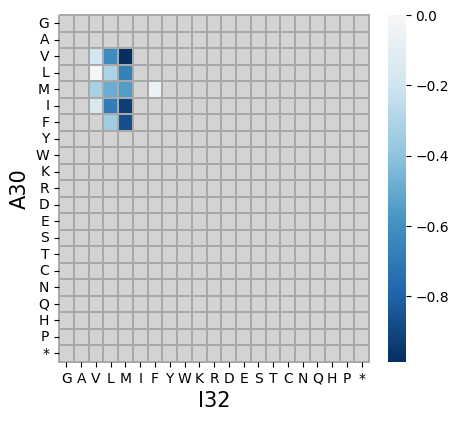

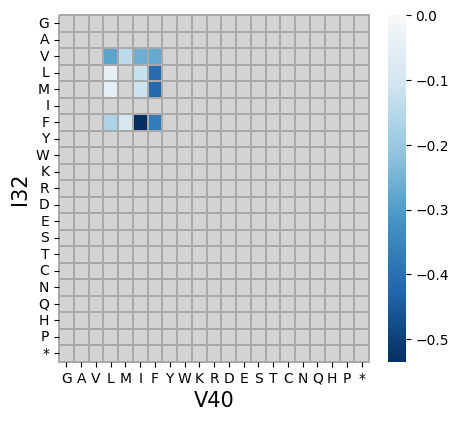

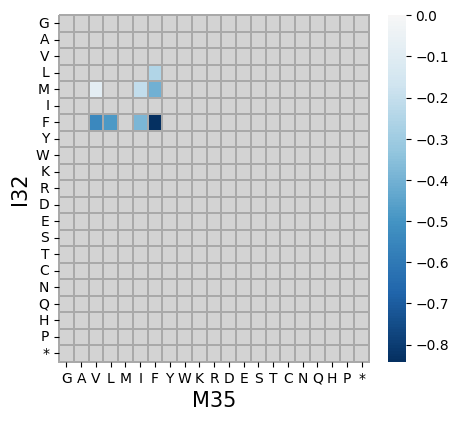

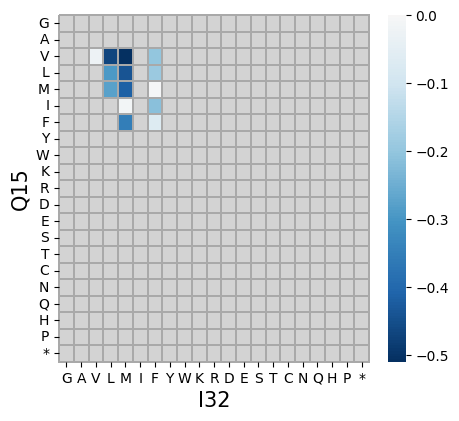

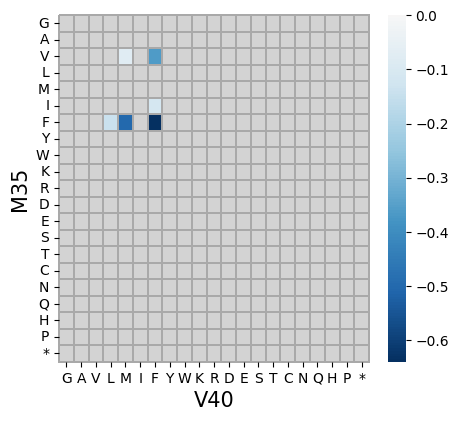

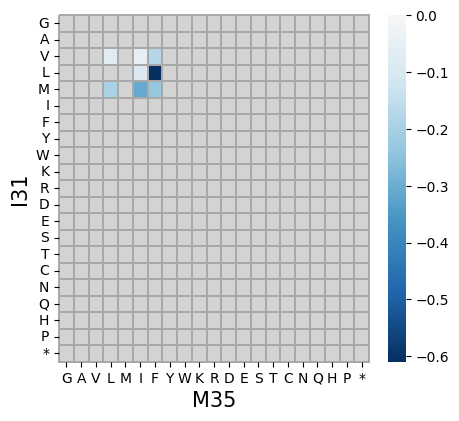

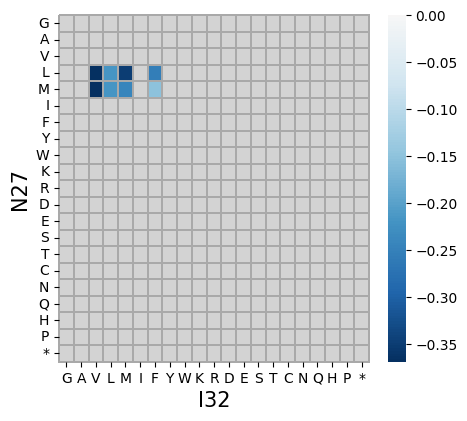

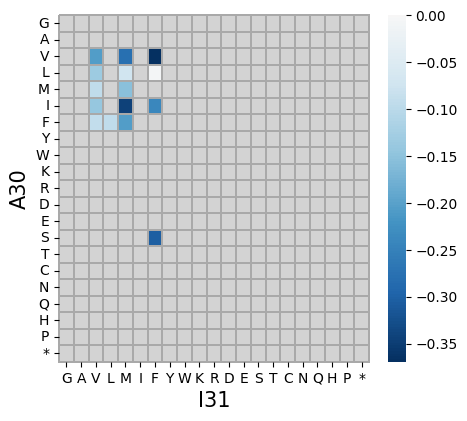

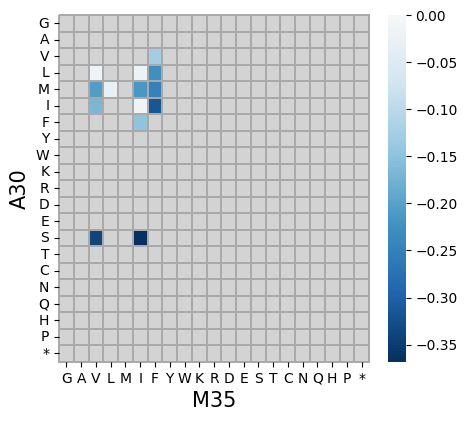

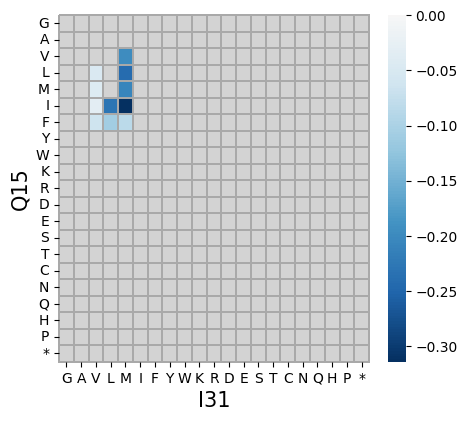

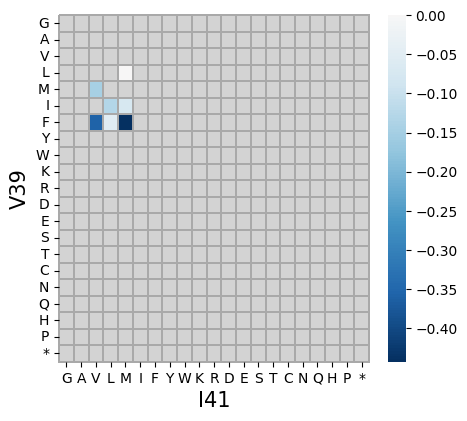

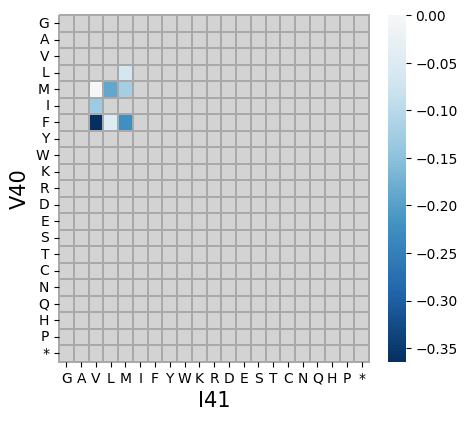

In [241]:
for mut_combination in list(top_interactors['compensatory_w_neg_dddEa'].index):
    
    mut_pos_1 = int(mut_combination.split('_')[0])
    mut_pos_2 = int(mut_combination.split('_')[1])
    
    curr_mut_combination_full = AB_WT[mut_pos_1 - 1] + str(mut_pos_1) + '_' + AB_WT[mut_pos_2 - 1] + str(mut_pos_2)
    curr_mut_id_1_full = curr_mut_combination_full.split('_')[0]
    curr_mut_id_2_full = curr_mut_combination_full.split('_')[1]
    
    fig = plt.figure(figsize=(5, 4.5))
    
    sns.heatmap(ddE_df_2nd_order_terms['compensatory_w_neg_dddEa'][curr_mut_combination_full], cmap=cmap_ddE_2nd_order_terms, 
                #vmin = -1,
                vmax = 0,
                mask=masks_ddE_2nd_order_terms['compensatory_w_neg_dddEa'][curr_mut_combination_full],
                linewidths=0.002814, linecolor='darkgrey', clip_on=False,
                center=0)
    
    
    plt.ylabel(curr_mut_id_1_full, fontsize=15)
    plt.xlabel(curr_mut_id_2_full, fontsize=15)
    
    plt.yticks(rotation=0, 
               #fontsize=2
              )
    #plt.xticks(fontsize=2) 
    
    #plt.title('Sigmoid fit, ' +  curr_mut_combination_full)

    #plt.savefig('./figures/20240206_mochi_ddEa_heatmap_all_3_doubles_1st_ord_terms_allowed_Sigmoid.pdf',
    #           bbox_inches = 'tight')

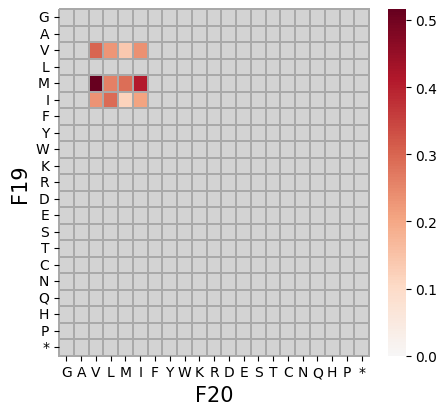

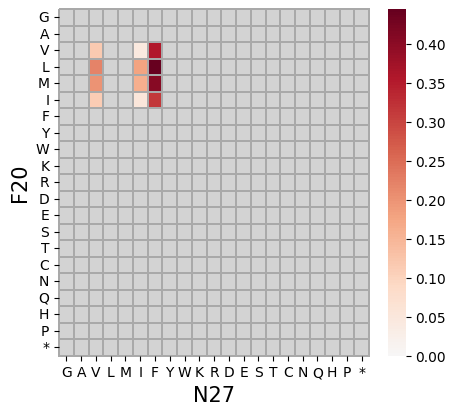

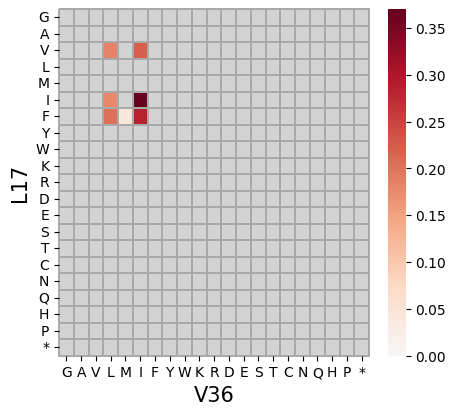

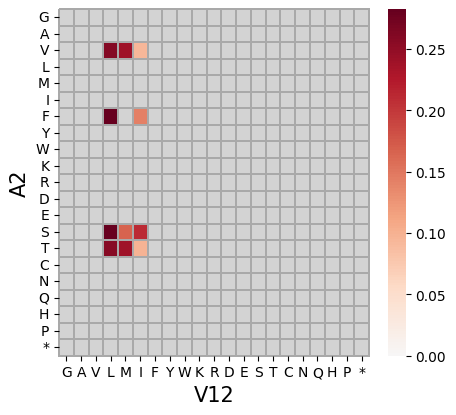

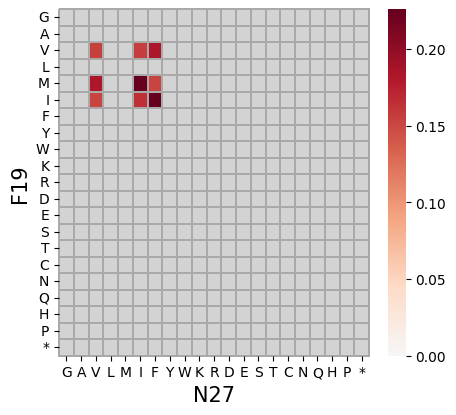

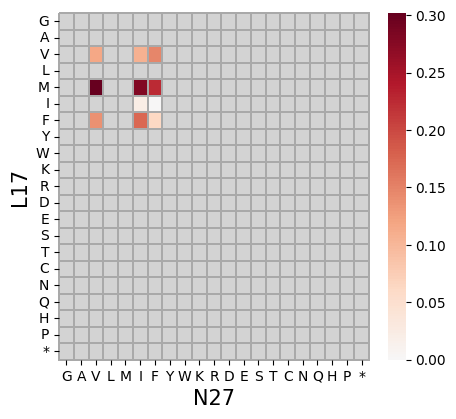

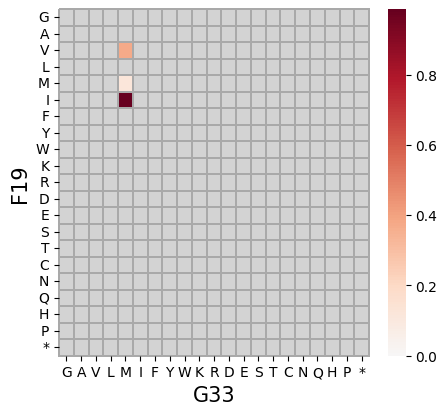

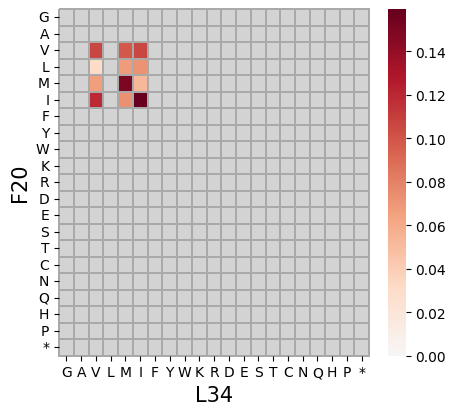

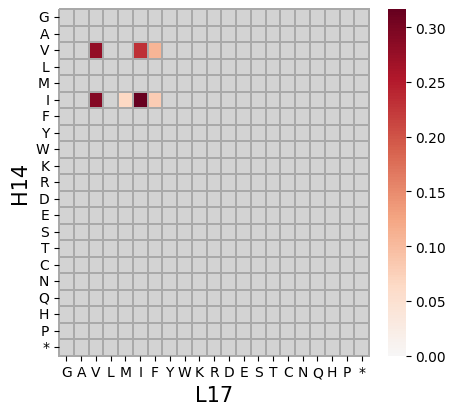

In [236]:
for mut_combination in list(top_interactors['compensatory_w_pos_dddEa'].index):
    
    mut_pos_1 = int(mut_combination.split('_')[0])
    mut_pos_2 = int(mut_combination.split('_')[1])
    
    curr_mut_combination_full = AB_WT[mut_pos_1 - 1] + str(mut_pos_1) + '_' + AB_WT[mut_pos_2 - 1] + str(mut_pos_2)
    
    curr_mut_id_1_full = curr_mut_combination_full.split('_')[0]
    curr_mut_id_2_full = curr_mut_combination_full.split('_')[1]
    
    fig = plt.figure(figsize=(5, 4.5))
    
    sns.heatmap(ddE_df_2nd_order_terms['compensatory_w_pos_dddEa'][curr_mut_combination_full], cmap=cmap_ddE_2nd_order_terms, 
                vmin = 0,
                #vmax = 5,
                mask=masks_ddE_2nd_order_terms['compensatory_w_pos_dddEa'][curr_mut_combination_full],
                linewidths=0.002814, linecolor='darkgrey', clip_on=False,
                center=0)
    
    plt.ylabel(curr_mut_id_1_full, fontsize=15)
    plt.xlabel(curr_mut_id_2_full, fontsize=15)
    
    plt.yticks(rotation=0, 
               #fontsize=2
              )
    #plt.xticks(fontsize=2) 
    
    #plt.title('Sigmoid model')

    #plt.savefig('./figures/20240206_mochi_ddEa_heatmap_all_3_doubles_1st_ord_terms_allowed_Sigmoid.pdf',
    #           bbox_inches = 'tight')

## Looking at positive and negative dddEa interactions

In [141]:
interaction_scores_positions_dfs = {}

for inter_group in groups_interactions_exhaustive:
    interaction_scores_positions_dfs[inter_group] = pd.DataFrame(index = interacting_position_combinations[inter_group], columns = ['abs_inter_score',
                                                                                                    'distance_aa_positions'])

In [143]:
for inter_group in groups_interactions_exhaustive:
    for positions_combination in list(interaction_scores_positions_dfs[inter_group].index):
    
        interaction_scores_positions_dfs[inter_group].loc[positions_combination,'abs_inter_score'] = abs(interaction_scores_positions[inter_group][positions_combination][0])

        curr_pos_i = int(positions_combination.split('_')[0])
        curr_pos_j = int(positions_combination.split('_')[1])

        interaction_scores_positions_dfs[inter_group].loc[positions_combination,'distance_aa_positions'] = abs(curr_pos_j - curr_pos_i)


In [144]:
interaction_scores_positions_dfs['ddEa_sign_pos']

abs_inter_score distance_aa_positions
2_12         0.217497                    10
2_17         0.112848                    15
2_18         0.154007                    16
2_19         0.118463                    17
2_20         0.046076                    18
2_21         0.108625                    19
2_24         0.172288                    22
2_27         0.081416                    25
2_30          0.11403                    28
2_31         0.059362                    29
2_32         0.126545                    30
2_34          0.07186                    32
2_35         0.152514                    33
2_36          0.17113                    34
2_39          0.12262                    37
2_40         0.152783                    38
2_41         0.192588                    39
2_42         0.126206                    40
12_15        0.180929                     3
12_17        0.048051                     5
12_18        0.089282                     6
12_19        0.043136                     7
12_20        0.067253                     8
12_21        0.132422                     9
12_24         0.14178                    12
12_27        0.063752                    15
12_30        0.169542                    18
12_31        0.037172                    19
12_32          0.1416                    20
12_34        0.078998                    22
12_35        0.144668                    23
12_36        0.121223                    24
12_39        0.245939                    27
12_40         0.19957                    28
12_41        0.075753                    29
12_42        0.081337                    30
14_17        0.179299                     3
14_18         0.10782                     4
14_19        0.046937                     5
14_20        0.041527                     6
14_24        0.151105                    10
14_27        0.086865                    13
14_28        0.083022                    14
14_30        0.203702                    16
14_31        0.060246                    17
14_32         0.08454                    18
14_34        0.242674                    20
14_35        0.112676                    21
14_39        0.116988                    25
14_40        0.117581                    26
14_42        0.078949                    28
15_18         0.20671                     3
15_19         0.03336                     4
15_20        0.050257                     5
15_21        0.291991                     6
15_27        0.157877                    12
15_30        0.246517                    15
15_31        0.068049                    16
15_32        0.031819                    17
15_34        0.204113                    19
15_35        0.369661                    20
15_40        0.121072                    25
15_42        0.334912                    27
17_18        0.072456                     1
17_19        0.049135                     2
17_20        0.060075                     3
17_21         0.05597                     4
17_24        0.067316                     7
17_27        0.111377                    10
17_28        0.033786                    11
17_30        0.102247                    13
17_31        0.037594                    14
17_32        0.093259                    15
17_33        0.064004                    16
17_34        0.068505                    17
17_35         0.11032                    18
17_36        0.114291                    19
17_39        0.121219                    22
17_40        0.047939                    23
17_41        0.125051                    24
17_42        0.086508                    25
18_19        0.032772                     1
18_20        0.117402                     2
18_21        0.180935                     3
18_24        0.140853                     6
18_27        0.095381                     9
18_28        0.142463                    10
18_30        0.210093                    12
18_31        0.082662                    13
18_32        0.133339                    14
18

In [145]:
interaction_scores_positions_dfs['ddEa_sign_neg']

abs_inter_score distance_aa_positions
2_12         0.001778                    10
2_17         0.017703                    15
2_18         0.002193                    16
2_19         0.011139                    17
2_20         0.038326                    18
2_21         0.012992                    19
2_24         0.011487                    22
2_27         0.027834                    25
2_30         0.025744                    28
2_31         0.040928                    29
2_32         0.017838                    30
2_34         0.086503                    32
2_35         0.007841                    33
2_36              0.0                    34
2_39         0.017449                    37
2_40         0.011402                    38
2_41         0.000563                    39
2_42         0.005731                    40
12_15        0.006243                     3
12_17        0.070977                     5
12_18        0.007864                     6
12_19        0.014451                     7
12_20        0.009893                     8
12_21        0.010006                     9
12_24        0.004384                    12
12_27        0.006883                    15
12_30        0.003555                    18
12_31        0.021781                    19
12_32        0.002727                    20
12_34         0.01395                    22
12_35         0.00182                    23
12_36        0.000086                    24
12_39        0.000946                    27
12_40             0.0                    28
12_41        0.009079                    29
12_42        0.011668                    30
14_17        0.001641                     3
14_18        0.049011                     4
14_19        0.134812                     5
14_20        0.017209                     6
14_24        0.031625                    10
14_27        0.019258                    13
14_28             0.0                    14
14_30        0.016495                    16
14_31        0.089478                    17
14_32        0.052244                    18
14_34        0.003657                    20
14_35        0.011388                    21
14_39        0.028769                    25
14_40          0.0078                    26
14_42        0.040632                    28
15_18        0.061234                     3
15_19        0.106305                     4
15_20        0.080268                     5
15_21        0.013114                     6
15_27        0.025962                    12
15_30        0.000299                    15
15_31        0.078681                    16
15_32        0.173962                    17
15_34        0.067184                    19
15_35        0.002131                    20
15_40        0.049647                    25
15_42        0.004169                    27
17_18        0.004614                     1
17_19        0.041941                     2
17_20        0.000048                     3
17_21        0.041789                     4
17_24        0.005021                     7
17_27        0.003097                    10
17_28         0.00198                    11
17_30        0.021075                    13
17_31        0.035049                    14
17_32        0.019605                    15
17_33        0.055388                    16
17_34        0.005391                    17
17_35        0.024056                    18
17_36         0.03667                    19
17_39        0.009588                    22
17_40         0.02513                    23
17_41        0.004136                    24
17_42        0.005879                    25
18_19        0.080892                     1
18_20             0.0                     2
18_21         0.00702                     3
18_24             0.0                     6
18_27         0.02893                     9
18_28             0.0                    10
18_30        0.010587                    12
18_31        0.001076                    13
18_32        0.013178                    14
18

In [240]:
np.quantile(y, 0.95)


0.11544795715983931

/tmp/ipykernel_374427/3800152735.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.annotate(txt, (x[i], y[i]), fontsize=10)


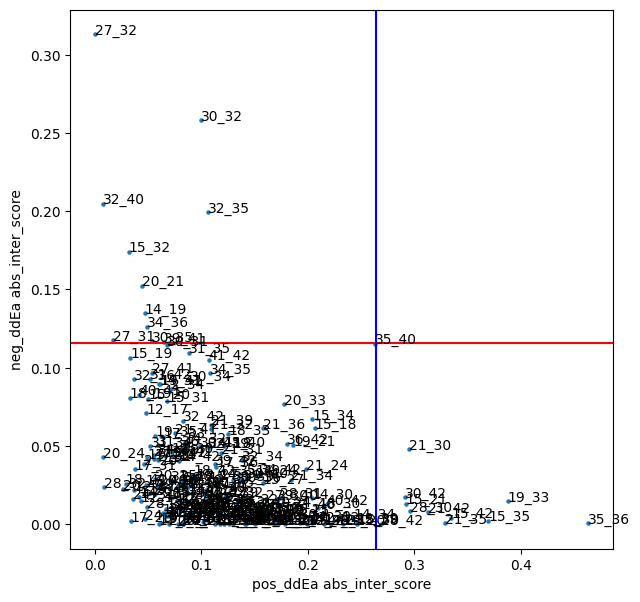

In [146]:
fig, ax = plt.subplots(figsize=(7,7))


x = interaction_scores_positions_dfs['ddEa_sign_pos']['abs_inter_score']
y = interaction_scores_positions_dfs['ddEa_sign_neg']['abs_inter_score']
labels = list(interaction_scores_positions_dfs['ddEa_sign_pos'].index)

ax.scatter(x,y, s=5)

plt.xlabel('pos_ddEa abs_inter_score')
plt.ylabel('neg_ddEa abs_inter_score')

x_95th_quantile = np.quantile(x, 0.95)
y_95th_quantile = np.quantile(y, 0.95)

plt.axhline(y_95th_quantile, color='red')
plt.axvline(x_95th_quantile, color='blue')

for i, txt in enumerate(list(interaction_scores_positions_dfs[inter_group].index)):
    ax.annotate(txt, (x[i], y[i]), fontsize=10)

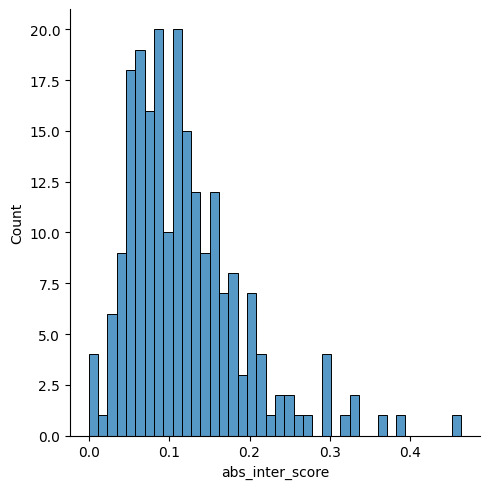

In [147]:
sns.displot(x, bins=40)

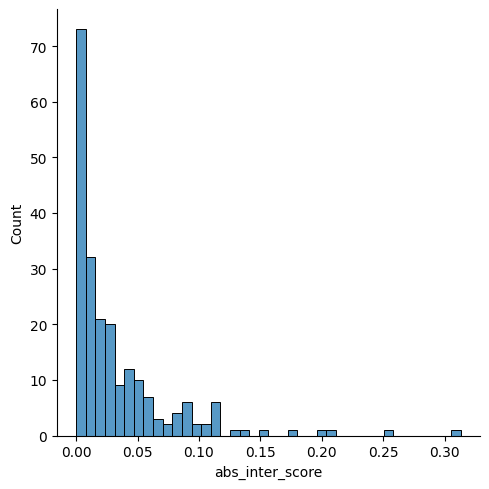

In [148]:
sns.displot(y, bins=40)

In [150]:
# above 95th quantiles of abs(inter_score) in each case
top_interactors = {}

quantile_threshold = 0.92

for inter_group in groups_interactions_exhaustive:
    curr_quantile = np.quantile(interaction_scores_positions_dfs[inter_group]['abs_inter_score'], quantile_threshold)
    top_interactors[inter_group] = interaction_scores_positions_dfs[inter_group][interaction_scores_positions_dfs[inter_group]['abs_inter_score'] > curr_quantile]

In [155]:
top_interactors['ddEa_sign_pos']

abs_inter_score distance_aa_positions
12_39        0.245939                    27
14_34        0.242674                    20
15_21        0.291991                     6
15_30        0.246517                    15
15_35        0.369661                    20
15_42        0.334912                    27
19_20        0.233428                     1
19_33        0.387881                    14
21_30        0.294673                     9
21_35        0.328532                    14
21_42        0.313105                    21
28_30        0.295916                     2
28_35        0.221975                     7
28_42         0.26926                    14
30_42        0.290958                    12
35_36        0.463295                     1
35_40        0.262725                     5
40_42        0.217817                     2

/tmp/ipykernel_374427/1993625822.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.annotate(txt, (x[i], y[i]), fontsize=10)


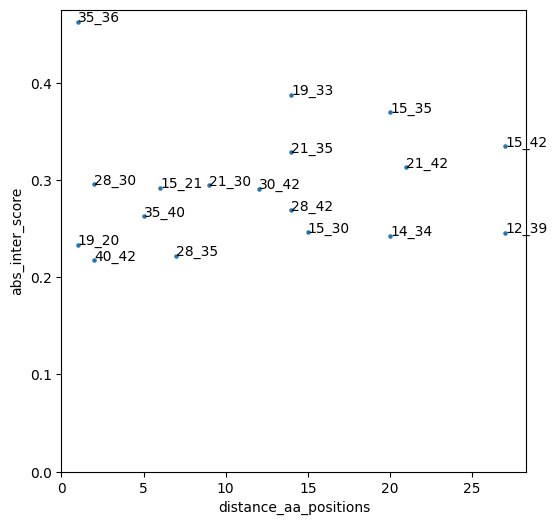

In [153]:
inter_group = 'ddEa_sign_pos'

fig, ax = plt.subplots(figsize=(6,6))

#inter_threshold = 0.2
#distance_thresold = 5

x = top_interactors[inter_group]['distance_aa_positions']
y = top_interactors[inter_group]['abs_inter_score']
labels = list(top_interactors[inter_group].index)

ax.scatter(x,y, s=5)

plt.xlabel('distance_aa_positions')
plt.ylabel('abs_inter_score')

plt.xlim(0)
plt.ylim(0)

#plt.axhline(inter_threshold, color='red')
#plt.axvline(distance_thresold, color='blue')


for i, txt in enumerate(list(top_interactors[inter_group].index)):
    ax.annotate(txt, (x[i], y[i]), fontsize=10)

In [154]:
top_interactors['ddEa_sign_neg']

abs_inter_score distance_aa_positions
14_19        0.134812                     5
15_19        0.106305                     4
15_32        0.173962                    17
20_21        0.152393                     1
27_31        0.117451                     4
27_32        0.313223                     5
27_41        0.096649                    14
30_31        0.114398                     1
30_32        0.258069                     2
30_35        0.116956                     5
31_35        0.109659                     4
32_35        0.199431                     3
32_40        0.204875                     8
34_35         0.09644                     1
34_36         0.12622                     2
35_40        0.115241                     5
39_41        0.116277                     2
41_42         0.10498                     1

/tmp/ipykernel_374427/1581355019.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.annotate(txt, (x[i], y[i]), fontsize=10)


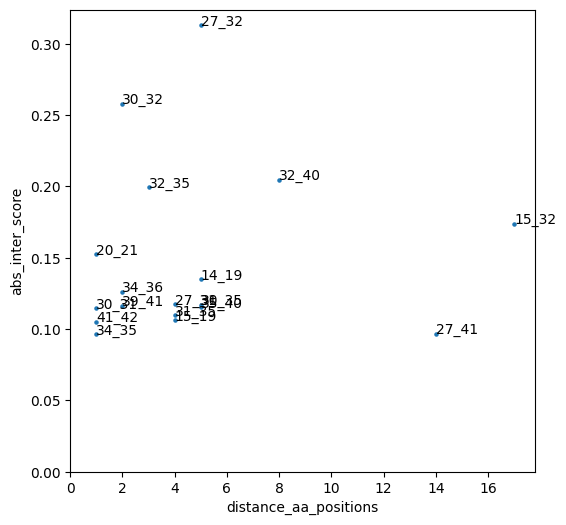

In [156]:
inter_group = 'ddEa_sign_neg'

fig, ax = plt.subplots(figsize=(6,6))

#inter_threshold = 0.2
#distance_thresold = 5

x = top_interactors[inter_group]['distance_aa_positions']
y = top_interactors[inter_group]['abs_inter_score']
labels = list(top_interactors[inter_group].index)

ax.scatter(x,y, s=5)

plt.xlabel('distance_aa_positions')
plt.ylabel('abs_inter_score')

plt.xlim(0)
plt.ylim(0)


#plt.axhline(inter_threshold, color='red')
#plt.axvline(distance_thresold, color='blue')


for i, txt in enumerate(list(top_interactors[inter_group].index)):
    ax.annotate(txt, (x[i], y[i]), fontsize=10)

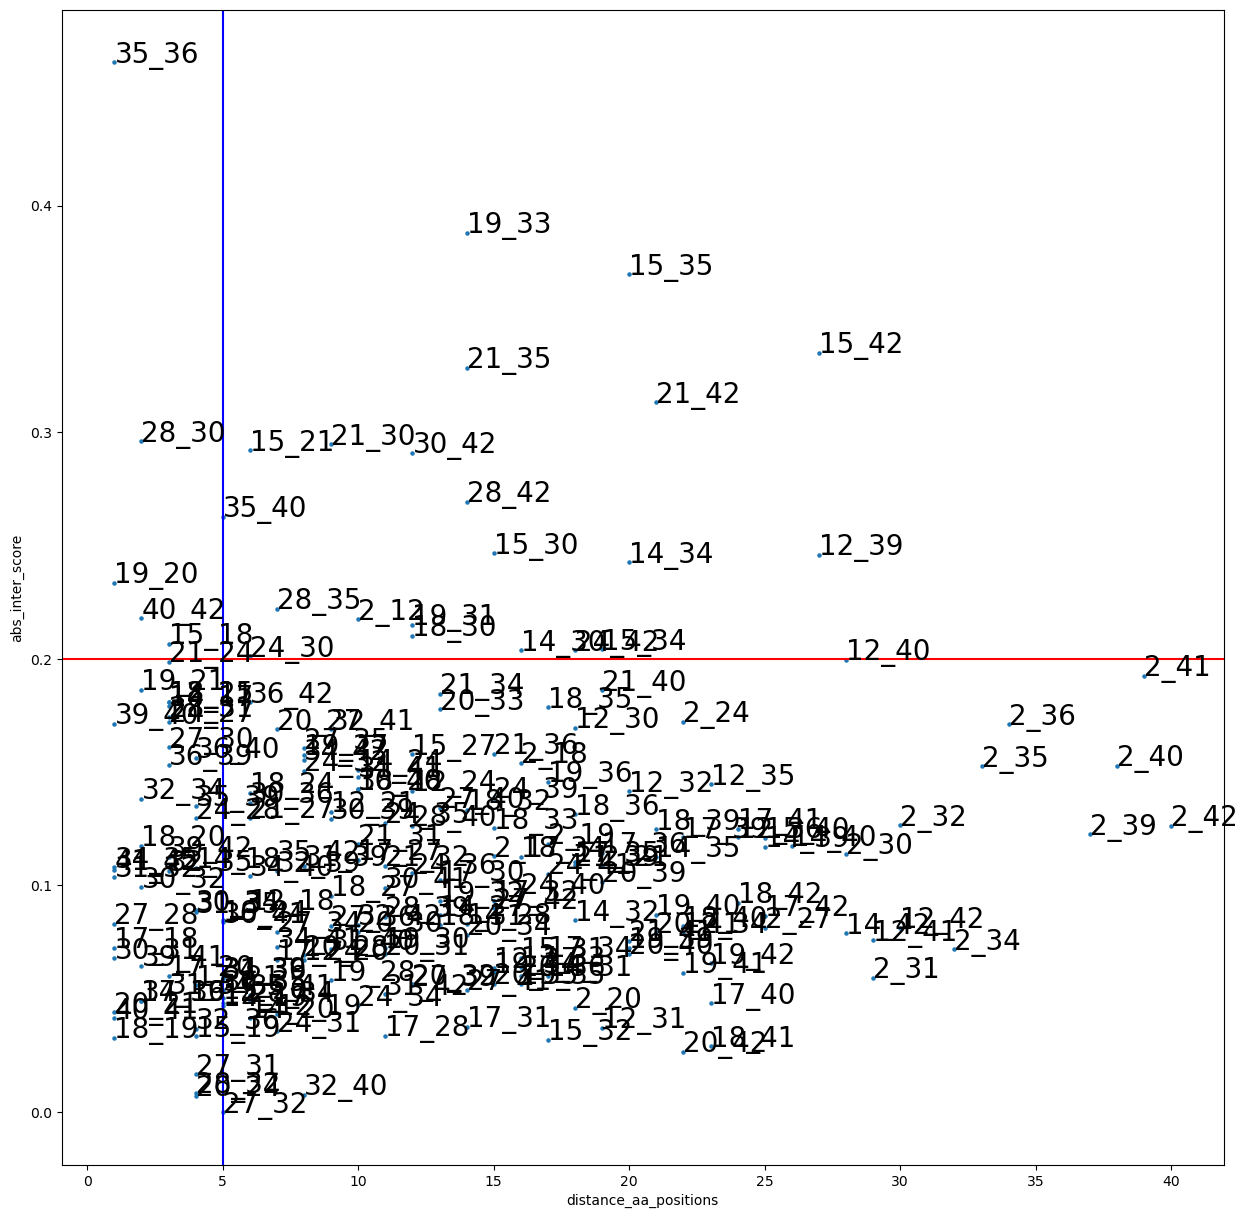

In [228]:
inter_group = 'pos_ddEa'

fig, ax = plt.subplots(figsize=(15,15))

inter_threshold = 0.2
distance_thresold = 5

x = interaction_scores_positions_dfs[inter_group]['distance_aa_positions']
y = interaction_scores_positions_dfs[inter_group]['abs_inter_score']
labels = list(interaction_scores_positions_dfs[inter_group].index)

ax.scatter(x,y, s=5)

plt.xlabel('distance_aa_positions')
plt.ylabel('abs_inter_score')

plt.axhline(inter_threshold, color='red')
plt.axvline(distance_thresold, color='blue')


for i, txt in enumerate(list(interaction_scores_positions_dfs[inter_group].index)):
    ax.annotate(txt, (x[i], y[i]), fontsize=20)

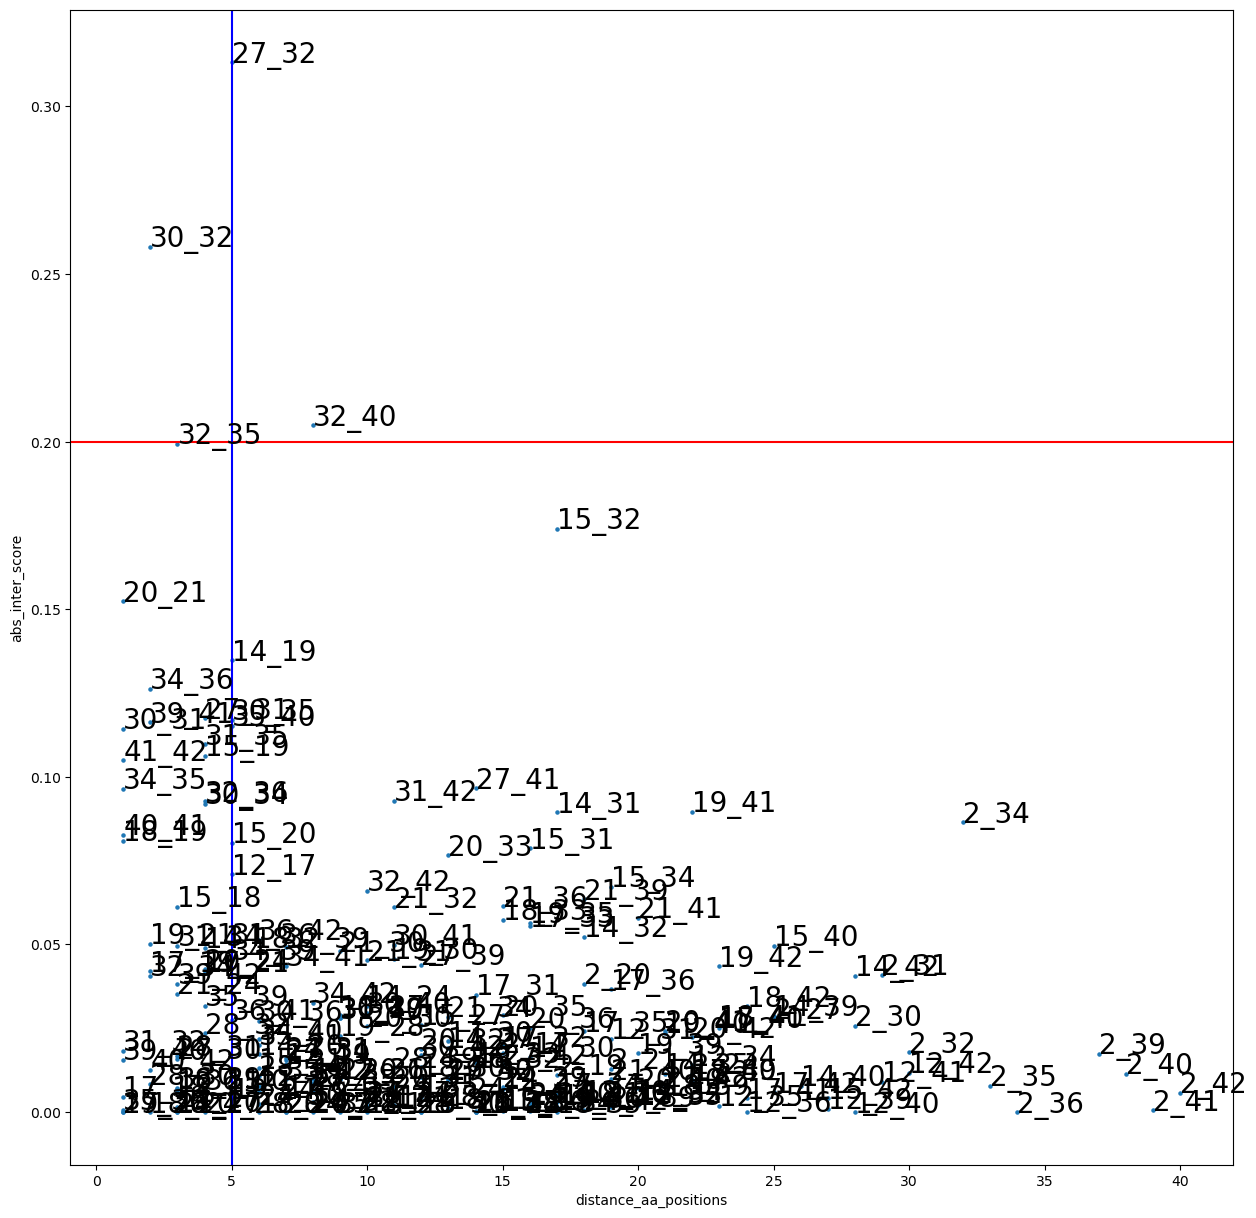

In [229]:
inter_group = 'neg_ddEa'

fig, ax = plt.subplots(figsize=(15,15))

inter_threshold = 0.2
distance_thresold = 5

x = interaction_scores_positions_dfs[inter_group]['distance_aa_positions']
y = interaction_scores_positions_dfs[inter_group]['abs_inter_score']
labels = list(interaction_scores_positions_dfs[inter_group].index)

ax.scatter(x,y, s=5)

plt.xlabel('distance_aa_positions')
plt.ylabel('abs_inter_score')

plt.axhline(inter_threshold, color='red')
plt.axvline(distance_thresold, color='blue')


for i, txt in enumerate(list(interaction_scores_positions_dfs[inter_group].index)):
    ax.annotate(txt, (x[i], y[i]), fontsize=20)

In [192]:
interaction_scores_positions_dfs['neg_ddEa'][:5]

abs_inter_score distance_aa_positions
2_12        0.049798                    10
2_17        0.061959                    15
2_18        0.030699                    16
2_19        0.062376                    17
2_20        0.067071                    18

In [193]:
interaction_scores_positions_dfs['pos_ddEa'][:5]

abs_inter_score distance_aa_positions
2_12        0.225552                    10
2_17        0.157987                    15
2_18        0.165854                    16
2_19        0.144216                    17
2_20         0.10751                    18